# Gravity Machine analysis notebook

This notebook contains usage examples and worflows for Gravity Machine data analysis.

Earlier version of this analysis pipeline was used for generating figures for the paper:

> Krishnamurthy, Deepak, Hongquan Li, François Benoit du Rey, Pierre Cambournac, Adam G. Larson, Ethan Li, and Manu Prakash. "Scale-free vertical tracking microscopy." Nature Methods 17, no. 10 (2020): 1040-1051.

In [88]:
import numpy as np
import GravityMachine.Analysis as Analysis
import imp
imp.reload(Analysis)
import matplotlib.pyplot as plt
%matplotlib notebook

## Specify the data path and load the data as a GravityMachineTrack object

In [120]:
track_folder = 'D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018'
track_file = 'track_cropped.csv'

gm_analysis = Analysis.GravityMachineTrack(track_folder = track_folder, track_file = track_file, Tmin = 0, Tmax = 360)
gm_analysis.data

Loaded metadata...
{'Local time': None, 'PixelPermm': None, 'Objective': None}
**************************************************
['Time', 'Xobj', 'Yobj', 'Zobj', 'ThetaWheel', 'ZobjWheel', 'Manual Tracking', 'Image name', 'Focus Measure', 'Liquid Lens Phase', 'Liquid Lens Freq', 'Liquid Lens Ampl', 'Liquid Lens maxGain', 'Y FM maximum', 'LEDPanel color R', 'LEDPanel color G', 'LEDPanel color B']
{'Time': 'Time', 'X': 'Xobj', 'Y': 'Yobj', 'Z': 'ZobjWheel', 'Image name': 'Image name', 'X_image': 'Xobj_image', 'Z_image': 'Zobj'}
Warning X_image not found in input data
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\FluidVelocityTimeseries
Subdir:  []
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\images000
Subdir:  []
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\images001
Subdir:  []
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forT

,Time,X,Y,Z,Image name,X_image,Z_image,V_x,V_y,V_z
0,0.000000,11.536563,0.171250,-617.378436,IMG_3878.tif,None,-0.108280,None,None,None
1,0.025081,11.536563,0.171250,-617.388858,NaN,None,-0.108280,None,None,None
2,0.042399,11.536563,0.171250,-617.385674,NaN,None,-0.105096,None,None,None
3,0.066455,11.536563,0.171250,-617.399281,IMG_3879.tif,None,-0.108280,None,None,None
4,0.086212,11.533378,0.171250,-617.396096,NaN,None,-0.105096,None,None,None
...,...,...,...,...,...,...,...,...,...,...
16007,359.887024,10.319375,0.415938,-630.104668,IMG_8002.tif,None,0.035032,None,None,None
16008,359.912891,10.319375,0.415938,-630.094373,NaN,None,0.035032,None,None,None
16009,359.931388,10.316190,0.415938,-630.091189,NaN,None,0.038217,None,None,None
16010,359.963501,10.319062,0.415938,-630.094373,IMG_8003.tif,None,0.035032,None,None,None


## Plot the object's X, Y, Z displacement time series

<IPython.core.display.Javascript object>


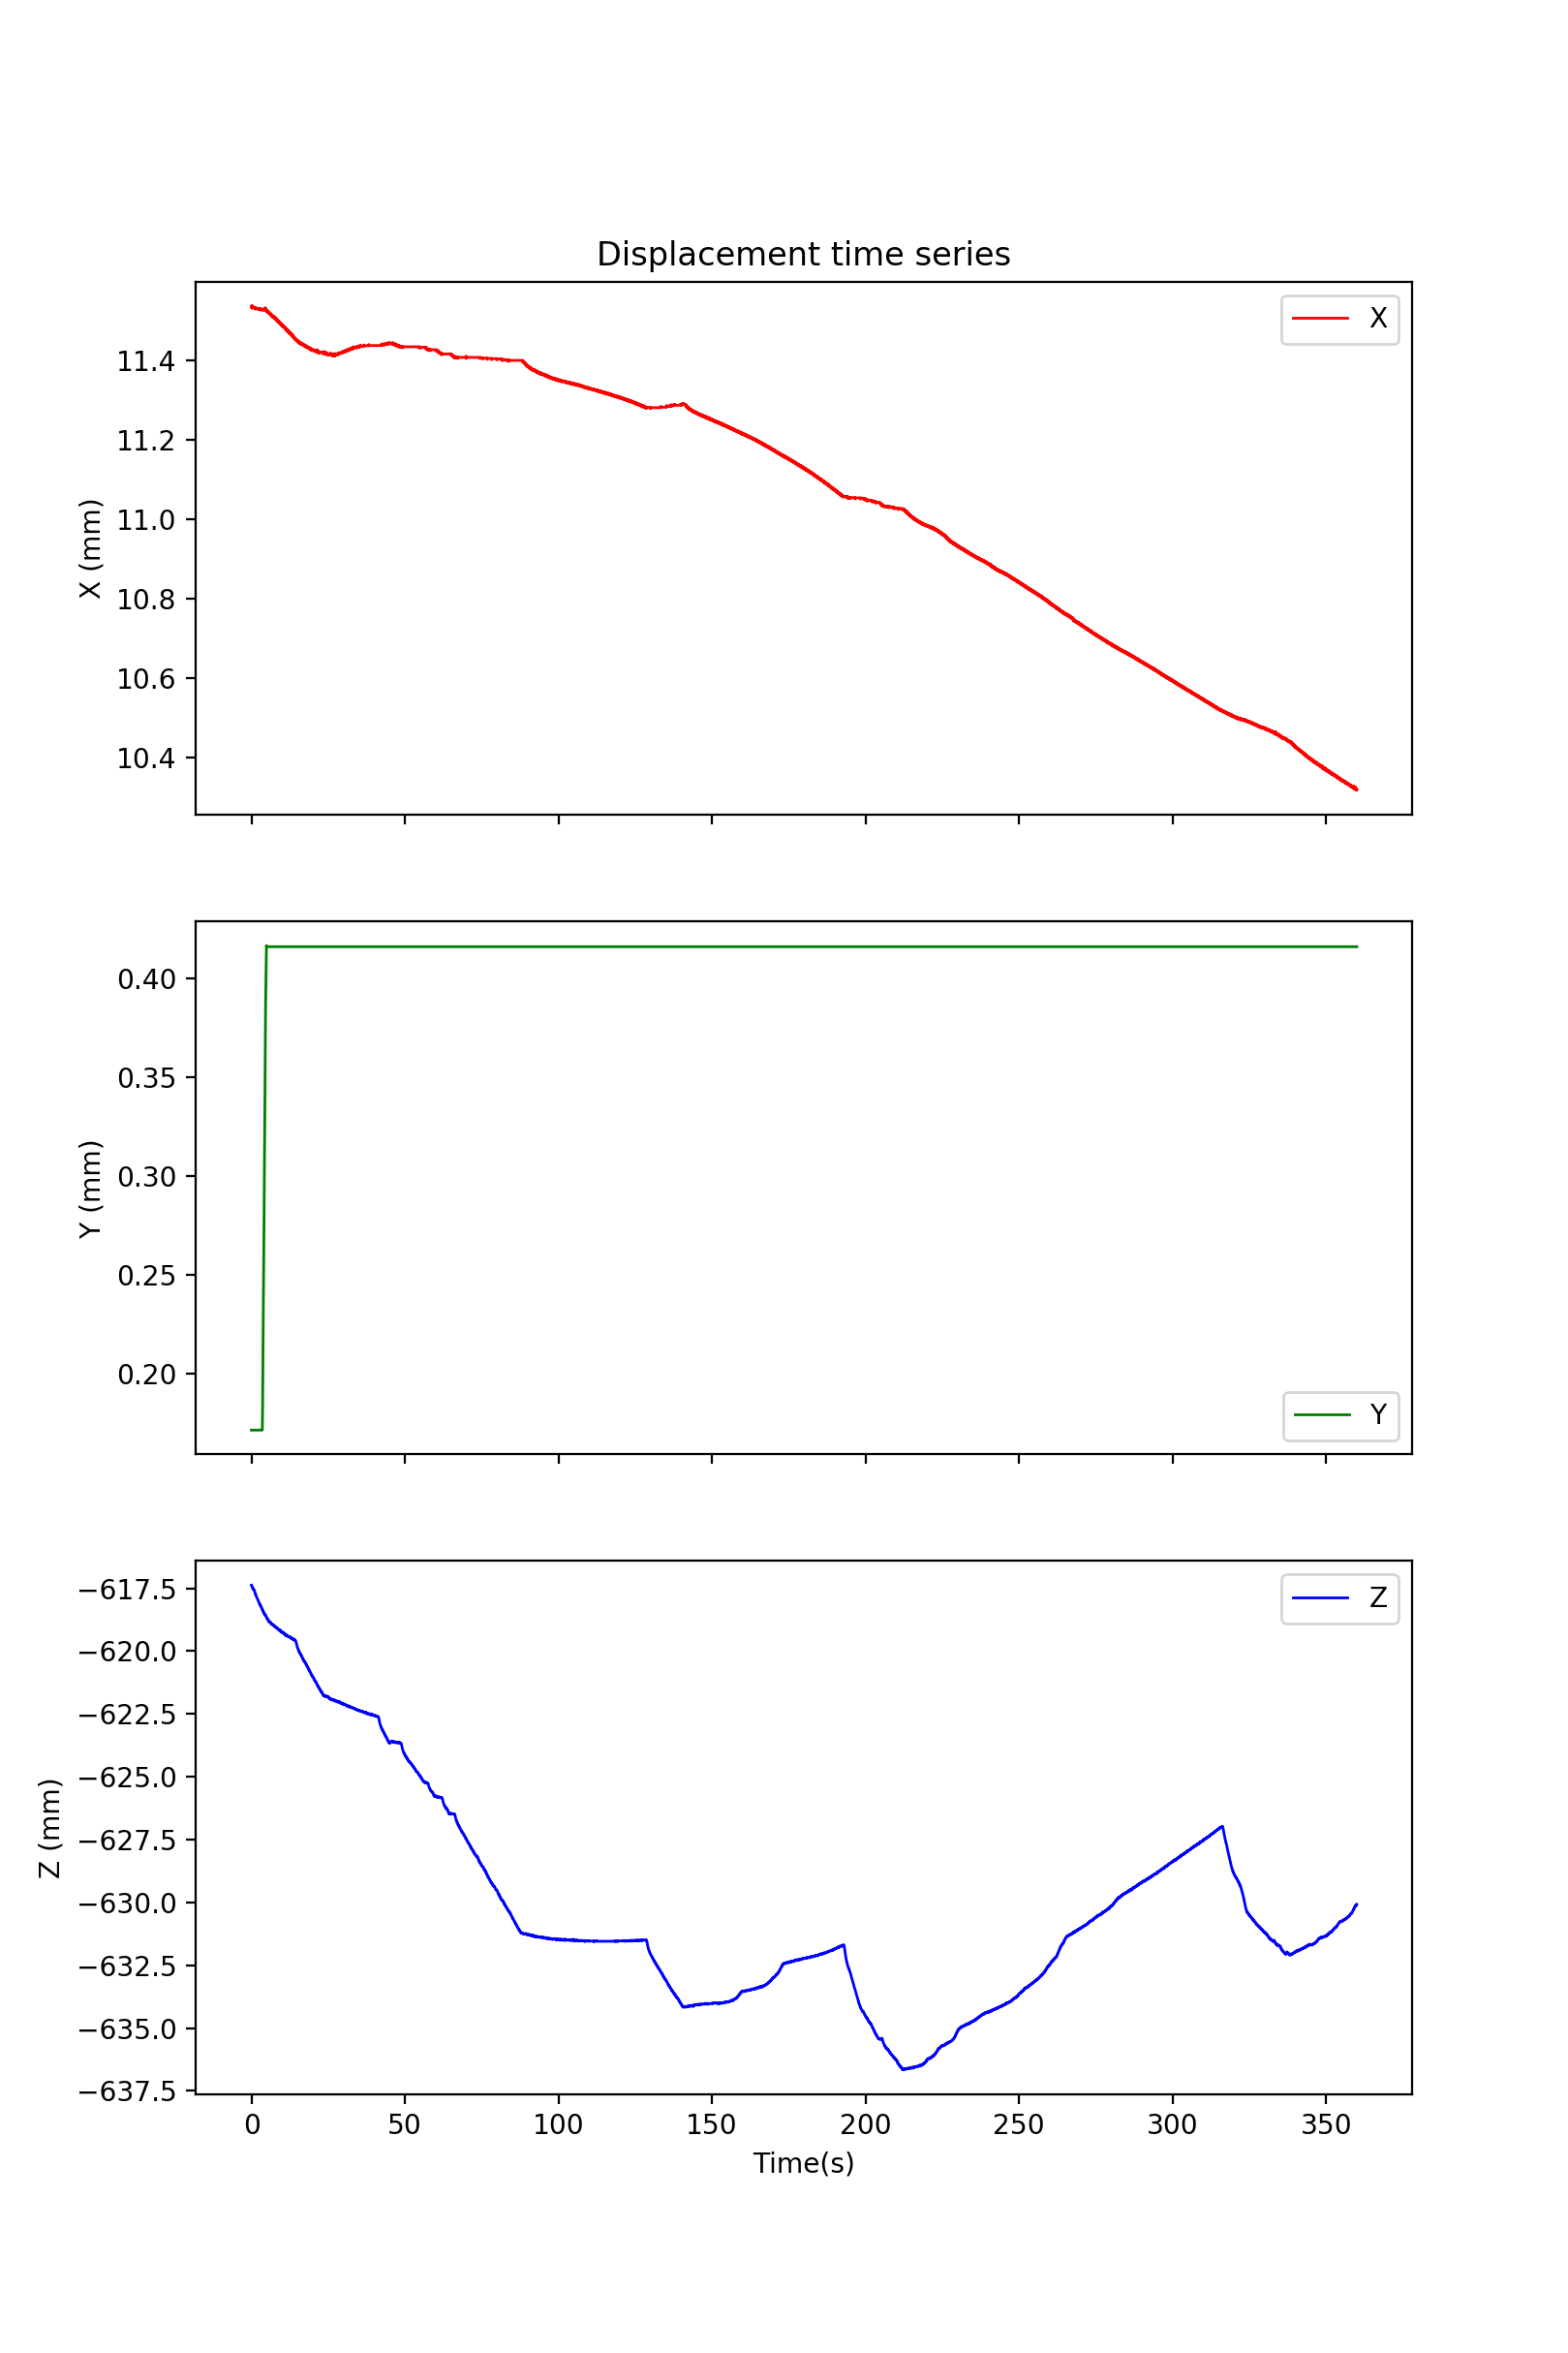

<IPython.core.display.Javascript object>


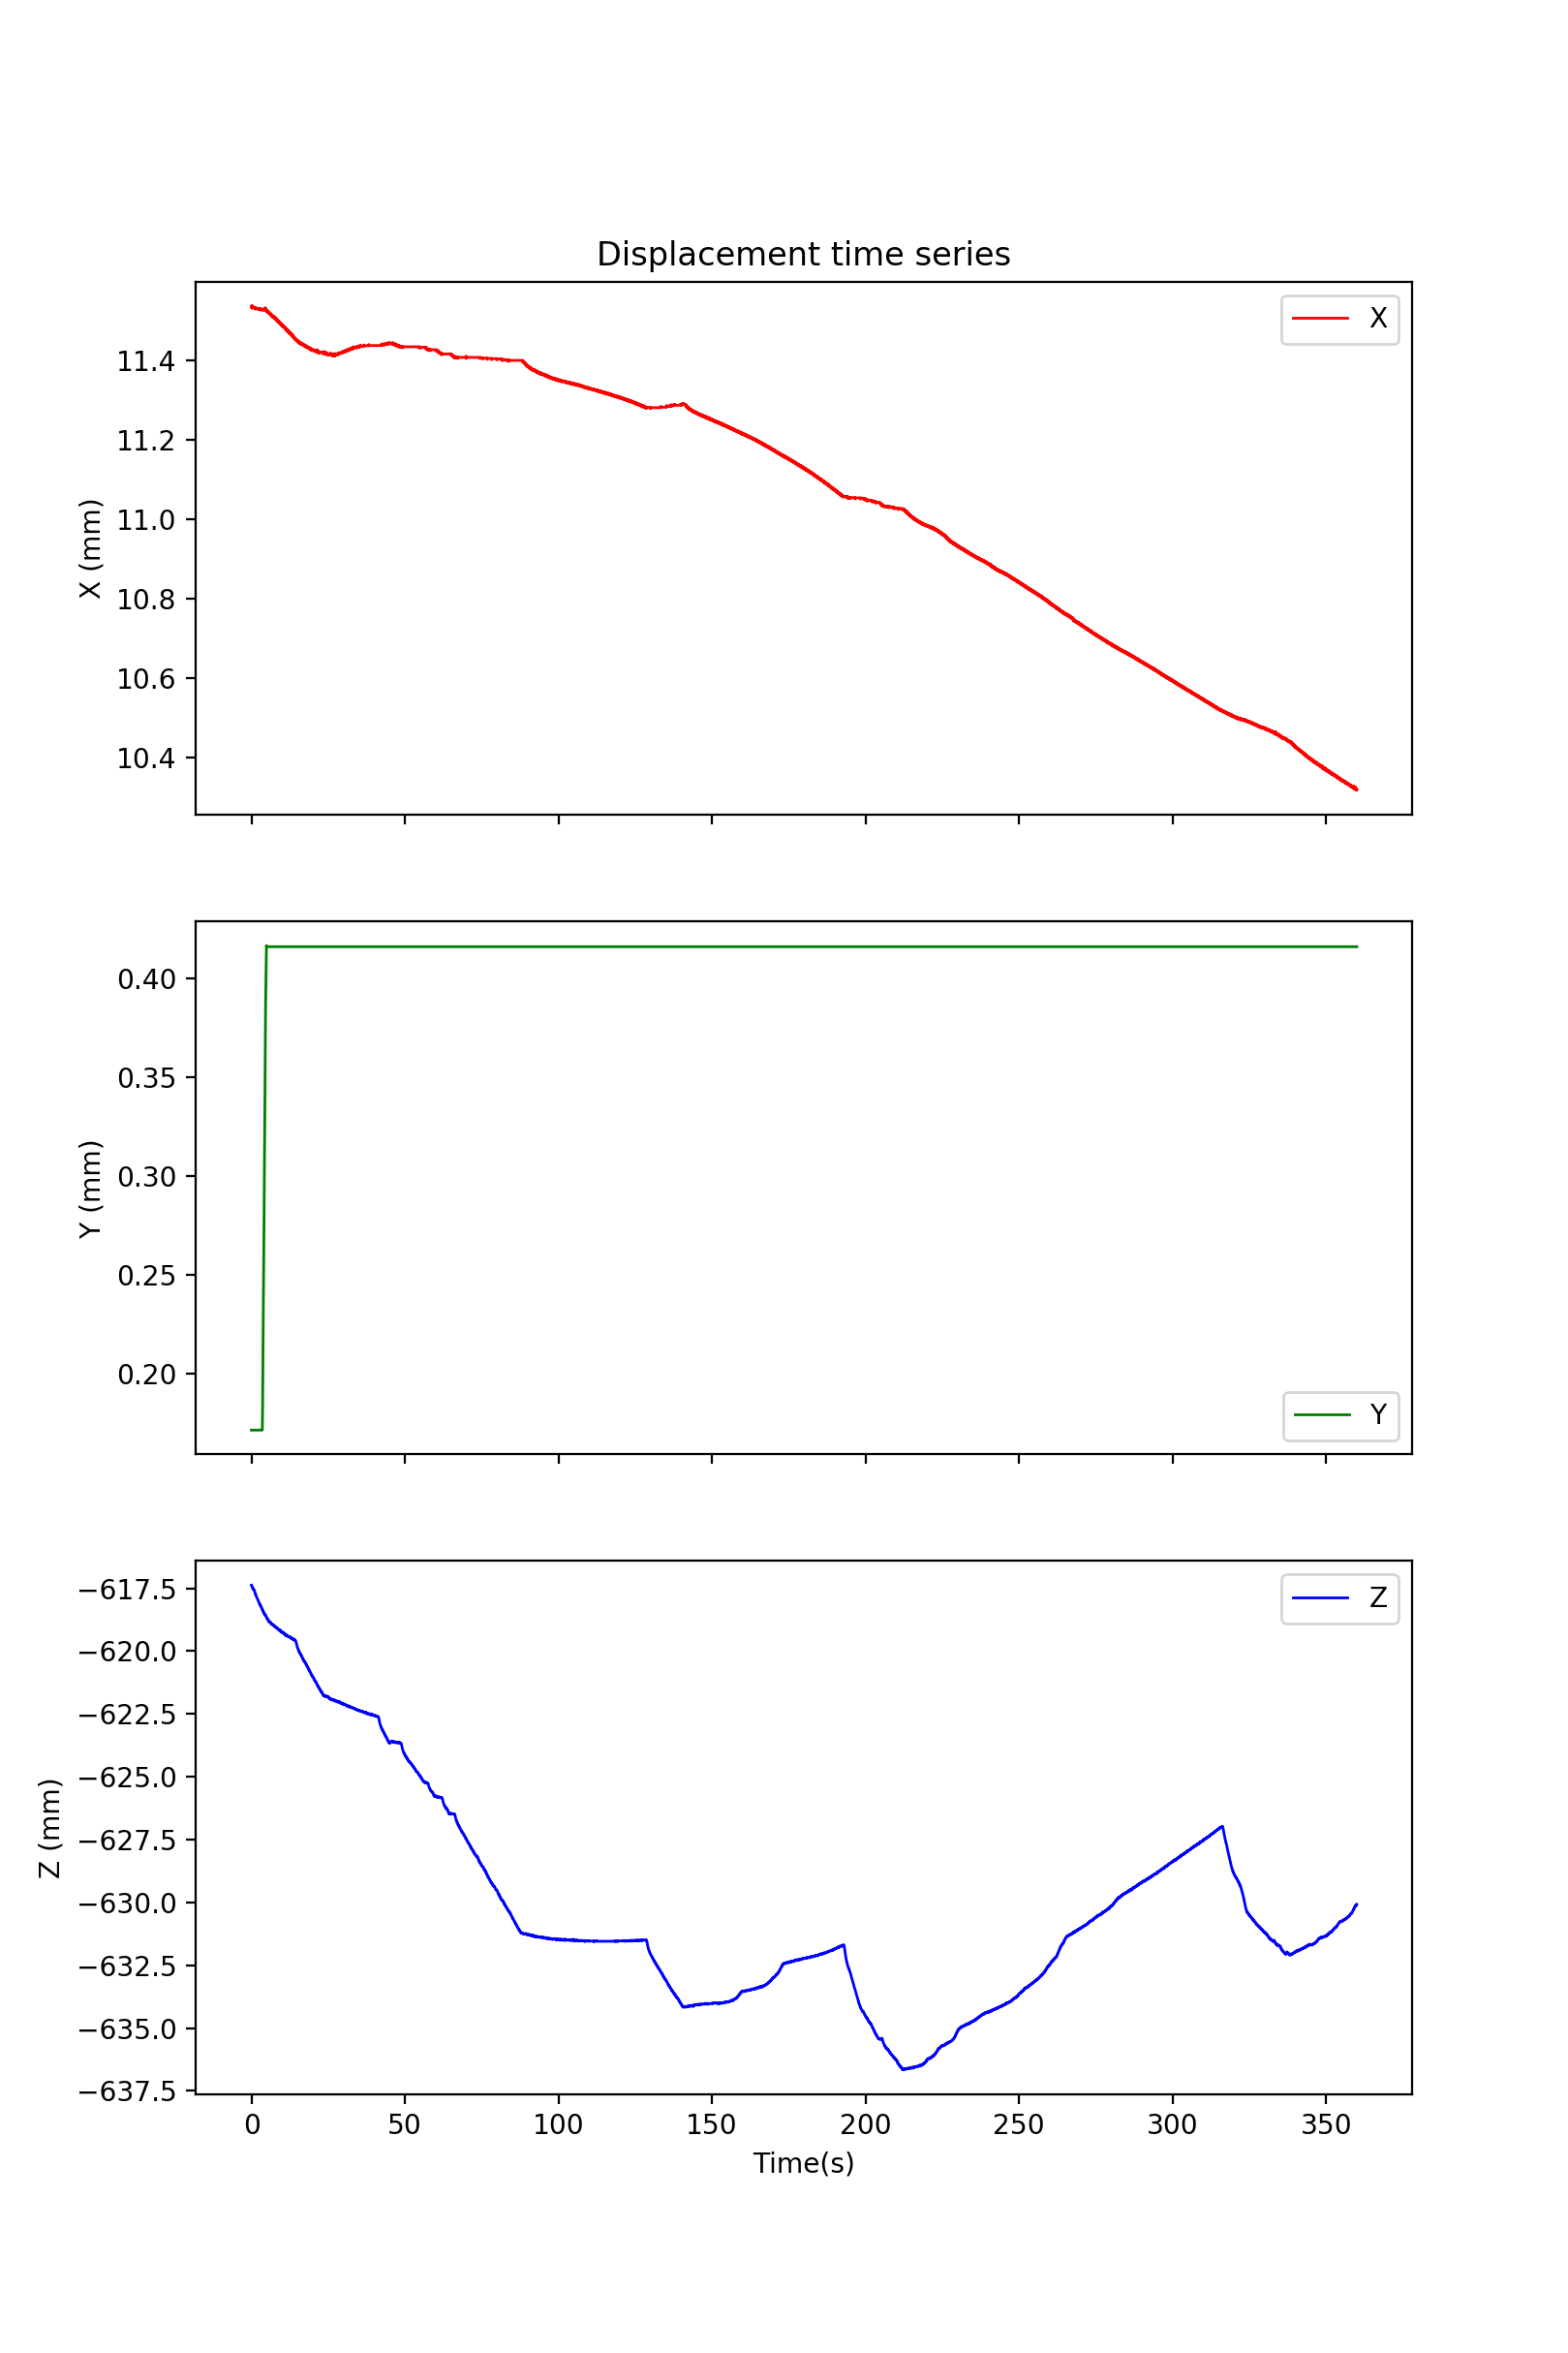

Saved Displacement time series.png to disk
Saved Displacement time series.svg to disk


In [121]:
# The analysis API has a built-in function to generate X, Y, Z displacement plots
gm_analysis.plot_displacement_timeseries()

# To save the plots to file, do the following
gm_analysis.plot_displacement_timeseries(save = True)

## Compute the object's velocity

In [123]:
gm_analysis.compute_velocity()

## Apply a low-pass filter to the velocity data to filter out high-freq noise


In [124]:
window_size = 40
print('Window size: ',window_size)
gm_analysis.data['V_x'] = np.array(gm_analysis.data['V_x'].rolling(window = window_size, center = True).mean())
gm_analysis.data['V_y'] = np.array(gm_analysis.data['V_y'].rolling(window = window_size, center = True).mean())
gm_analysis.data['V_z'] = np.array(gm_analysis.data['V_z'].rolling(window = window_size, center = True).mean())

print(gm_analysis.data['V_x'])

Window size:  40
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
16007   NaN
16008   NaN
16009   NaN
16010   NaN
16011   NaN
Name: V_x, Length: 16012, dtype: float64


## Plot a time-series for the velocity

<IPython.core.display.Javascript object>


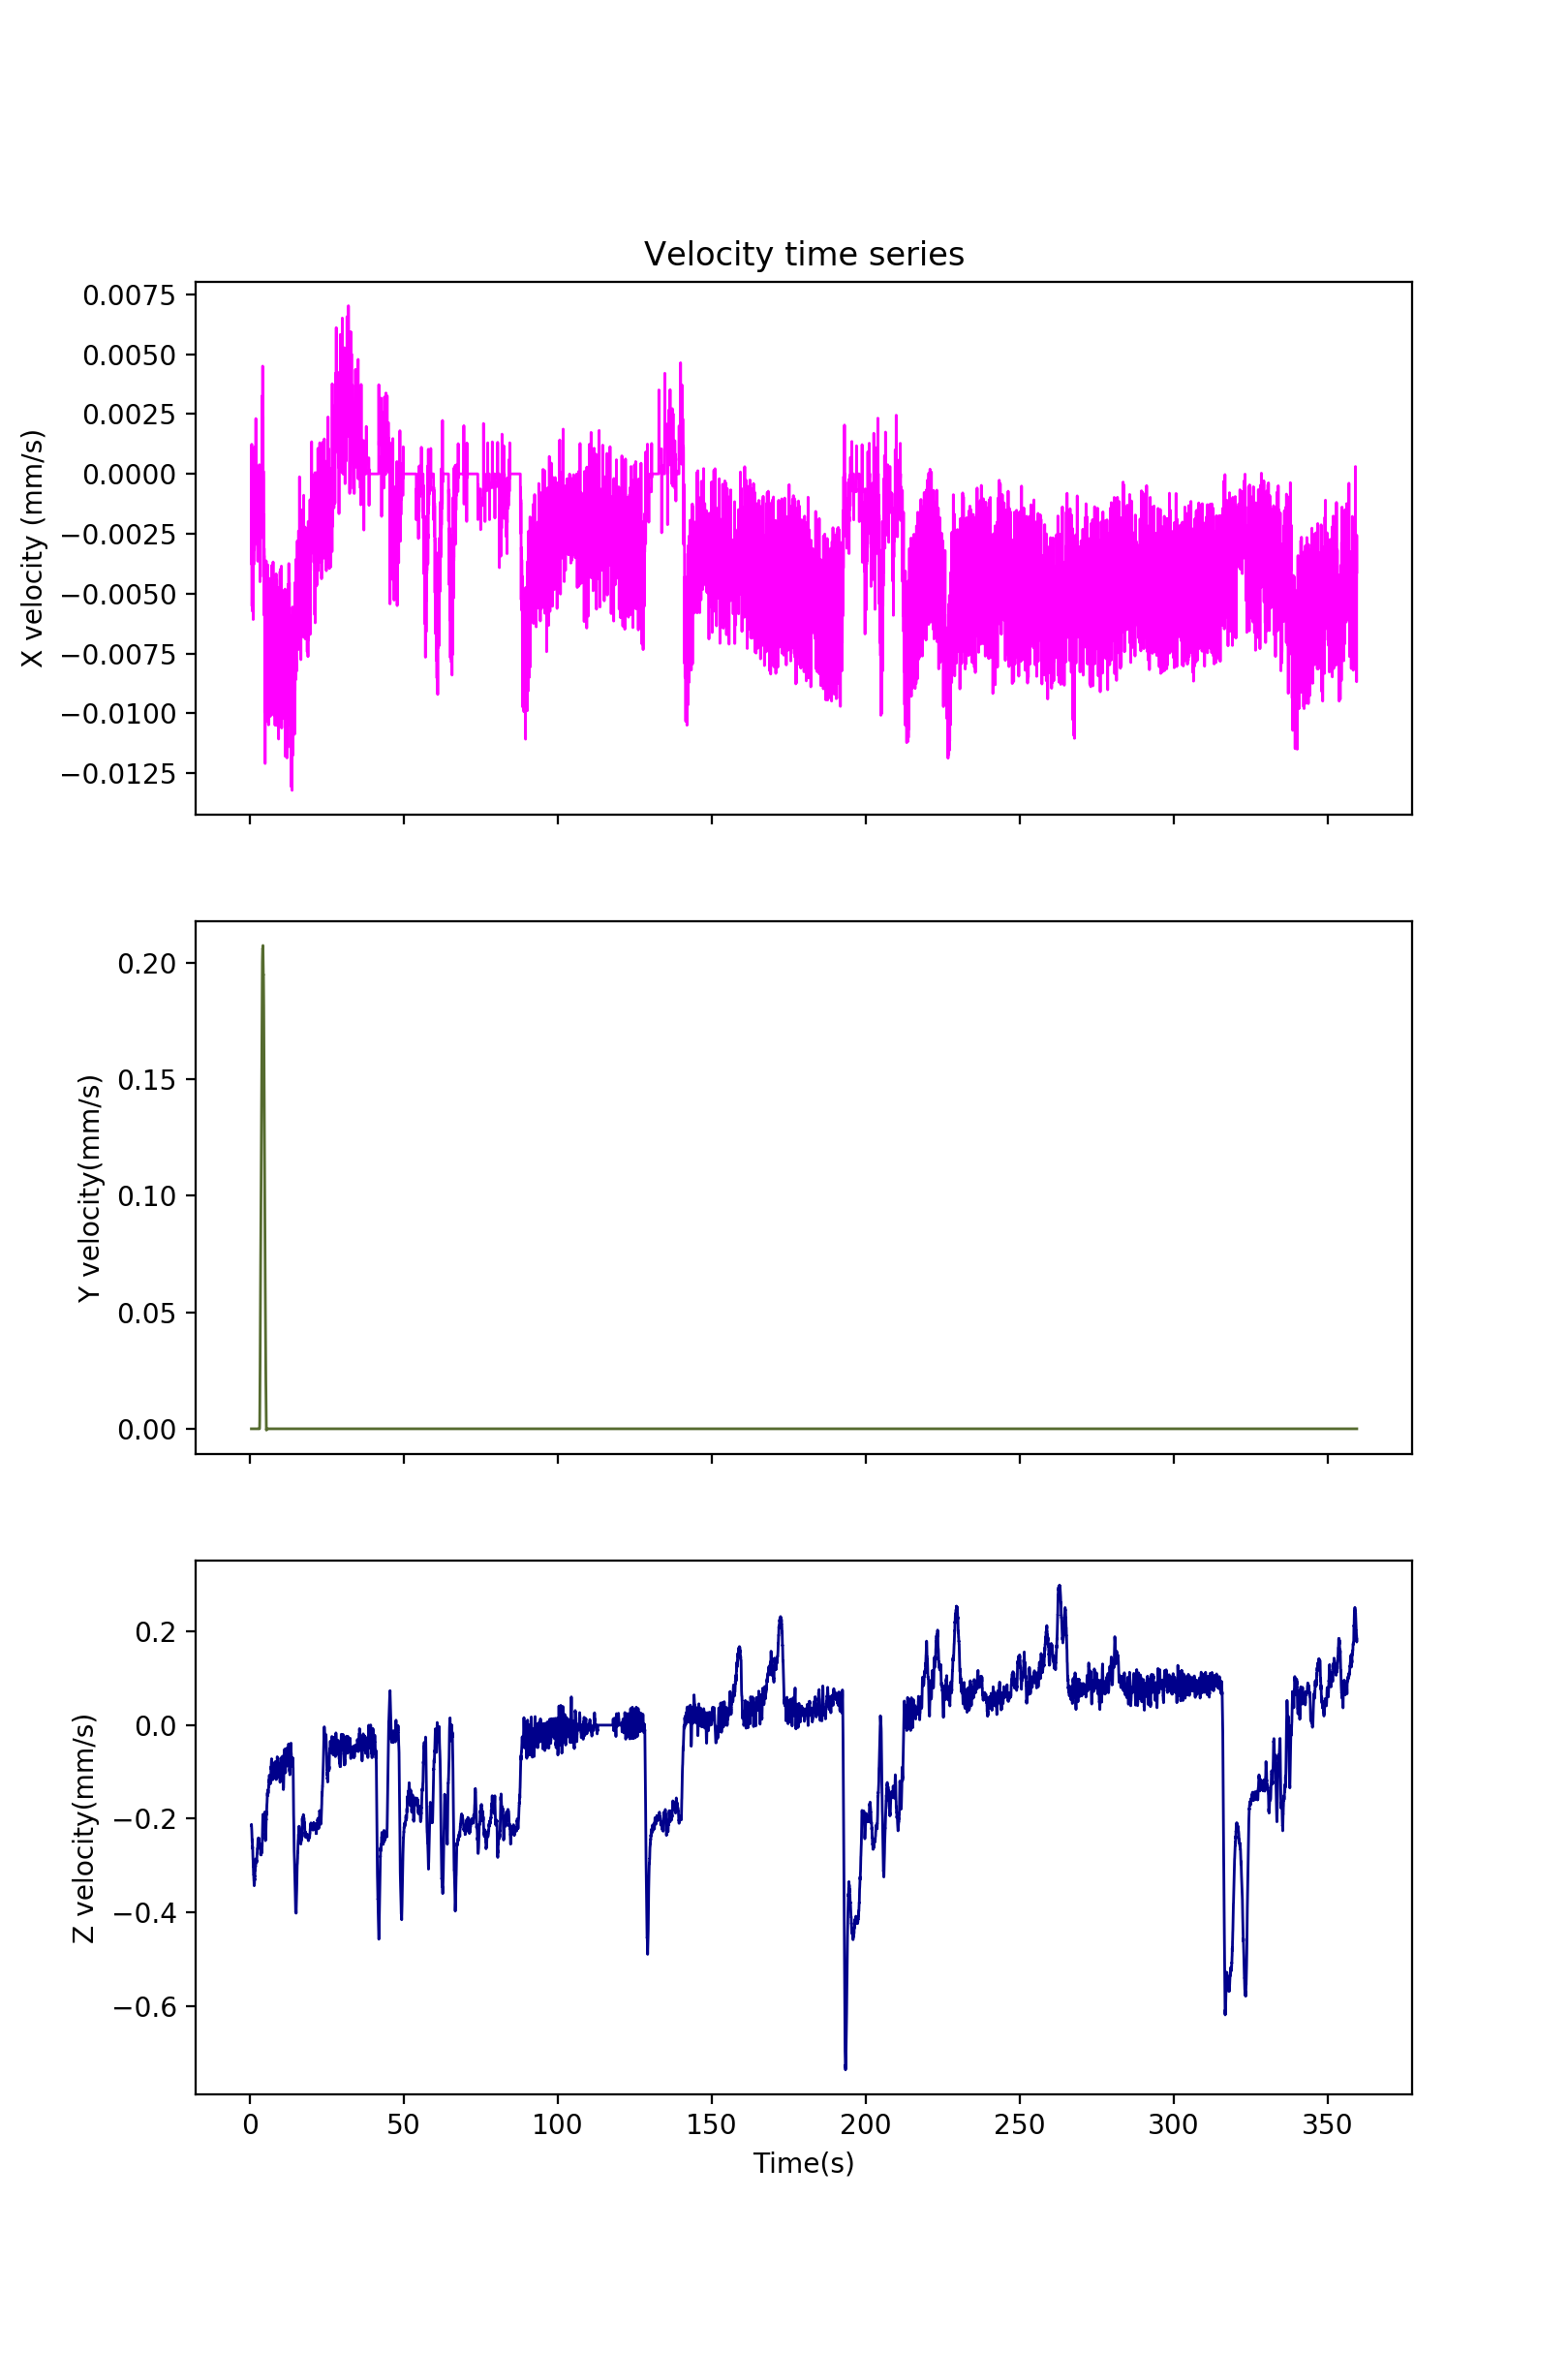

In [125]:
gm_analysis.plot_velocity_timeseries()

## Find the size of the object of interest

In [127]:
gm_analysis.find_object_size()

Loading organism size from memory ...
**************************************************
object diameter 0.15528175329706473 mm
object diameter max 0.15136040851568722 mm
object diameter min 0.15920309807844224 mm
**************************************************


## Running PIV on a pair of frames

--------------------------------------------------
Analyzing Frame pairs: IMG_5000.tif and IMG_5001.tif 

--------------------------------------------------
--------------------------------------------------
Percentage of bad vectors: 3.8095238095238093 %
--------------------------------------------------


<IPython.core.display.Javascript object>


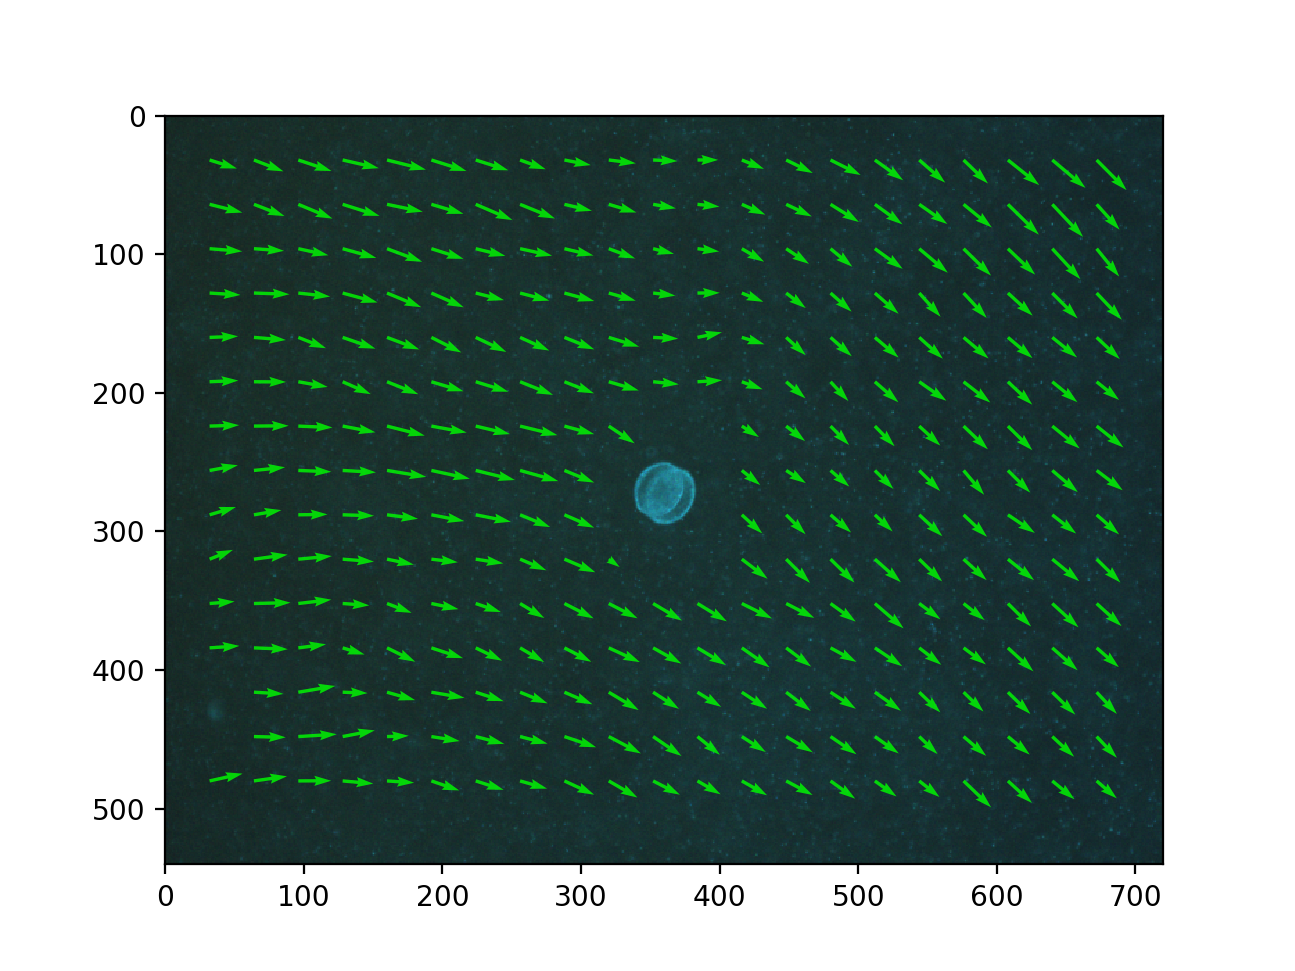

0.0008223443605307643
-0.0003815193134428065


(0.0008223443605307643,
 -0.0003815193134428065,
 0.0001460039361756993,
 0.00025572366910176685)

In [129]:
image_a = 'IMG_5000.tif'
image_b = 'IMG_5001.tif'
gm_analysis.initialize_piv_analysis()
gm_analysis.compute_background_fluid_velocity(image_a, image_b)

## Running PIV analysis to compute the object's velocity and displacement relative to the fluid

In [ ]:
gm_analysis.compute_fluid_velocity_timeseries()

  0%|          | 1/4125 [00:00<08:05,  8.49it/s]

calculating fluid velocity time series ...
1
Consequtive images found ...
IMG_3878.tif
IMG_3879.tif
--------------------------------------------------
Loading PIV data for: IMG_3878.tif and IMG_3879.tif 

--------------------------------------------------
0.11903691819360533
-0.0016469801703017555
0.12068389836390708
1
Consequtive images found ...
IMG_3879.tif
IMG_3880.tif
--------------------------------------------------
Loading PIV data for: IMG_3879.tif and IMG_3880.tif 

--------------------------------------------------
0.1088409028944315


  0%|          | 3/4125 [00:00<07:50,  8.77it/s]

0.041404962535990845
0.06743594035844064
1
Consequtive images found ...
IMG_3880.tif
IMG_3881.tif
--------------------------------------------------
Loading PIV data for: IMG_3880.tif and IMG_3881.tif 

--------------------------------------------------
0.15747761354551995
-0.04217315704806227
0.1996507705935822
1
Consequtive images found ...
IMG_3881.tif
IMG_3882.tif
--------------------------------------------------
Loading PIV data for: IMG_3881.tif and IMG_3882.tif 

--------------------------------------------------
0.08993776771795624


  0%|          | 5/4125 [00:00<07:43,  8.89it/s]

0.04338628283232564
0.04655148488563061
1
Consequtive images found ...
IMG_3882.tif
IMG_3883.tif
--------------------------------------------------
Loading PIV data for: IMG_3882.tif and IMG_3883.tif 

--------------------------------------------------
0.2011579694927606
-0.05352550334204584
0.2546834728348064
1
Consequtive images found ...
IMG_3883.tif
IMG_3884.tif
--------------------------------------------------
Loading PIV data for: IMG_3883.tif and IMG_3884.tif 

--------------------------------------------------
0.12110647779094338


  0%|          | 7/4125 [00:00<07:35,  9.04it/s]

0.03434569155903686
0.08676078623190653
1
Consequtive images found ...
IMG_3884.tif
IMG_3885.tif
--------------------------------------------------
Loading PIV data for: IMG_3884.tif and IMG_3885.tif 

--------------------------------------------------
0.15593217121197617
-0.0024010292292310355
0.15833320044120722
1
Consequtive images found ...
IMG_3885.tif
IMG_3886.tif
--------------------------------------------------
Loading PIV data for: IMG_3885.tif and IMG_3886.tif 

--------------------------------------------------
0.14998656758929405


  0%|          | 9/4125 [00:00<07:35,  9.03it/s]

-0.0032156598982837413
0.1532022274875778
1
Consequtive images found ...
IMG_3886.tif
IMG_3887.tif
--------------------------------------------------
Loading PIV data for: IMG_3886.tif and IMG_3887.tif 

--------------------------------------------------
0.12293623386984665
-0.003047309668938536
0.1259835435387852
1
Consequtive images found ...
IMG_3887.tif
IMG_3888.tif
--------------------------------------------------
Loading PIV data for: IMG_3887.tif and IMG_3888.tif 

--------------------------------------------------
0.13005266048867617


  0%|          | 11/4125 [00:01<07:30,  9.13it/s]

-0.0028337626545296172
0.13288642314320578
1
Consequtive images found ...
IMG_3888.tif
IMG_3889.tif
--------------------------------------------------
Loading PIV data for: IMG_3888.tif and IMG_3889.tif 

--------------------------------------------------
0.12322754156524367
-0.004143331015457253
0.12737087258070093
1
Consequtive images found ...
IMG_3889.tif
IMG_3890.tif
--------------------------------------------------
Loading PIV data for: IMG_3889.tif and IMG_3890.tif 

--------------------------------------------------
0.11010905161702536


  0%|          | 13/4125 [00:01<07:26,  9.21it/s]

0.002799620020357144
0.10730943159666823
1
Consequtive images found ...
IMG_3890.tif
IMG_3891.tif
--------------------------------------------------
Loading PIV data for: IMG_3890.tif and IMG_3891.tif 

--------------------------------------------------
0.13098946765657923
-0.0026926449692017745
0.133682112625781
1
Consequtive images found ...
IMG_3891.tif
IMG_3892.tif
--------------------------------------------------
Loading PIV data for: IMG_3891.tif and IMG_3892.tif 

--------------------------------------------------
0.1613227030913474


  0%|          | 15/4125 [00:01<07:28,  9.15it/s]

0.008639292309741496
0.15268341078160594
1
Consequtive images found ...
IMG_3892.tif
IMG_3893.tif
--------------------------------------------------
Loading PIV data for: IMG_3892.tif and IMG_3893.tif 

--------------------------------------------------
0.17426419042246571
-0.003507695072675429
0.17777188549514114
1
Consequtive images found ...
IMG_3893.tif
IMG_3894.tif
--------------------------------------------------
Loading PIV data for: IMG_3893.tif and IMG_3894.tif 

--------------------------------------------------
0.19325902529450995


  0%|          | 17/4125 [00:01<07:29,  9.14it/s]

-0.0025225142416091693
0.19578153953611913
1
Consequtive images found ...
IMG_3894.tif
IMG_3895.tif
--------------------------------------------------
Loading PIV data for: IMG_3894.tif and IMG_3895.tif 

--------------------------------------------------
0.17115594619935529
-0.002700763655746811
0.17385670985510213
1
Consequtive images found ...
IMG_3895.tif
IMG_3896.tif
--------------------------------------------------
Loading PIV data for: IMG_3895.tif and IMG_3896.tif 

--------------------------------------------------
0.19284045058607804


  0%|          | 19/4125 [00:02<07:24,  9.24it/s]

-0.00029574293441797896
0.19313619352049605
1
Consequtive images found ...
IMG_3896.tif
IMG_3897.tif
--------------------------------------------------
Loading PIV data for: IMG_3896.tif and IMG_3897.tif 

--------------------------------------------------
0.19810874716820798
0.0011803149335942566
0.1969284322346137
1
Consequtive images found ...
IMG_3897.tif
IMG_3898.tif
--------------------------------------------------
Loading PIV data for: IMG_3897.tif and IMG_3898.tif 

--------------------------------------------------
0.16339006596473685


  1%|          | 21/4125 [00:02<07:21,  9.29it/s]

-0.0033600110845509166
0.16675007704928776
1
Consequtive images found ...
IMG_3898.tif
IMG_3899.tif
--------------------------------------------------
Loading PIV data for: IMG_3898.tif and IMG_3899.tif 

--------------------------------------------------
0.1787598235115384
-0.004713122134450007
0.1834729456459884
1
Consequtive images found ...
IMG_3899.tif
IMG_3900.tif
--------------------------------------------------
Loading PIV data for: IMG_3899.tif and IMG_3900.tif 

--------------------------------------------------
0.17586214978522724


  1%|          | 23/4125 [00:02<07:21,  9.28it/s]

-0.003775495125968542
0.17963764491119577
1
Consequtive images found ...
IMG_3900.tif
IMG_3901.tif
--------------------------------------------------
Loading PIV data for: IMG_3900.tif and IMG_3901.tif 

--------------------------------------------------
0.146844285926088
-0.0038103478975905704
0.15065463382367858
1
Consequtive images found ...
IMG_3901.tif
IMG_3902.tif
--------------------------------------------------
Loading PIV data for: IMG_3901.tif and IMG_3902.tif 

--------------------------------------------------
0.2003330253337553


  1%|          | 25/4125 [00:02<07:27,  9.15it/s]

-0.0022205676924500276
0.20255359302620538
1
Consequtive images found ...
IMG_3902.tif
IMG_3903.tif
--------------------------------------------------
Loading PIV data for: IMG_3902.tif and IMG_3903.tif 

--------------------------------------------------
0.15779756707015247
-0.0038381638992981554
0.16163573096945064
1
Consequtive images found ...
IMG_3903.tif
IMG_3904.tif
--------------------------------------------------
Loading PIV data for: IMG_3903.tif and IMG_3904.tif 

--------------------------------------------------
0.18019192399703332


  1%|          | 27/4125 [00:02<07:56,  8.60it/s]

-0.003679139897478641
0.18387106389451197
1
Consequtive images found ...
IMG_3904.tif
IMG_3905.tif
--------------------------------------------------
Loading PIV data for: IMG_3904.tif and IMG_3905.tif 

--------------------------------------------------
0.16673575946502142
-0.005125358015172913
0.1718611174801943
1
Consequtive images found ...
IMG_3905.tif
IMG_3906.tif
--------------------------------------------------
Loading PIV data for: IMG_3905.tif and IMG_3906.tif 

--------------------------------------------------
0.18382873983572964


  1%|          | 29/4125 [00:03<07:40,  8.90it/s]

-0.002660755257060264
0.18648949509278992
1
Consequtive images found ...
IMG_3906.tif
IMG_3907.tif
--------------------------------------------------
Loading PIV data for: IMG_3906.tif and IMG_3907.tif 

--------------------------------------------------
0.18311769505002243
0.00020026422228385413
0.18291743082773856
1
Consequtive images found ...
IMG_3907.tif
IMG_3908.tif
--------------------------------------------------
Loading PIV data for: IMG_3907.tif and IMG_3908.tif 

--------------------------------------------------
0.1811203921761112


  1%|          | 31/4125 [00:03<07:30,  9.10it/s]

-0.004792917048508683
0.1859133092246199
1
Consequtive images found ...
IMG_3908.tif
IMG_3909.tif
--------------------------------------------------
Loading PIV data for: IMG_3908.tif and IMG_3909.tif 

--------------------------------------------------
0.16268012885977684
0.00222227507043863
0.16045785378933816
1
Consequtive images found ...
IMG_3909.tif
IMG_3910.tif
--------------------------------------------------
Loading PIV data for: IMG_3909.tif and IMG_3910.tif 

--------------------------------------------------
0.1746940166287824


  1%|          | 33/4125 [00:03<07:32,  9.05it/s]

-0.00475912960581137
0.17945314623459377
1
Consequtive images found ...
IMG_3910.tif
IMG_3911.tif
--------------------------------------------------
Loading PIV data for: IMG_3910.tif and IMG_3911.tif 

--------------------------------------------------
0.1653434950544244
-0.004377633571128658
0.16972112862555302
1
Consequtive images found ...
IMG_3911.tif
IMG_3912.tif
--------------------------------------------------
Loading PIV data for: IMG_3911.tif and IMG_3912.tif 

--------------------------------------------------
0.14343934425093108


  1%|          | 35/4125 [00:03<07:31,  9.06it/s]

-0.0031768565203954464
0.1466162007713265
1
Consequtive images found ...
IMG_3912.tif
IMG_3913.tif
--------------------------------------------------
Loading PIV data for: IMG_3912.tif and IMG_3913.tif 

--------------------------------------------------
0.17916025058034912
0.0012970087454956675
0.17786324183485347
1
Consequtive images found ...
IMG_3913.tif
IMG_3914.tif
--------------------------------------------------
Loading PIV data for: IMG_3913.tif and IMG_3914.tif 

--------------------------------------------------
0.14770822470289224


  1%|          | 37/4125 [00:04<07:23,  9.21it/s]

-0.0025240694883916694
0.1502322941912839
1
Consequtive images found ...
IMG_3914.tif
IMG_3915.tif
--------------------------------------------------
Loading PIV data for: IMG_3914.tif and IMG_3915.tif 

--------------------------------------------------
0.16178488256137954
-0.003715733570124596
0.16550061613150416
1
Consequtive images found ...
IMG_3915.tif
IMG_3916.tif
--------------------------------------------------
Loading PIV data for: IMG_3915.tif and IMG_3916.tif 

--------------------------------------------------
0.14575028777496649


  1%|          | 39/4125 [00:04<07:24,  9.19it/s]

-0.0031053614763550397
0.14885564925132155
1
Consequtive images found ...
IMG_3916.tif
IMG_3917.tif
--------------------------------------------------
Loading PIV data for: IMG_3916.tif and IMG_3917.tif 

--------------------------------------------------
0.15670069500680642
-0.008060082565868954
0.16476077757267538
1
Consequtive images found ...
IMG_3917.tif
IMG_3918.tif
--------------------------------------------------
Loading PIV data for: IMG_3917.tif and IMG_3918.tif 

--------------------------------------------------
0.1689179592065298


  1%|          | 41/4125 [00:04<07:26,  9.16it/s]

-0.002052729234010484
0.17097068844054028
1
Consequtive images found ...
IMG_3918.tif
IMG_3919.tif
--------------------------------------------------
Loading PIV data for: IMG_3918.tif and IMG_3919.tif 

--------------------------------------------------
0.17515225266128506
-0.004109652039551114
0.17926190470083617
1
Consequtive images found ...
IMG_3919.tif
IMG_3920.tif
--------------------------------------------------
Loading PIV data for: IMG_3919.tif and IMG_3920.tif 

--------------------------------------------------
0.18094149759749983


  1%|          | 43/4125 [00:04<07:26,  9.15it/s]

-0.001805692664161846
0.1827471902616617
1
Consequtive images found ...
IMG_3920.tif
IMG_3921.tif
--------------------------------------------------
Loading PIV data for: IMG_3920.tif and IMG_3921.tif 

--------------------------------------------------
0.1761283282024926
-0.007680548467778413
0.183808876670271
1
Consequtive images found ...
IMG_3921.tif
IMG_3922.tif
--------------------------------------------------
Loading PIV data for: IMG_3921.tif and IMG_3922.tif 

--------------------------------------------------
0.18039282504954154


  1%|          | 45/4125 [00:04<07:26,  9.14it/s]

0.006098797822088136
0.17429402722745338
1
Consequtive images found ...
IMG_3922.tif
IMG_3923.tif
--------------------------------------------------
Loading PIV data for: IMG_3922.tif and IMG_3923.tif 

--------------------------------------------------
0.14779523176446463
-0.005536335701376004
0.15333156746584062
1
Consequtive images found ...
IMG_3923.tif
IMG_3924.tif
--------------------------------------------------
Loading PIV data for: IMG_3923.tif and IMG_3924.tif 

--------------------------------------------------
0.17542401651505024


  1%|          | 47/4125 [00:05<07:42,  8.81it/s]

-0.009433037966915274
0.1848570544819655
1
Consequtive images found ...
IMG_3924.tif
IMG_3925.tif
--------------------------------------------------
Loading PIV data for: IMG_3924.tif and IMG_3925.tif 

--------------------------------------------------
0.1432307562150498
-0.004044858511334841
0.14727561472638462
1
Consequtive images found ...
IMG_3925.tif
IMG_3926.tif
--------------------------------------------------
Loading PIV data for: IMG_3925.tif and IMG_3926.tif 

--------------------------------------------------
0.17798569727483218


  1%|          | 49/4125 [00:05<07:35,  8.94it/s]

-0.001816160153496525
0.1798018574283287
1
Consequtive images found ...
IMG_3926.tif
IMG_3927.tif
--------------------------------------------------
Loading PIV data for: IMG_3926.tif and IMG_3927.tif 

--------------------------------------------------
0.16806889629081304
-0.006273354906640077
0.17434225119745314
1
Consequtive images found ...
IMG_3927.tif
IMG_3928.tif
--------------------------------------------------
Loading PIV data for: IMG_3927.tif and IMG_3928.tif 

--------------------------------------------------
0.1489174659077774


  1%|          | 51/4125 [00:05<07:29,  9.07it/s]

-0.0011659738765829588
0.15008343978436037
1
Consequtive images found ...
IMG_3928.tif
IMG_3929.tif
--------------------------------------------------
Loading PIV data for: IMG_3928.tif and IMG_3929.tif 

--------------------------------------------------
0.17600022422753692
0.0002913862314330735
0.17570883799610384
1
Consequtive images found ...
IMG_3929.tif
IMG_3930.tif
--------------------------------------------------
Loading PIV data for: IMG_3929.tif and IMG_3930.tif 

--------------------------------------------------
0.18552967862476274


  1%|▏         | 53/4125 [00:05<07:30,  9.04it/s]

-0.04093397450016448
0.2264636531249272
1
Consequtive images found ...
IMG_3930.tif
IMG_3931.tif
--------------------------------------------------
Loading PIV data for: IMG_3930.tif and IMG_3931.tif 

--------------------------------------------------
0.15180620082992088
-0.008537074058455444
0.16034327488837632
1
Consequtive images found ...
IMG_3931.tif
IMG_3932.tif
--------------------------------------------------
Loading PIV data for: IMG_3931.tif and IMG_3932.tif 

--------------------------------------------------
0.10358783596403702


  1%|▏         | 55/4125 [00:06<07:24,  9.16it/s]

-0.001350574912212117
0.10493841087624915
1
Consequtive images found ...
IMG_3932.tif
IMG_3933.tif
--------------------------------------------------
Loading PIV data for: IMG_3932.tif and IMG_3933.tif 

--------------------------------------------------
0.07767884854652857
0.043248510549884975
0.03443033799664359
1
Consequtive images found ...
IMG_3933.tif
IMG_3934.tif
--------------------------------------------------
Loading PIV data for: IMG_3933.tif and IMG_3934.tif 

--------------------------------------------------
0.11378597411190583


  1%|▏         | 57/4125 [00:06<07:22,  9.20it/s]

-0.006118982790856346
0.1199049569027622
1
Consequtive images found ...
IMG_3934.tif
IMG_3935.tif
--------------------------------------------------
Loading PIV data for: IMG_3934.tif and IMG_3935.tif 

--------------------------------------------------
0.12015318246442494
0.005115976595978608
0.11503720586844635
1
Consequtive images found ...
IMG_3935.tif
IMG_3936.tif
--------------------------------------------------
Loading PIV data for: IMG_3935.tif and IMG_3936.tif 

--------------------------------------------------
0.15265989381842185


  1%|▏         | 59/4125 [00:06<07:52,  8.60it/s]

0.011619045102767286
0.14104084871565456
1
Consequtive images found ...
IMG_3936.tif
IMG_3937.tif
--------------------------------------------------
Loading PIV data for: IMG_3936.tif and IMG_3937.tif 

--------------------------------------------------
0.13571176860498213
0.0018984346480790425
0.1338133339569031
1
Consequtive images found ...
IMG_3937.tif
IMG_3938.tif
--------------------------------------------------
Loading PIV data for: IMG_3937.tif and IMG_3938.tif 

--------------------------------------------------
0.12936080643392184


  1%|▏         | 61/4125 [00:06<07:38,  8.86it/s]

0.0005365673934370997
0.1288242390404847
1
Consequtive images found ...
IMG_3938.tif
IMG_3939.tif
--------------------------------------------------
Loading PIV data for: IMG_3938.tif and IMG_3939.tif 

--------------------------------------------------
0.11638694413804297
0.0017424980677081985
0.11464444607033478
1
Consequtive images found ...
IMG_3939.tif
IMG_3940.tif
--------------------------------------------------
Loading PIV data for: IMG_3939.tif and IMG_3940.tif 

--------------------------------------------------
0.12139412506128884


  2%|▏         | 63/4125 [00:06<07:30,  9.02it/s]

2.5947475231989483e-05
0.12136817758605686
1
Consequtive images found ...
IMG_3940.tif
IMG_3941.tif
--------------------------------------------------
Loading PIV data for: IMG_3940.tif and IMG_3941.tif 

--------------------------------------------------
0.126189224718622
-0.003409253413280672
0.12959847813190267
1
Consequtive images found ...
IMG_3941.tif
IMG_3942.tif
--------------------------------------------------
Loading PIV data for: IMG_3941.tif and IMG_3942.tif 

--------------------------------------------------
0.10765862780400366


  2%|▏         | 65/4125 [00:07<07:28,  9.06it/s]

0.005648687746369697
0.10200994005763396
1
Consequtive images found ...
IMG_3942.tif
IMG_3943.tif
--------------------------------------------------
Loading PIV data for: IMG_3942.tif and IMG_3943.tif 

--------------------------------------------------
0.12035673092884974
-0.0043014216701732395
0.12465815259902298
1
Consequtive images found ...
IMG_3943.tif
IMG_3944.tif
--------------------------------------------------
Loading PIV data for: IMG_3943.tif and IMG_3944.tif 

--------------------------------------------------
0.10761735657913304


  2%|▏         | 67/4125 [00:07<07:29,  9.03it/s]

-0.005294904627418461
0.11291226120655151
1
Consequtive images found ...
IMG_3944.tif
IMG_3945.tif
--------------------------------------------------
Loading PIV data for: IMG_3944.tif and IMG_3945.tif 

--------------------------------------------------
0.11145426126930633
0.008812650889566133
0.10264161037974022
1
Consequtive images found ...
IMG_3945.tif
IMG_3946.tif
--------------------------------------------------
Loading PIV data for: IMG_3945.tif and IMG_3946.tif 

--------------------------------------------------
0.11288421007122433


  2%|▏         | 69/4125 [00:07<07:28,  9.05it/s]

0.00047999629488194227
0.11240421377634241
1
Consequtive images found ...
IMG_3946.tif
IMG_3947.tif
--------------------------------------------------
Loading PIV data for: IMG_3946.tif and IMG_3947.tif 

--------------------------------------------------
0.12255549264585097
0.009195582917214826
0.11335990972863615
1
Consequtive images found ...
IMG_3947.tif
IMG_3948.tif
--------------------------------------------------
Loading PIV data for: IMG_3947.tif and IMG_3948.tif 

--------------------------------------------------
0.10016544023800628


  2%|▏         | 71/4125 [00:07<07:25,  9.09it/s]

0.0002102164529140747
0.09995522378509221
1
Consequtive images found ...
IMG_3948.tif
IMG_3949.tif
--------------------------------------------------
Loading PIV data for: IMG_3948.tif and IMG_3949.tif 

--------------------------------------------------
0.11626310484852653
0.0012757957385475202
0.11498730910997898
1
Consequtive images found ...
IMG_3949.tif
IMG_3950.tif
--------------------------------------------------
Loading PIV data for: IMG_3949.tif and IMG_3950.tif 

--------------------------------------------------
0.06314541836427746


  2%|▏         | 73/4125 [00:08<07:27,  9.06it/s]

0.0006414318386805351
0.06250398652559692
1
Consequtive images found ...
IMG_3950.tif
IMG_3951.tif
--------------------------------------------------
Loading PIV data for: IMG_3950.tif and IMG_3951.tif 

--------------------------------------------------
0.1041079010832114
0.00500734060119314
0.09910056048201824
1
Consequtive images found ...
IMG_3951.tif
IMG_3952.tif
--------------------------------------------------
Loading PIV data for: IMG_3951.tif and IMG_3952.tif 

--------------------------------------------------
0.07129726337319106


  2%|▏         | 75/4125 [00:08<07:25,  9.09it/s]

-0.0034170136609739466
0.074714277034165
1
Consequtive images found ...
IMG_3952.tif
IMG_3953.tif
--------------------------------------------------
Loading PIV data for: IMG_3952.tif and IMG_3953.tif 

--------------------------------------------------
0.08848315240569678
0.00046024654375049866
0.08802290586194628
1
Consequtive images found ...
IMG_3953.tif
IMG_3954.tif
--------------------------------------------------
Loading PIV data for: IMG_3953.tif and IMG_3954.tif 

--------------------------------------------------
0.10561773675530324


  2%|▏         | 77/4125 [00:08<07:23,  9.12it/s]

-0.0029481369992689285
0.10856587375457218
1
Consequtive images found ...
IMG_3954.tif
IMG_3955.tif
--------------------------------------------------
Loading PIV data for: IMG_3954.tif and IMG_3955.tif 

--------------------------------------------------
0.09042719610498944
0.006421655534352452
0.08400554057063699
1
Consequtive images found ...
IMG_3955.tif
IMG_3956.tif
--------------------------------------------------
Loading PIV data for: IMG_3955.tif and IMG_3956.tif 

--------------------------------------------------
0.090234350698614


  2%|▏         | 79/4125 [00:08<07:20,  9.18it/s]

0.006616951321382243
0.08361739937723177
1
Consequtive images found ...
IMG_3956.tif
IMG_3957.tif
--------------------------------------------------
Loading PIV data for: IMG_3956.tif and IMG_3957.tif 

--------------------------------------------------
0.09078682456460634
0.004807380627346902
0.08597944393725945
1
Consequtive images found ...
IMG_3957.tif
IMG_3958.tif
--------------------------------------------------
Loading PIV data for: IMG_3957.tif and IMG_3958.tif 

--------------------------------------------------
0.08779379683251717


  2%|▏         | 81/4125 [00:08<07:15,  9.29it/s]

0.004859465578656906
0.08293433125386027
1
Consequtive images found ...
IMG_3958.tif
IMG_3959.tif
--------------------------------------------------
Loading PIV data for: IMG_3958.tif and IMG_3959.tif 

--------------------------------------------------
0.078872612301276
-0.004044714280679942
0.08291732658195594
1
Consequtive images found ...
IMG_3959.tif
IMG_3960.tif
--------------------------------------------------
Loading PIV data for: IMG_3959.tif and IMG_3960.tif 

--------------------------------------------------
0.06182108653669624


  2%|▏         | 83/4125 [00:09<07:20,  9.17it/s]

-0.004436871614018374
0.0662579581507146
1
Consequtive images found ...
IMG_3960.tif
IMG_3961.tif
--------------------------------------------------
Loading PIV data for: IMG_3960.tif and IMG_3961.tif 

--------------------------------------------------
0.0800321706567167
0.01230422773925474
0.06772794291746195
1
Consequtive images found ...
IMG_3961.tif
IMG_3962.tif
--------------------------------------------------
Loading PIV data for: IMG_3961.tif and IMG_3962.tif 

--------------------------------------------------
0.07070335280704655


  2%|▏         | 85/4125 [00:09<07:25,  9.06it/s]

-0.004253711592461436
0.07495706439950799
1
Consequtive images found ...
IMG_3962.tif
IMG_3963.tif
--------------------------------------------------
Loading PIV data for: IMG_3962.tif and IMG_3963.tif 

--------------------------------------------------
0.06895161935977934
-0.005808657970609979
0.07476027733038931
1
Consequtive images found ...
IMG_3963.tif
IMG_3964.tif
--------------------------------------------------
Loading PIV data for: IMG_3963.tif and IMG_3964.tif 

--------------------------------------------------
0.07630066408171692


  2%|▏         | 87/4125 [00:09<07:21,  9.14it/s]

0.0006583219146269773
0.07564234216708994
1
Consequtive images found ...
IMG_3964.tif
IMG_3965.tif
--------------------------------------------------
Loading PIV data for: IMG_3964.tif and IMG_3965.tif 

--------------------------------------------------
0.0716217790281014
0.01109793186823552
0.060523847159865876
1
Consequtive images found ...
IMG_3965.tif
IMG_3966.tif
--------------------------------------------------
Loading PIV data for: IMG_3965.tif and IMG_3966.tif 

--------------------------------------------------
0.04958441911847531


  2%|▏         | 89/4125 [00:09<07:25,  9.07it/s]

-0.0002966805045673299
0.049881099623042637
1
Consequtive images found ...
IMG_3966.tif
IMG_3967.tif
--------------------------------------------------
Loading PIV data for: IMG_3966.tif and IMG_3967.tif 

--------------------------------------------------
0.05677383976940162
0.0023421507614880144
0.0544316890079136
1
Consequtive images found ...
IMG_3967.tif
IMG_3968.tif
--------------------------------------------------
Loading PIV data for: IMG_3967.tif and IMG_3968.tif 

--------------------------------------------------
0.07700422767187369


  2%|▏         | 91/4125 [00:10<07:50,  8.58it/s]

-0.0030622083540148112
0.08006643602588852
1
Consequtive images found ...
IMG_3968.tif
IMG_3969.tif
--------------------------------------------------
Loading PIV data for: IMG_3968.tif and IMG_3969.tif 

--------------------------------------------------
0.0709883247683796
-0.005222917165849353
0.07621124193422894
1
Consequtive images found ...
IMG_3969.tif
IMG_3970.tif
--------------------------------------------------
Loading PIV data for: IMG_3969.tif and IMG_3970.tif 

--------------------------------------------------
0.0660293199580999


  2%|▏         | 93/4125 [00:10<07:30,  8.94it/s]

-0.003957292174780297
0.06998661213288018
1
Consequtive images found ...
IMG_3970.tif
IMG_3971.tif
--------------------------------------------------
Loading PIV data for: IMG_3970.tif and IMG_3971.tif 

--------------------------------------------------
0.06827362999305867
0.005005072409888068
0.0632685575831706
1
Consequtive images found ...
IMG_3971.tif
IMG_3972.tif
--------------------------------------------------
Loading PIV data for: IMG_3971.tif and IMG_3972.tif 

--------------------------------------------------
0.07147781109764867


  2%|▏         | 95/4125 [00:10<07:26,  9.03it/s]

0.004725141569092031
0.06675266952855663
1
Consequtive images found ...
IMG_3972.tif
IMG_3973.tif
--------------------------------------------------
Loading PIV data for: IMG_3972.tif and IMG_3973.tif 

--------------------------------------------------
0.06078422660429259
-0.0014066857852450595
0.06219091238953765
1
Consequtive images found ...
IMG_3973.tif
IMG_3974.tif
--------------------------------------------------
Loading PIV data for: IMG_3973.tif and IMG_3974.tif 

--------------------------------------------------
0.05917262850730832


  2%|▏         | 97/4125 [00:10<07:21,  9.13it/s]

0.00601381192962701
0.05315881657768131
1
Consequtive images found ...
IMG_3974.tif
IMG_3975.tif
--------------------------------------------------
Loading PIV data for: IMG_3974.tif and IMG_3975.tif 

--------------------------------------------------
0.05047537464891836
-0.000260245942302429
0.05073562059122079
1
Consequtive images found ...
IMG_3975.tif
IMG_3976.tif
--------------------------------------------------
Loading PIV data for: IMG_3975.tif and IMG_3976.tif 

--------------------------------------------------
0.07088759207587103


  2%|▏         | 99/4125 [00:10<07:24,  9.06it/s]

0.00822251459056911
0.06266507748530192
1
Consequtive images found ...
IMG_3976.tif
IMG_3977.tif
--------------------------------------------------
Loading PIV data for: IMG_3976.tif and IMG_3977.tif 

--------------------------------------------------
0.045480094321184814
-0.0020607691688823374
0.047540863490067156
1
Consequtive images found ...
IMG_3977.tif
IMG_3978.tif
--------------------------------------------------
Loading PIV data for: IMG_3977.tif and IMG_3978.tif 

--------------------------------------------------
0.06279121146517294


  2%|▏         | 101/4125 [00:11<07:19,  9.16it/s]

0.00046981866114380864
0.062321392804029145
1
Consequtive images found ...
IMG_3978.tif
IMG_3979.tif
--------------------------------------------------
Loading PIV data for: IMG_3978.tif and IMG_3979.tif 

--------------------------------------------------
0.06756307277895654
0.015936400348462484
0.05162667243049404
1
Consequtive images found ...
IMG_3979.tif
IMG_3980.tif
--------------------------------------------------
Loading PIV data for: IMG_3979.tif and IMG_3980.tif 

--------------------------------------------------
0.05155533800922118


  2%|▏         | 103/4125 [00:11<07:19,  9.14it/s]

-0.0035228043708294236
0.055078142380050606
1
Consequtive images found ...
IMG_3980.tif
IMG_3981.tif
--------------------------------------------------
Loading PIV data for: IMG_3980.tif and IMG_3981.tif 

--------------------------------------------------
0.04504462736824974
-0.006102817509038673
0.051147444877288416
1
Consequtive images found ...
IMG_3981.tif
IMG_3982.tif
--------------------------------------------------
Loading PIV data for: IMG_3981.tif and IMG_3982.tif 

--------------------------------------------------
0.06463683534478452


  3%|▎         | 105/4125 [00:11<07:21,  9.11it/s]

0.0007248617146216208
0.06391197363016288
1
Consequtive images found ...
IMG_3982.tif
IMG_3983.tif
--------------------------------------------------
Loading PIV data for: IMG_3982.tif and IMG_3983.tif 

--------------------------------------------------
0.05848679665531275
-0.0026888274315246463
0.06117562408683741
1
Consequtive images found ...
IMG_3983.tif
IMG_3984.tif
--------------------------------------------------
Loading PIV data for: IMG_3983.tif and IMG_3984.tif 

--------------------------------------------------
0.07431970391910225


  3%|▎         | 107/4125 [00:11<07:15,  9.22it/s]

0.01432226661375618
0.05999743730534607
1
Consequtive images found ...
IMG_3984.tif
IMG_3985.tif
--------------------------------------------------
Loading PIV data for: IMG_3984.tif and IMG_3985.tif 

--------------------------------------------------
0.06520410994317967
-0.005332101928898313
0.070536211872078
1
Consequtive images found ...
IMG_3985.tif
IMG_3986.tif
--------------------------------------------------
Loading PIV data for: IMG_3985.tif and IMG_3986.tif 

--------------------------------------------------
0.05336029357913921


  3%|▎         | 109/4125 [00:12<07:16,  9.19it/s]

0.006697237135591975
0.046663056443547235
1
Consequtive images found ...
IMG_3986.tif
IMG_3987.tif
--------------------------------------------------
Loading PIV data for: IMG_3986.tif and IMG_3987.tif 

--------------------------------------------------
0.03463086340857788
0.00727116037370786
0.027359703034870026
1
Consequtive images found ...
IMG_3987.tif
IMG_3988.tif
--------------------------------------------------
Loading PIV data for: IMG_3987.tif and IMG_3988.tif 

--------------------------------------------------
0.014689338779788084


  3%|▎         | 111/4125 [00:12<07:17,  9.18it/s]

-0.005708051288615244
0.02039739006840333
1
Consequtive images found ...
IMG_3988.tif
IMG_3989.tif
--------------------------------------------------
Loading PIV data for: IMG_3988.tif and IMG_3989.tif 

--------------------------------------------------
0.04223126950105688
0.00912241442102276
0.03310885508003412
1
Consequtive images found ...
IMG_3989.tif
IMG_3990.tif
--------------------------------------------------
Loading PIV data for: IMG_3989.tif and IMG_3990.tif 

--------------------------------------------------
0.042290179878562865


  3%|▎         | 113/4125 [00:12<07:17,  9.17it/s]

0.0031437687375415243
0.03914641114102133
1
Consequtive images found ...
IMG_3990.tif
IMG_3991.tif
--------------------------------------------------
Loading PIV data for: IMG_3990.tif and IMG_3991.tif 

--------------------------------------------------
0.054174771229727435
-0.0029920571233404063
0.05716682835306783
1
Consequtive images found ...
IMG_3991.tif
IMG_3992.tif
--------------------------------------------------
Loading PIV data for: IMG_3991.tif and IMG_3992.tif 

--------------------------------------------------
0.05885994728240422


  3%|▎         | 115/4125 [00:12<07:21,  9.09it/s]

-0.0007318529422382664
0.05959180022464248
1
Consequtive images found ...
IMG_3992.tif
IMG_3993.tif
--------------------------------------------------
Loading PIV data for: IMG_3992.tif and IMG_3993.tif 

--------------------------------------------------
0.04965192788539477
0.0007813989298019261
0.04887052895559284
1
Consequtive images found ...
IMG_3993.tif
IMG_3994.tif
--------------------------------------------------
Loading PIV data for: IMG_3993.tif and IMG_3994.tif 

--------------------------------------------------
0.04625776172393499


  3%|▎         | 117/4125 [00:12<07:22,  9.06it/s]

0.0016333979048767941
0.04462436381905819
1
Consequtive images found ...
IMG_3994.tif
IMG_3995.tif
--------------------------------------------------
Loading PIV data for: IMG_3994.tif and IMG_3995.tif 

--------------------------------------------------
0.053807163455662076
0.0007811540768181176
0.05302600937884396
1
Consequtive images found ...
IMG_3995.tif
IMG_3996.tif
--------------------------------------------------
Loading PIV data for: IMG_3995.tif and IMG_3996.tif 

--------------------------------------------------
0.06627690090859051


  3%|▎         | 119/4125 [00:13<07:21,  9.08it/s]

0.0032343457718181077
0.06304255513677241
1
Consequtive images found ...
IMG_3996.tif
IMG_3997.tif
--------------------------------------------------
Loading PIV data for: IMG_3996.tif and IMG_3997.tif 

--------------------------------------------------
0.04711042384875063
-0.004175856860220442
0.051286280708971066
1
Consequtive images found ...
IMG_3997.tif
IMG_3998.tif
--------------------------------------------------
Loading PIV data for: IMG_3997.tif and IMG_3998.tif 

--------------------------------------------------
0.046600848210607955


  3%|▎         | 121/4125 [00:13<07:18,  9.12it/s]

0.0018148534154778953
0.044785994795130055
1
Consequtive images found ...
IMG_3998.tif
IMG_3999.tif
--------------------------------------------------
Loading PIV data for: IMG_3998.tif and IMG_3999.tif 

--------------------------------------------------
0.0409155876141702
0.00951329999360241
0.03140228762056778
1
Consequtive images found ...
IMG_3999.tif
IMG_4000.tif
--------------------------------------------------
Loading PIV data for: IMG_3999.tif and IMG_4000.tif 

--------------------------------------------------
0.01831099405974834


  3%|▎         | 123/4125 [00:13<07:57,  8.37it/s]

-0.005005827389022563
0.0233168214487709
1
Consequtive images found ...
IMG_4000.tif
IMG_4001.tif
--------------------------------------------------
Loading PIV data for: IMG_4000.tif and IMG_4001.tif 

--------------------------------------------------
0.023430811018308448
0.0025286513586442994
0.02090215965966415
1
Consequtive images found ...
IMG_4001.tif
IMG_4002.tif
--------------------------------------------------
Loading PIV data for: IMG_4001.tif and IMG_4002.tif 

--------------------------------------------------
0.029858925702579163


  3%|▎         | 125/4125 [00:13<07:37,  8.74it/s]

-0.0019627448001537755
0.031821670502732935
1
Consequtive images found ...
IMG_4002.tif
IMG_4003.tif
--------------------------------------------------
Loading PIV data for: IMG_4002.tif and IMG_4003.tif 

--------------------------------------------------
0.03417443114488774
-0.00435268226557568
0.03852711341046342
1
Consequtive images found ...
IMG_4003.tif
IMG_4004.tif
--------------------------------------------------
Loading PIV data for: IMG_4003.tif and IMG_4004.tif 

--------------------------------------------------
0.056434672918355036


  3%|▎         | 127/4125 [00:14<07:24,  9.00it/s]

0.013649979281712967
0.04278469363664207
1
Consequtive images found ...
IMG_4004.tif
IMG_4005.tif
--------------------------------------------------
Loading PIV data for: IMG_4004.tif and IMG_4005.tif 

--------------------------------------------------
0.04733313984697276
-0.006779845762843434
0.054112985609816186
1
Consequtive images found ...
IMG_4005.tif
IMG_4006.tif
--------------------------------------------------
Loading PIV data for: IMG_4005.tif and IMG_4006.tif 

--------------------------------------------------
0.053537584988551774


  3%|▎         | 129/4125 [00:14<07:19,  9.09it/s]

0.006780564507410244
0.046757020481141526
1
Consequtive images found ...
IMG_4006.tif
IMG_4007.tif
--------------------------------------------------
Loading PIV data for: IMG_4006.tif and IMG_4007.tif 

--------------------------------------------------
0.02661978537627918
-0.005192128713059751
0.03181191408933893
1
Consequtive images found ...
IMG_4007.tif
IMG_4008.tif
--------------------------------------------------
Loading PIV data for: IMG_4007.tif and IMG_4008.tif 

--------------------------------------------------
0.03731088082252931


  3%|▎         | 131/4125 [00:14<07:15,  9.17it/s]

0.0010758468736856669
0.03623503394884365
1
Consequtive images found ...
IMG_4008.tif
IMG_4009.tif
--------------------------------------------------
Loading PIV data for: IMG_4008.tif and IMG_4009.tif 

--------------------------------------------------
0.0519538031150012
0.011795821525774231
0.040157981589226975
1
Consequtive images found ...
IMG_4009.tif
IMG_4010.tif
--------------------------------------------------
Loading PIV data for: IMG_4009.tif and IMG_4010.tif 

--------------------------------------------------
0.04203338606589822


  3%|▎         | 133/4125 [00:14<07:17,  9.13it/s]

-0.0064264028762673
0.04845978894216552
1
Consequtive images found ...
IMG_4010.tif
IMG_4011.tif
--------------------------------------------------
Loading PIV data for: IMG_4010.tif and IMG_4011.tif 

--------------------------------------------------
0.05287094389004018
0.0003434976298800823
0.052527446260160086
1
Consequtive images found ...
IMG_4011.tif
IMG_4012.tif
--------------------------------------------------
Loading PIV data for: IMG_4011.tif and IMG_4012.tif 

--------------------------------------------------
0.034170811921043744


  3%|▎         | 135/4125 [00:14<07:21,  9.04it/s]

-0.000688256277329091
0.03485906819837283
1
Consequtive images found ...
IMG_4012.tif
IMG_4013.tif
--------------------------------------------------
Loading PIV data for: IMG_4012.tif and IMG_4013.tif 

--------------------------------------------------
0.03274241182009674
0.0009721051766091528
0.03177030664348759
1
Consequtive images found ...
IMG_4013.tif
IMG_4014.tif
--------------------------------------------------
Loading PIV data for: IMG_4013.tif and IMG_4014.tif 

--------------------------------------------------
0.021778332245018222


  3%|▎         | 137/4125 [00:15<07:21,  9.03it/s]

0.008390010456823796
0.013388321788194425
1
Consequtive images found ...
IMG_4014.tif
IMG_4015.tif
--------------------------------------------------
Loading PIV data for: IMG_4014.tif and IMG_4015.tif 

--------------------------------------------------
0.008270103542745585
-5.694116081342051e-05
0.008327044703559005
1
Consequtive images found ...
IMG_4015.tif
IMG_4016.tif
--------------------------------------------------
Loading PIV data for: IMG_4015.tif and IMG_4016.tif 

--------------------------------------------------
0.018865641880163247


  3%|▎         | 139/4125 [00:15<07:20,  9.05it/s]

-0.005388439484265726
0.02425408136442897
1
Consequtive images found ...
IMG_4016.tif
IMG_4017.tif
--------------------------------------------------
Loading PIV data for: IMG_4016.tif and IMG_4017.tif 

--------------------------------------------------
0.03754268423346905
0.004819827814734705
0.03272285641873435
1
Consequtive images found ...
IMG_4017.tif
IMG_4018.tif
--------------------------------------------------
Loading PIV data for: IMG_4017.tif and IMG_4018.tif 

--------------------------------------------------
0.054027058530557406


  3%|▎         | 141/4125 [00:15<07:20,  9.05it/s]

0.006462149502649302
0.047564909027908095
1
Consequtive images found ...
IMG_4018.tif
IMG_4019.tif
--------------------------------------------------
Loading PIV data for: IMG_4018.tif and IMG_4019.tif 

--------------------------------------------------
0.03267380072733867
-0.006465314659357318
0.03913911538669599
1
Consequtive images found ...
IMG_4019.tif
IMG_4020.tif
--------------------------------------------------
Loading PIV data for: IMG_4019.tif and IMG_4020.tif 

--------------------------------------------------
0.0477389920186952


  3%|▎         | 143/4125 [00:15<07:38,  8.69it/s]

0.01095938729825543
0.03677960472043977
1
Consequtive images found ...
IMG_4020.tif
IMG_4021.tif
--------------------------------------------------
Loading PIV data for: IMG_4020.tif and IMG_4021.tif 

--------------------------------------------------
0.02272719077655794
-0.0044325512408925375
0.02715974201745048
1
Consequtive images found ...
IMG_4021.tif
IMG_4022.tif
--------------------------------------------------
Loading PIV data for: IMG_4021.tif and IMG_4022.tif 

--------------------------------------------------
0.02151576397030671


  4%|▎         | 145/4125 [00:16<07:21,  9.02it/s]

0.00180606740979284
0.019709696560513867
1
Consequtive images found ...
IMG_4022.tif
IMG_4023.tif
--------------------------------------------------
Loading PIV data for: IMG_4022.tif and IMG_4023.tif 

--------------------------------------------------
0.011912497837958246
0.003687264785785131
0.008225233052173117
1
Consequtive images found ...
IMG_4023.tif
IMG_4024.tif
--------------------------------------------------
Loading PIV data for: IMG_4023.tif and IMG_4024.tif 

--------------------------------------------------
0.008120511235632014


  4%|▎         | 147/4125 [00:16<07:15,  9.14it/s]

-0.006951626389780622
0.015072137625412636
1
Consequtive images found ...
IMG_4024.tif
IMG_4025.tif
--------------------------------------------------
Loading PIV data for: IMG_4024.tif and IMG_4025.tif 

--------------------------------------------------
0.0318405122112008
0.0016184254577798769
0.030222086753420925
1
Consequtive images found ...
IMG_4025.tif
IMG_4026.tif
--------------------------------------------------
Loading PIV data for: IMG_4025.tif and IMG_4026.tif 

--------------------------------------------------
0.03383687551054053


  4%|▎         | 149/4125 [00:16<07:15,  9.12it/s]

0.004922252265205514
0.028914623245335013
1
Consequtive images found ...
IMG_4026.tif
IMG_4027.tif
--------------------------------------------------
Loading PIV data for: IMG_4026.tif and IMG_4027.tif 

--------------------------------------------------
0.027629988754583182
-0.006213111447367521
0.03384310020195071
1
Consequtive images found ...
IMG_4027.tif
IMG_4028.tif
--------------------------------------------------
Loading PIV data for: IMG_4027.tif and IMG_4028.tif 

--------------------------------------------------
0.024846126508085094


  4%|▎         | 151/4125 [00:16<07:18,  9.05it/s]

-0.007370155602399764
0.032216282110484856
1
Consequtive images found ...
IMG_4028.tif
IMG_4029.tif
--------------------------------------------------
Loading PIV data for: IMG_4028.tif and IMG_4029.tif 

--------------------------------------------------
0.03167109010581715
0.009447318885886728
0.02222377121993042
1
Consequtive images found ...
IMG_4029.tif
IMG_4030.tif
--------------------------------------------------
Loading PIV data for: IMG_4029.tif and IMG_4030.tif 

--------------------------------------------------
0.00889668464814046


  4%|▎         | 153/4125 [00:16<07:19,  9.03it/s]

-0.007839215948932802
0.01673590059707326
1
Consequtive images found ...
IMG_4030.tif
IMG_4031.tif
--------------------------------------------------
Loading PIV data for: IMG_4030.tif and IMG_4031.tif 

--------------------------------------------------
0.015846073280749485
0.005411285910281133
0.010434787370468351
1
Consequtive images found ...
IMG_4031.tif
IMG_4032.tif
--------------------------------------------------
Loading PIV data for: IMG_4031.tif and IMG_4032.tif 

--------------------------------------------------
0.02626159151963724


  4%|▍         | 155/4125 [00:17<07:43,  8.56it/s]

0.0014560730542180315
0.02480551846541921
1
Consequtive images found ...
IMG_4032.tif
IMG_4033.tif
--------------------------------------------------
Loading PIV data for: IMG_4032.tif and IMG_4033.tif 

--------------------------------------------------
0.042800352284281896
0.010865906040296691
0.031934446243985205
1
Consequtive images found ...
IMG_4033.tif
IMG_4034.tif
--------------------------------------------------
Loading PIV data for: IMG_4033.tif and IMG_4034.tif 

--------------------------------------------------
0.03658376132329903


  4%|▍         | 157/4125 [00:17<07:30,  8.81it/s]

0.0008335632440035896
0.03575019807929544
1
Consequtive images found ...
IMG_4034.tif
IMG_4035.tif
--------------------------------------------------
Loading PIV data for: IMG_4034.tif and IMG_4035.tif 

--------------------------------------------------
0.030924092588352197
-0.0030335716398256036
0.0339576642281778
1
Consequtive images found ...
IMG_4035.tif
IMG_4036.tif
--------------------------------------------------
Loading PIV data for: IMG_4035.tif and IMG_4036.tif 

--------------------------------------------------
0.03517370004078713


  4%|▍         | 159/4125 [00:17<07:48,  8.47it/s]

0.006416202318342925
0.0287574977224442
1
Consequtive images found ...
IMG_4036.tif
IMG_4037.tif
--------------------------------------------------
Loading PIV data for: IMG_4036.tif and IMG_4037.tif 

--------------------------------------------------
0.015140213977821892
-0.0008849716869886717
0.016025185664810558
1
Consequtive images found ...
IMG_4037.tif
IMG_4038.tif
--------------------------------------------------
Loading PIV data for: IMG_4037.tif and IMG_4038.tif 

--------------------------------------------------
0.019510985535144878


  4%|▍         | 161/4125 [00:17<07:30,  8.80it/s]

0.01335106346236598
0.006159922072778899
1
Consequtive images found ...
IMG_4038.tif
IMG_4039.tif
--------------------------------------------------
Loading PIV data for: IMG_4038.tif and IMG_4039.tif 

--------------------------------------------------
0.005159128835909441
-0.006608788081406253
0.011767916917315692
1
Consequtive images found ...
IMG_4039.tif
IMG_4040.tif
--------------------------------------------------
Loading PIV data for: IMG_4039.tif and IMG_4040.tif 

--------------------------------------------------
0.01723375046709825


  4%|▍         | 163/4125 [00:18<07:24,  8.91it/s]

0.0008933741888265989
0.016340376278271656
1
Consequtive images found ...
IMG_4040.tif
IMG_4041.tif
--------------------------------------------------
Loading PIV data for: IMG_4040.tif and IMG_4041.tif 

--------------------------------------------------
0.02256713723366064
-0.00537499338021184
0.02794213061387248
1
Consequtive images found ...
IMG_4041.tif
IMG_4042.tif
--------------------------------------------------
Loading PIV data for: IMG_4041.tif and IMG_4042.tif 

--------------------------------------------------
0.03613768187531689


  4%|▍         | 165/4125 [00:18<07:23,  8.93it/s]

0.0020972818170312125
0.03404040005828569
1
Consequtive images found ...
IMG_4042.tif
IMG_4043.tif
--------------------------------------------------
Loading PIV data for: IMG_4042.tif and IMG_4043.tif 

--------------------------------------------------
0.03426622769120753
0.001458680804827915
0.03280754688637961
1
Consequtive images found ...
IMG_4043.tif
IMG_4044.tif
--------------------------------------------------
Loading PIV data for: IMG_4043.tif and IMG_4044.tif 

--------------------------------------------------
0.038736914563124086


  4%|▍         | 167/4125 [00:18<07:19,  9.01it/s]

0.006607596984202924
0.032129317578921165
1
Consequtive images found ...
IMG_4044.tif
IMG_4045.tif
--------------------------------------------------
Loading PIV data for: IMG_4044.tif and IMG_4045.tif 

--------------------------------------------------
0.026824107987661622
-0.007107460299968515
0.03393156828763014
1
Consequtive images found ...
IMG_4045.tif
IMG_4046.tif
--------------------------------------------------
Loading PIV data for: IMG_4045.tif and IMG_4046.tif 

--------------------------------------------------
0.0390850512068585


  4%|▍         | 169/4125 [00:18<07:17,  9.04it/s]

0.004890515632688999
0.034194535574169495
1
Consequtive images found ...
IMG_4046.tif
IMG_4047.tif
--------------------------------------------------
Loading PIV data for: IMG_4046.tif and IMG_4047.tif 

--------------------------------------------------
0.05859338634111225
-0.00781603347924566
0.0664094198203579
1
Consequtive images found ...
IMG_4047.tif
IMG_4048.tif
--------------------------------------------------
Loading PIV data for: IMG_4047.tif and IMG_4048.tif 

--------------------------------------------------
0.1032368095492219


  4%|▍         | 171/4125 [00:18<07:15,  9.08it/s]

0.016542792009146212
0.08669401754007569
1
Consequtive images found ...
IMG_4048.tif
IMG_4049.tif
--------------------------------------------------
Loading PIV data for: IMG_4048.tif and IMG_4049.tif 

--------------------------------------------------
0.1040398468112592
-0.007991726210607819
0.11203157302186703
1
Consequtive images found ...
IMG_4049.tif
IMG_4050.tif
--------------------------------------------------
Loading PIV data for: IMG_4049.tif and IMG_4050.tif 

--------------------------------------------------
0.08801997893992441


  4%|▍         | 173/4125 [00:19<07:14,  9.09it/s]

-0.009066871832449225
0.09708685077237364
1
Consequtive images found ...
IMG_4050.tif
IMG_4051.tif
--------------------------------------------------
Loading PIV data for: IMG_4050.tif and IMG_4051.tif 

--------------------------------------------------
0.14192658353443433
0.00736504130235763
0.1345615422320767
1
Consequtive images found ...
IMG_4051.tif
IMG_4052.tif
--------------------------------------------------
Loading PIV data for: IMG_4051.tif and IMG_4052.tif 

--------------------------------------------------
0.14565238401671277


  4%|▍         | 175/4125 [00:19<07:13,  9.11it/s]

-0.001000102685914793
0.14665248670262754
1
Consequtive images found ...
IMG_4052.tif
IMG_4053.tif
--------------------------------------------------
Loading PIV data for: IMG_4052.tif and IMG_4053.tif 

--------------------------------------------------
0.11663916258944795
0.004315601632725303
0.11232356095672266
1
Consequtive images found ...
IMG_4053.tif
IMG_4054.tif
--------------------------------------------------
Loading PIV data for: IMG_4053.tif and IMG_4054.tif 

--------------------------------------------------
0.15408034310622315


  4%|▍         | 177/4125 [00:19<07:11,  9.15it/s]

-0.012523389916351923
0.16660373302257508
1
Consequtive images found ...
IMG_4054.tif
IMG_4055.tif
--------------------------------------------------
Loading PIV data for: IMG_4054.tif and IMG_4055.tif 

--------------------------------------------------
0.13554752129496597
-0.002457465601033285
0.1380049868959993
1
Consequtive images found ...
IMG_4055.tif
IMG_4056.tif
--------------------------------------------------
Loading PIV data for: IMG_4055.tif and IMG_4056.tif 

--------------------------------------------------
0.15286129816021582


  4%|▍         | 179/4125 [00:19<07:08,  9.21it/s]

0.003095949536540182
0.14976534862367566
1
Consequtive images found ...
IMG_4056.tif
IMG_4057.tif
--------------------------------------------------
Loading PIV data for: IMG_4056.tif and IMG_4057.tif 

--------------------------------------------------
0.14315813346601547
-0.008367389449619405
0.15152552291563487
1
Consequtive images found ...
IMG_4057.tif
IMG_4058.tif
--------------------------------------------------
Loading PIV data for: IMG_4057.tif and IMG_4058.tif 

--------------------------------------------------
0.16432377910888638


  4%|▍         | 181/4125 [00:20<07:07,  9.22it/s]

0.003727272967752947
0.16059650614113344
1
Consequtive images found ...
IMG_4058.tif
IMG_4059.tif
--------------------------------------------------
Loading PIV data for: IMG_4058.tif and IMG_4059.tif 

--------------------------------------------------
0.15066165074314333
0.004331923274937998
0.14632972746820533
1
Consequtive images found ...
IMG_4059.tif
IMG_4060.tif
--------------------------------------------------
Loading PIV data for: IMG_4059.tif and IMG_4060.tif 

--------------------------------------------------
0.1527135984739951


  4%|▍         | 183/4125 [00:20<07:11,  9.13it/s]

-0.00914517166169487
0.16185877013568997
1
Consequtive images found ...
IMG_4060.tif
IMG_4061.tif
--------------------------------------------------
Loading PIV data for: IMG_4060.tif and IMG_4061.tif 

--------------------------------------------------
0.15388206464308266
-0.005174434791365429
0.15905649943444808
1
Consequtive images found ...
IMG_4061.tif
IMG_4062.tif
--------------------------------------------------
Loading PIV data for: IMG_4061.tif and IMG_4062.tif 

--------------------------------------------------
0.16736719241982803


  4%|▍         | 185/4125 [00:20<07:06,  9.24it/s]

0.00010183058648443569
0.16726536183334362
1
Consequtive images found ...
IMG_4062.tif
IMG_4063.tif
--------------------------------------------------
Loading PIV data for: IMG_4062.tif and IMG_4063.tif 

--------------------------------------------------
0.1399394257121298
-0.01046792456530535
0.15040735027743513
1
Consequtive images found ...
IMG_4063.tif
IMG_4064.tif
--------------------------------------------------
Loading PIV data for: IMG_4063.tif and IMG_4064.tif 

--------------------------------------------------
0.15376665260126138


  5%|▍         | 187/4125 [00:20<07:31,  8.71it/s]

-0.002585043868748723
0.1563516964700101
1
Consequtive images found ...
IMG_4064.tif
IMG_4065.tif
--------------------------------------------------
Loading PIV data for: IMG_4064.tif and IMG_4065.tif 

--------------------------------------------------
0.1292334248367966
-0.007021716130756658
0.13625514096755326
1
Consequtive images found ...
IMG_4065.tif
IMG_4066.tif
--------------------------------------------------
Loading PIV data for: IMG_4065.tif and IMG_4066.tif 

--------------------------------------------------
0.1455576804515737


  5%|▍         | 189/4125 [00:20<07:21,  8.91it/s]

-0.008108957406040162
0.15366663785761386
1
Consequtive images found ...
IMG_4066.tif
IMG_4067.tif
--------------------------------------------------
Loading PIV data for: IMG_4066.tif and IMG_4067.tif 

--------------------------------------------------
0.14301706281400844
-0.006461775597865878
0.1494788384118743
1
Consequtive images found ...
IMG_4067.tif
IMG_4068.tif
--------------------------------------------------
Loading PIV data for: IMG_4067.tif and IMG_4068.tif 

--------------------------------------------------
0.14643765784591964


  5%|▍         | 191/4125 [00:21<07:17,  8.99it/s]

0.0046775053000349355
0.1417601525458847
1
Consequtive images found ...
IMG_4068.tif
IMG_4069.tif
--------------------------------------------------
Loading PIV data for: IMG_4068.tif and IMG_4069.tif 

--------------------------------------------------
0.13887567032478243
-0.006280754401078939
0.14515642472586138
1
Consequtive images found ...
IMG_4069.tif
IMG_4070.tif
--------------------------------------------------
Loading PIV data for: IMG_4069.tif and IMG_4070.tif 

--------------------------------------------------
0.1489952506040778


  5%|▍         | 193/4125 [00:21<07:15,  9.03it/s]

-0.012440246040176172
0.16143549664425394
1
Consequtive images found ...
IMG_4070.tif
IMG_4071.tif
--------------------------------------------------
Loading PIV data for: IMG_4070.tif and IMG_4071.tif 

--------------------------------------------------
0.18158850951269118
0.00461036078002003
0.17697814873267112
1
Consequtive images found ...
IMG_4071.tif
IMG_4072.tif
--------------------------------------------------
Loading PIV data for: IMG_4071.tif and IMG_4072.tif 

--------------------------------------------------
0.15041069611687508


  5%|▍         | 195/4125 [00:21<07:10,  9.12it/s]

-0.0056166476038966495
0.15602734372077173
1
Consequtive images found ...
IMG_4072.tif
IMG_4073.tif
--------------------------------------------------
Loading PIV data for: IMG_4072.tif and IMG_4073.tif 

--------------------------------------------------
0.14428793379963525
-0.0012623769113083603
0.1455503107109436
1
Consequtive images found ...
IMG_4073.tif
IMG_4074.tif
--------------------------------------------------
Loading PIV data for: IMG_4073.tif and IMG_4074.tif 

--------------------------------------------------
0.16542512656917885


  5%|▍         | 197/4125 [00:21<07:08,  9.16it/s]

-0.0009539975604300366
0.1663791241296089
1
Consequtive images found ...
IMG_4074.tif
IMG_4075.tif
--------------------------------------------------
Loading PIV data for: IMG_4074.tif and IMG_4075.tif 

--------------------------------------------------
0.16128308646503486
0.0034896974574440886
0.15779338900759077
1
Consequtive images found ...
IMG_4075.tif
IMG_4076.tif
--------------------------------------------------
Loading PIV data for: IMG_4075.tif and IMG_4076.tif 

--------------------------------------------------
0.1519755346520704


  5%|▍         | 199/4125 [00:22<07:05,  9.22it/s]

-0.009838953392889354
0.16181448804495974
1
Consequtive images found ...
IMG_4076.tif
IMG_4077.tif
--------------------------------------------------
Loading PIV data for: IMG_4076.tif and IMG_4077.tif 

--------------------------------------------------
0.15841266641959598
-0.004688683795690092
0.16310135021528605
1
Consequtive images found ...
IMG_4077.tif
IMG_4078.tif
--------------------------------------------------
Loading PIV data for: IMG_4077.tif and IMG_4078.tif 

--------------------------------------------------
0.1473938362648771


  5%|▍         | 201/4125 [00:22<07:06,  9.21it/s]

-0.010147184440930008
0.15754102070580708
1
Consequtive images found ...
IMG_4078.tif
IMG_4079.tif
--------------------------------------------------
Loading PIV data for: IMG_4078.tif and IMG_4079.tif 

--------------------------------------------------
0.13870896685958425
-0.00533392060591115
0.1440428874654954
1
Consequtive images found ...
IMG_4079.tif
IMG_4080.tif
--------------------------------------------------
Loading PIV data for: IMG_4079.tif and IMG_4080.tif 

--------------------------------------------------
0.14465379982002105


  5%|▍         | 203/4125 [00:22<07:03,  9.26it/s]

-0.002380643852882321
0.14703444367290336
1
Consequtive images found ...
IMG_4080.tif
IMG_4081.tif
--------------------------------------------------
Loading PIV data for: IMG_4080.tif and IMG_4081.tif 

--------------------------------------------------
0.1407986105889381
0.008277133765501205
0.1325214768234369
1
Consequtive images found ...
IMG_4081.tif
IMG_4082.tif
--------------------------------------------------
Loading PIV data for: IMG_4081.tif and IMG_4082.tif 

--------------------------------------------------
0.14697122589501113


  5%|▍         | 205/4125 [00:22<07:02,  9.27it/s]

-0.00993950880952066
0.15691073470453182
1
Consequtive images found ...
IMG_4082.tif
IMG_4083.tif
--------------------------------------------------
Loading PIV data for: IMG_4082.tif and IMG_4083.tif 

--------------------------------------------------
0.14800966999357787
0.0001380479305887451
0.1478716220629891
1
Consequtive images found ...
IMG_4083.tif
IMG_4084.tif
--------------------------------------------------
Loading PIV data for: IMG_4083.tif and IMG_4084.tif 

--------------------------------------------------
0.1601309032051873


  5%|▌         | 207/4125 [00:22<07:08,  9.14it/s]

-0.0009239734699376589
0.161054876675125
1
Consequtive images found ...
IMG_4084.tif
IMG_4085.tif
--------------------------------------------------
Loading PIV data for: IMG_4084.tif and IMG_4085.tif 

--------------------------------------------------
0.15594389059799113
0.00010205819764178563
0.15584183240034938
1
Consequtive images found ...
IMG_4085.tif
IMG_4086.tif
--------------------------------------------------
Loading PIV data for: IMG_4085.tif and IMG_4086.tif 

--------------------------------------------------
0.14180624420003848


  5%|▌         | 209/4125 [00:23<07:06,  9.18it/s]

-0.009000732849080532
0.15080697704911902
1
Consequtive images found ...
IMG_4086.tif
IMG_4087.tif
--------------------------------------------------
Loading PIV data for: IMG_4086.tif and IMG_4087.tif 

--------------------------------------------------
0.13792920514403734
-0.009111151835062404
0.14704035697909973
1
Consequtive images found ...
IMG_4087.tif
IMG_4088.tif
--------------------------------------------------
Loading PIV data for: IMG_4087.tif and IMG_4088.tif 

--------------------------------------------------
0.16479610800656622


  5%|▌         | 211/4125 [00:23<07:09,  9.11it/s]

-0.004031869014610568
0.16882797702117677
1
Consequtive images found ...
IMG_4088.tif
IMG_4089.tif
--------------------------------------------------
Loading PIV data for: IMG_4088.tif and IMG_4089.tif 

--------------------------------------------------
0.11145144832129578
-0.008249440264421207
0.11970088858571701
1
Consequtive images found ...
IMG_4089.tif
IMG_4090.tif
--------------------------------------------------
Loading PIV data for: IMG_4089.tif and IMG_4090.tif 

--------------------------------------------------
0.1620865318864227


  5%|▌         | 213/4125 [00:23<07:10,  9.09it/s]

-0.007939468639891829
0.17002600052631456
1
Consequtive images found ...
IMG_4090.tif
IMG_4091.tif
--------------------------------------------------
Loading PIV data for: IMG_4090.tif and IMG_4091.tif 

--------------------------------------------------
0.17255539483038645
0.01669606892664341
0.15585932590374305
1
Consequtive images found ...
IMG_4091.tif
IMG_4092.tif
--------------------------------------------------
Loading PIV data for: IMG_4091.tif and IMG_4092.tif 

--------------------------------------------------
0.15597588279740685


  5%|▌         | 215/4125 [00:23<07:05,  9.19it/s]

-0.004078228053993213
0.16005411085140012
1
Consequtive images found ...
IMG_4092.tif
IMG_4093.tif
--------------------------------------------------
Loading PIV data for: IMG_4092.tif and IMG_4093.tif 

--------------------------------------------------
0.15226615719359246
-0.0027782100831947876
0.15504436727678722
1
Consequtive images found ...
IMG_4093.tif
IMG_4094.tif
--------------------------------------------------
Loading PIV data for: IMG_4093.tif and IMG_4094.tif 

--------------------------------------------------
0.15706696020611538


  5%|▌         | 217/4125 [00:24<07:05,  9.19it/s]

-0.006521479862520604
0.163588440068636
1
Consequtive images found ...
IMG_4094.tif
IMG_4095.tif
--------------------------------------------------
Loading PIV data for: IMG_4094.tif and IMG_4095.tif 

--------------------------------------------------
0.1647068470684116
-0.007306347450431171
0.17201319451884278
1
Consequtive images found ...
IMG_4095.tif
IMG_4096.tif
--------------------------------------------------
Loading PIV data for: IMG_4095.tif and IMG_4096.tif 

--------------------------------------------------
0.15967282361791754


  5%|▌         | 219/4125 [00:24<07:35,  8.58it/s]

-0.00534748314309737
0.1650203067610149
1
Consequtive images found ...
IMG_4096.tif
IMG_4097.tif
--------------------------------------------------
Loading PIV data for: IMG_4096.tif and IMG_4097.tif 

--------------------------------------------------
0.14115599679238583
-0.0064510842946430185
0.14760708108702886
1
Consequtive images found ...
IMG_4097.tif
IMG_4098.tif
--------------------------------------------------
Loading PIV data for: IMG_4097.tif and IMG_4098.tif 

--------------------------------------------------
0.16956746900076655


  5%|▌         | 221/4125 [00:24<07:18,  8.90it/s]

0.004482695718318718
0.16508477328244783
1
Consequtive images found ...
IMG_4098.tif
IMG_4099.tif
--------------------------------------------------
Loading PIV data for: IMG_4098.tif and IMG_4099.tif 

--------------------------------------------------
0.14406172998753733
0.0013430616619374148
0.1427186683255999
1
Consequtive images found ...
IMG_4099.tif
IMG_4100.tif
--------------------------------------------------
Loading PIV data for: IMG_4099.tif and IMG_4100.tif 

--------------------------------------------------
0.15564510491387987


  5%|▌         | 223/4125 [00:24<07:13,  9.01it/s]

0.0006362310494402935
0.15500887386443957
1
Consequtive images found ...
IMG_4100.tif
IMG_4101.tif
--------------------------------------------------
Loading PIV data for: IMG_4100.tif and IMG_4101.tif 

--------------------------------------------------
0.15828029488737952
-0.009246691087785891
0.1675269859751654
1
Consequtive images found ...
IMG_4101.tif
IMG_4102.tif
--------------------------------------------------
Loading PIV data for: IMG_4101.tif and IMG_4102.tif 

--------------------------------------------------
0.17278746212629265


  5%|▌         | 225/4125 [00:24<07:11,  9.05it/s]

0.0016822273689549598
0.1711052347573377
1
Consequtive images found ...
IMG_4102.tif
IMG_4103.tif
--------------------------------------------------
Loading PIV data for: IMG_4102.tif and IMG_4103.tif 

--------------------------------------------------
0.17018002533433182
0.00022839339816569805
0.1699516319361661
1
Consequtive images found ...
IMG_4103.tif
IMG_4104.tif
--------------------------------------------------
Loading PIV data for: IMG_4103.tif and IMG_4104.tif 

--------------------------------------------------
0.14980000361037837


  6%|▌         | 227/4125 [00:25<07:09,  9.09it/s]

0.0024574767840306764
0.1473425268263477
1
Consequtive images found ...
IMG_4104.tif
IMG_4105.tif
--------------------------------------------------
Loading PIV data for: IMG_4104.tif and IMG_4105.tif 

--------------------------------------------------
0.15731452332101106
-0.007675012548188507
0.16498953586919957
1
Consequtive images found ...
IMG_4105.tif
IMG_4106.tif
--------------------------------------------------
Loading PIV data for: IMG_4105.tif and IMG_4106.tif 

--------------------------------------------------
0.16097827185371114


  6%|▌         | 229/4125 [00:25<07:09,  9.08it/s]

-0.007728648786006624
0.16870692063971773
1
Consequtive images found ...
IMG_4106.tif
IMG_4107.tif
--------------------------------------------------
Loading PIV data for: IMG_4106.tif and IMG_4107.tif 

--------------------------------------------------
0.15128023088119513
-0.004430283403299877
0.155710514284495
1
Consequtive images found ...
IMG_4107.tif
IMG_4108.tif
--------------------------------------------------
Loading PIV data for: IMG_4107.tif and IMG_4108.tif 

--------------------------------------------------
0.14288015894383532


  6%|▌         | 231/4125 [00:25<07:11,  9.02it/s]

-0.00669514098194027
0.1495752999257756
1
Consequtive images found ...
IMG_4108.tif
IMG_4109.tif
--------------------------------------------------
Loading PIV data for: IMG_4108.tif and IMG_4109.tif 

--------------------------------------------------
0.16105385073926154
0.011799176804655215
0.14925467393460634
1
Consequtive images found ...
IMG_4109.tif
IMG_4110.tif
--------------------------------------------------
Loading PIV data for: IMG_4109.tif and IMG_4110.tif 

--------------------------------------------------
0.1386793320033932


  6%|▌         | 233/4125 [00:25<07:09,  9.05it/s]

-0.009754989773115796
0.148434321776509
1
Consequtive images found ...
IMG_4110.tif
IMG_4111.tif
--------------------------------------------------
Loading PIV data for: IMG_4110.tif and IMG_4111.tif 

--------------------------------------------------
0.1451185203048063
-0.004611598413094262
0.14973011871790057
1
Consequtive images found ...
IMG_4111.tif
IMG_4112.tif
--------------------------------------------------
Loading PIV data for: IMG_4111.tif and IMG_4112.tif 

--------------------------------------------------
0.15898348921243424


  6%|▌         | 235/4125 [00:26<07:10,  9.03it/s]

-0.005758195742158459
0.1647416849545927
1
Consequtive images found ...
IMG_4112.tif
IMG_4113.tif
--------------------------------------------------
Loading PIV data for: IMG_4112.tif and IMG_4113.tif 

--------------------------------------------------
0.14669812425161624
-0.00515483342484522
0.15185295767646148
1
Consequtive images found ...
IMG_4113.tif
IMG_4114.tif
--------------------------------------------------
Loading PIV data for: IMG_4113.tif and IMG_4114.tif 

--------------------------------------------------
0.15033763922327079


  6%|▌         | 237/4125 [00:26<06:59,  9.27it/s]

-0.007269392880918899
0.1576070321041897
1
Consequtive images found ...
IMG_4114.tif
IMG_4115.tif
--------------------------------------------------
Loading PIV data for: IMG_4114.tif and IMG_4115.tif 

--------------------------------------------------
0.13949358568574702
-0.005447136517961517
0.14494072220370854
1
Consequtive images found ...
IMG_4115.tif
IMG_4116.tif
--------------------------------------------------
Loading PIV data for: IMG_4115.tif and IMG_4116.tif 

--------------------------------------------------
0.16001864421947098


  6%|▌         | 239/4125 [00:26<07:02,  9.20it/s]

0.0009923778775338358
0.15902626634193714
1
Consequtive images found ...
IMG_4116.tif
IMG_4117.tif
--------------------------------------------------
Loading PIV data for: IMG_4116.tif and IMG_4117.tif 

--------------------------------------------------
0.16239847098123972
-0.0038366581231813694
0.1662351291044211
1
Consequtive images found ...
IMG_4117.tif
IMG_4118.tif
--------------------------------------------------
Loading PIV data for: IMG_4117.tif and IMG_4118.tif 

--------------------------------------------------
0.15320186404827615


  6%|▌         | 241/4125 [00:26<07:05,  9.12it/s]

-0.00549864860748148
0.15870051265575763
1
Consequtive images found ...
IMG_4118.tif
IMG_4119.tif
--------------------------------------------------
Loading PIV data for: IMG_4118.tif and IMG_4119.tif 

--------------------------------------------------
0.1523545281103413
0.0003952695573817512
0.15195925855295958
1
Consequtive images found ...
IMG_4119.tif
IMG_4120.tif
--------------------------------------------------
Loading PIV data for: IMG_4119.tif and IMG_4120.tif 

--------------------------------------------------
0.13976328377580538


  6%|▌         | 243/4125 [00:26<07:04,  9.15it/s]

0.0019261930984036918
0.1378370906774017
1
Consequtive images found ...
IMG_4120.tif
IMG_4121.tif
--------------------------------------------------
Loading PIV data for: IMG_4120.tif and IMG_4121.tif 

--------------------------------------------------
0.13762069710992006
-0.0064442519494852255
0.14406494905940526
1
Consequtive images found ...
IMG_4121.tif
IMG_4122.tif
--------------------------------------------------
Loading PIV data for: IMG_4121.tif and IMG_4122.tif 

--------------------------------------------------
0.1365279554191073


  6%|▌         | 245/4125 [00:27<06:59,  9.24it/s]

-0.004731261556572966
0.14125921697568028
1
Consequtive images found ...
IMG_4122.tif
IMG_4123.tif
--------------------------------------------------
Loading PIV data for: IMG_4122.tif and IMG_4123.tif 

--------------------------------------------------
0.14855424793422214
-0.0003359216839003686
0.14889016961812251
1
Consequtive images found ...
IMG_4123.tif
IMG_4124.tif
--------------------------------------------------
Loading PIV data for: IMG_4123.tif and IMG_4124.tif 

--------------------------------------------------
0.17041644940081963


  6%|▌         | 247/4125 [00:27<06:55,  9.33it/s]

-0.004552016049712314
0.17496846545053196
1
Consequtive images found ...
IMG_4124.tif
IMG_4125.tif
--------------------------------------------------
Loading PIV data for: IMG_4124.tif and IMG_4125.tif 

--------------------------------------------------
0.14538581153056207
-0.005439914344679232
0.15082572587524132
1
Consequtive images found ...
IMG_4125.tif
IMG_4126.tif
--------------------------------------------------
Loading PIV data for: IMG_4125.tif and IMG_4126.tif 

--------------------------------------------------
0.1533405053271349


  6%|▌         | 249/4125 [00:27<07:00,  9.21it/s]

0.008828967906749799
0.14451153742038508
1
Consequtive images found ...
IMG_4126.tif
IMG_4127.tif
--------------------------------------------------
Loading PIV data for: IMG_4126.tif and IMG_4127.tif 

--------------------------------------------------
0.16281808122144448
-0.005774637413721567
0.16859271863516603
1
Consequtive images found ...
IMG_4127.tif
IMG_4128.tif
--------------------------------------------------
Loading PIV data for: IMG_4127.tif and IMG_4128.tif 

--------------------------------------------------
0.17292908356259956


  6%|▌         | 251/4125 [00:27<07:37,  8.46it/s]

0.0007290909972662621
0.17219999256533333
1
Consequtive images found ...
IMG_4128.tif
IMG_4129.tif
--------------------------------------------------
Loading PIV data for: IMG_4128.tif and IMG_4129.tif 

--------------------------------------------------
0.14245561697902073
-0.0035622188545410306
0.14601783583356173
1
Consequtive images found ...
IMG_4129.tif
IMG_4130.tif
--------------------------------------------------
Loading PIV data for: IMG_4129.tif and IMG_4130.tif 

--------------------------------------------------
0.15957673394648936


  6%|▌         | 253/4125 [00:28<07:23,  8.73it/s]

-0.003249586730750021
0.1628263206772394
1
Consequtive images found ...
IMG_4130.tif
IMG_4131.tif
--------------------------------------------------
Loading PIV data for: IMG_4130.tif and IMG_4131.tif 

--------------------------------------------------
0.16735308397610119
0.0008939637465136788
0.16645912022958753
1
Consequtive images found ...
IMG_4131.tif
IMG_4132.tif
--------------------------------------------------
Loading PIV data for: IMG_4131.tif and IMG_4132.tif 

--------------------------------------------------
0.13953769515934988


  6%|▌         | 255/4125 [00:28<07:15,  8.88it/s]

-0.0023104090630464355
0.14184810422239633
1
Consequtive images found ...
IMG_4132.tif
IMG_4133.tif
--------------------------------------------------
Loading PIV data for: IMG_4132.tif and IMG_4133.tif 

--------------------------------------------------
0.15289765454930979
-0.005532172381779317
0.15842982693108915
1
Consequtive images found ...
IMG_4133.tif
IMG_4134.tif
--------------------------------------------------
Loading PIV data for: IMG_4133.tif and IMG_4134.tif 

--------------------------------------------------
0.14612884780016927


  6%|▌         | 257/4125 [00:28<07:06,  9.07it/s]

0.0034770369404654457
0.14265181085970383
1
Consequtive images found ...
IMG_4134.tif
IMG_4135.tif
--------------------------------------------------
Loading PIV data for: IMG_4134.tif and IMG_4135.tif 

--------------------------------------------------
0.1493967575167395
-0.005314645120146735
0.15471140263688624
1
Consequtive images found ...
IMG_4135.tif
IMG_4136.tif
--------------------------------------------------
Loading PIV data for: IMG_4135.tif and IMG_4136.tif 

--------------------------------------------------
0.1513082889316148


  6%|▋         | 259/4125 [00:28<07:05,  9.10it/s]

-0.004835438880155209
0.15614372781177
1
Consequtive images found ...
IMG_4136.tif
IMG_4137.tif
--------------------------------------------------
Loading PIV data for: IMG_4136.tif and IMG_4137.tif 

--------------------------------------------------
0.16044162876276666
-0.0026907997083189705
0.16313242847108564
1
Consequtive images found ...
IMG_4137.tif
IMG_4138.tif
--------------------------------------------------
Loading PIV data for: IMG_4137.tif and IMG_4138.tif 

--------------------------------------------------
0.15953189008703936


  6%|▋         | 261/4125 [00:28<07:04,  9.10it/s]

-0.003536422397211693
0.16306831248425105
1
Consequtive images found ...
IMG_4138.tif
IMG_4139.tif
--------------------------------------------------
Loading PIV data for: IMG_4138.tif and IMG_4139.tif 

--------------------------------------------------
0.15624936034288137
-0.005239268782601745
0.16148862912548312
1
Consequtive images found ...
IMG_4139.tif
IMG_4140.tif
--------------------------------------------------
Loading PIV data for: IMG_4139.tif and IMG_4140.tif 

--------------------------------------------------
0.1442454057187192


  6%|▋         | 263/4125 [00:29<07:05,  9.08it/s]

-0.0028434053845124993
0.1470888111032317
1
Consequtive images found ...
IMG_4140.tif
IMG_4141.tif
--------------------------------------------------
Loading PIV data for: IMG_4140.tif and IMG_4141.tif 

--------------------------------------------------
0.15664524523980175
-0.0041025072132073095
0.16074775245300907
1
Consequtive images found ...
IMG_4141.tif
IMG_4142.tif
--------------------------------------------------
Loading PIV data for: IMG_4141.tif and IMG_4142.tif 

--------------------------------------------------
0.15278323408784764


  6%|▋         | 265/4125 [00:29<07:04,  9.08it/s]

-0.004716158714925043
0.15749939280277273
1
Consequtive images found ...
IMG_4142.tif
IMG_4143.tif
--------------------------------------------------
Loading PIV data for: IMG_4142.tif and IMG_4143.tif 

--------------------------------------------------
0.15462333982853335
-0.0014132750699743992
0.15603661489850776
1
Consequtive images found ...
IMG_4143.tif
IMG_4144.tif
--------------------------------------------------
Loading PIV data for: IMG_4143.tif and IMG_4144.tif 

--------------------------------------------------
0.11466077296225907


  6%|▋         | 267/4125 [00:29<07:01,  9.15it/s]

-0.0024184451689521712
0.11707921813121124
1
Consequtive images found ...
IMG_4144.tif
IMG_4145.tif
--------------------------------------------------
Loading PIV data for: IMG_4144.tif and IMG_4145.tif 

--------------------------------------------------
0.14447261607993409
0.009252153093098509
0.13522046298683554
1
Consequtive images found ...
IMG_4145.tif
IMG_4146.tif
--------------------------------------------------
Loading PIV data for: IMG_4145.tif and IMG_4146.tif 

--------------------------------------------------
0.13935411825642838


  7%|▋         | 269/4125 [00:29<07:01,  9.15it/s]

-0.002764696580813866
0.14211881483724226
1
Consequtive images found ...
IMG_4146.tif
IMG_4147.tif
--------------------------------------------------
Loading PIV data for: IMG_4146.tif and IMG_4147.tif 

--------------------------------------------------
0.1533094561459743
-0.004672693259530887
0.15798214940550517
1
Consequtive images found ...
IMG_4147.tif
IMG_4148.tif
--------------------------------------------------
Loading PIV data for: IMG_4147.tif and IMG_4148.tif 

--------------------------------------------------
0.14227107616998413


  7%|▋         | 271/4125 [00:29<07:02,  9.13it/s]

-0.0031533595945919418
0.1454244357645761
1
Consequtive images found ...
IMG_4148.tif
IMG_4149.tif
--------------------------------------------------
Loading PIV data for: IMG_4148.tif and IMG_4149.tif 

--------------------------------------------------
0.14749683702751823
-0.002338007133913263
0.14983484416143147
1
Consequtive images found ...
IMG_4149.tif
IMG_4150.tif
--------------------------------------------------
Loading PIV data for: IMG_4149.tif and IMG_4150.tif 

--------------------------------------------------
0.1508643721905402


  7%|▋         | 273/4125 [00:30<07:04,  9.08it/s]

-0.006193515484319396
0.1570578876748596
1
Consequtive images found ...
IMG_4150.tif
IMG_4151.tif
--------------------------------------------------
Loading PIV data for: IMG_4150.tif and IMG_4151.tif 

--------------------------------------------------
0.16098289193984666
-0.0053765002490905114
0.16635939218893717
1
Consequtive images found ...
IMG_4151.tif
IMG_4152.tif
--------------------------------------------------
Loading PIV data for: IMG_4151.tif and IMG_4152.tif 

--------------------------------------------------
0.10420158868897775


  7%|▋         | 275/4125 [00:30<07:01,  9.13it/s]

0.014287414350235847
0.08991417433874191
1
Consequtive images found ...
IMG_4152.tif
IMG_4153.tif
--------------------------------------------------
Loading PIV data for: IMG_4152.tif and IMG_4153.tif 

--------------------------------------------------
0.10296934007439418
-0.002423765974636553
0.1053931060490307
1
Consequtive images found ...
IMG_4153.tif
IMG_4154.tif
--------------------------------------------------
Loading PIV data for: IMG_4153.tif and IMG_4154.tif 

--------------------------------------------------
0.07943666793211651


  7%|▋         | 277/4125 [00:30<07:10,  8.94it/s]

-0.0012334505483664144
0.08067011848048292
1
Consequtive images found ...
IMG_4154.tif
IMG_4155.tif
--------------------------------------------------
Loading PIV data for: IMG_4154.tif and IMG_4155.tif 

--------------------------------------------------
0.09113469594289764
-0.002208483528168137
0.09334317947106575
1
Consequtive images found ...
IMG_4155.tif
IMG_4156.tif
--------------------------------------------------
Loading PIV data for: IMG_4155.tif and IMG_4156.tif 

--------------------------------------------------
0.10274471295119243


  7%|▋         | 279/4125 [00:30<07:04,  9.06it/s]

-0.0010666200211040715
0.10381133297229649
1
Consequtive images found ...
IMG_4156.tif
IMG_4157.tif
--------------------------------------------------
Loading PIV data for: IMG_4156.tif and IMG_4157.tif 

--------------------------------------------------
0.09434183962216357
0.006852711684533647
0.08748912793762992
1
Consequtive images found ...
IMG_4157.tif
IMG_4158.tif
--------------------------------------------------
Loading PIV data for: IMG_4157.tif and IMG_4158.tif 

--------------------------------------------------
0.08401394639533795


  7%|▋         | 281/4125 [00:31<07:00,  9.14it/s]

-0.022049919974644238
0.1060638663699822
1
Consequtive images found ...
IMG_4158.tif
IMG_4159.tif
--------------------------------------------------
Loading PIV data for: IMG_4158.tif and IMG_4159.tif 

--------------------------------------------------
0.06961329358454671
0.01855426953753717
0.05105902404700955
1
Consequtive images found ...
IMG_4159.tif
IMG_4160.tif
--------------------------------------------------
Loading PIV data for: IMG_4159.tif and IMG_4160.tif 

--------------------------------------------------
0.06595499485446048


  7%|▋         | 283/4125 [00:31<07:24,  8.64it/s]

-0.0008266687343334141
0.06678166358879391
1
Consequtive images found ...
IMG_4160.tif
IMG_4161.tif
--------------------------------------------------
Loading PIV data for: IMG_4160.tif and IMG_4161.tif 

--------------------------------------------------
0.05671688549035439
-0.0015029538436587362
0.05821983933401312
1
Consequtive images found ...
IMG_4161.tif
IMG_4162.tif
--------------------------------------------------
Loading PIV data for: IMG_4161.tif and IMG_4162.tif 

--------------------------------------------------
0.059377806674438476


  7%|▋         | 285/4125 [00:31<07:12,  8.87it/s]

0.0064868941307267254
0.05289091254371176
1
Consequtive images found ...
IMG_4162.tif
IMG_4163.tif
--------------------------------------------------
Loading PIV data for: IMG_4162.tif and IMG_4163.tif 

--------------------------------------------------
0.04055127107193556
-0.0019961800224529975
0.042547451094388546
1
Consequtive images found ...
IMG_4163.tif
IMG_4164.tif
--------------------------------------------------
Loading PIV data for: IMG_4163.tif and IMG_4164.tif 

--------------------------------------------------
0.05476039945805975


  7%|▋         | 287/4125 [00:31<07:04,  9.05it/s]

0.005620786619564944
0.049139612838494814
1
Consequtive images found ...
IMG_4164.tif
IMG_4165.tif
--------------------------------------------------
Loading PIV data for: IMG_4164.tif and IMG_4165.tif 

--------------------------------------------------
0.06050211501520989
0.00034954638275775074
0.06015256863245216
1
Consequtive images found ...
IMG_4165.tif
IMG_4166.tif
--------------------------------------------------
Loading PIV data for: IMG_4165.tif and IMG_4166.tif 

--------------------------------------------------
0.04646708330888547


  7%|▋         | 289/4125 [00:32<07:04,  9.04it/s]

0.00047564461448096476
0.0459914386944045
1
Consequtive images found ...
IMG_4166.tif
IMG_4167.tif
--------------------------------------------------
Loading PIV data for: IMG_4166.tif and IMG_4167.tif 

--------------------------------------------------
0.05699288001802235
0.005522151761874332
0.05147072825614801
1
Consequtive images found ...
IMG_4167.tif
IMG_4168.tif
--------------------------------------------------
Loading PIV data for: IMG_4167.tif and IMG_4168.tif 

--------------------------------------------------
0.057702715685789004


  7%|▋         | 291/4125 [00:32<07:00,  9.11it/s]

9.767184252382464e-05
0.05760504384326518
1
Consequtive images found ...
IMG_4168.tif
IMG_4169.tif
--------------------------------------------------
Loading PIV data for: IMG_4168.tif and IMG_4169.tif 

--------------------------------------------------
0.0575427108671893
-0.0009745550089461394
0.05851726587613544
1
Consequtive images found ...
IMG_4169.tif
IMG_4170.tif
--------------------------------------------------
Loading PIV data for: IMG_4169.tif and IMG_4170.tif 

--------------------------------------------------
0.06581311328639886


  7%|▋         | 293/4125 [00:32<07:01,  9.09it/s]

0.00040927169920047465
0.06540384158719838
1
Consequtive images found ...
IMG_4170.tif
IMG_4171.tif
--------------------------------------------------
Loading PIV data for: IMG_4170.tif and IMG_4171.tif 

--------------------------------------------------
0.07910463738346772
0.00017583496601672756
0.07892880241745098
1
Consequtive images found ...
IMG_4171.tif
IMG_4172.tif
--------------------------------------------------
Loading PIV data for: IMG_4171.tif and IMG_4172.tif 

--------------------------------------------------
0.08540886010173669


  7%|▋         | 295/4125 [00:32<07:01,  9.08it/s]

0.0012324162707707605
0.08417644383096591
1
Consequtive images found ...
IMG_4172.tif
IMG_4173.tif
--------------------------------------------------
Loading PIV data for: IMG_4172.tif and IMG_4173.tif 

--------------------------------------------------
0.06899913624196793
0.00034418844671484485
0.0686549477952531
1
Consequtive images found ...
IMG_4173.tif
IMG_4174.tif
--------------------------------------------------
Loading PIV data for: IMG_4173.tif and IMG_4174.tif 

--------------------------------------------------
0.07553546524361238


  7%|▋         | 297/4125 [00:32<06:59,  9.12it/s]

-0.015424624068380242
0.09096008931199263
1
Consequtive images found ...
IMG_4174.tif
IMG_4175.tif
--------------------------------------------------
Loading PIV data for: IMG_4174.tif and IMG_4175.tif 

--------------------------------------------------
0.04519958094240392
0.014607252623549241
0.03059232831885468
1
Consequtive images found ...
IMG_4175.tif
IMG_4176.tif
--------------------------------------------------
Loading PIV data for: IMG_4175.tif and IMG_4176.tif 

--------------------------------------------------
0.04353586949550451


  7%|▋         | 299/4125 [00:33<06:57,  9.16it/s]

0.000884615059777382
0.04265125443572713
1
Consequtive images found ...
IMG_4176.tif
IMG_4177.tif
--------------------------------------------------
Loading PIV data for: IMG_4176.tif and IMG_4177.tif 

--------------------------------------------------
0.0424724833127719
-0.00030523755410837174
0.04277772086688027
1
Consequtive images found ...
IMG_4177.tif
IMG_4178.tif
--------------------------------------------------
Loading PIV data for: IMG_4177.tif and IMG_4178.tif 

--------------------------------------------------
0.060978626540554116


  7%|▋         | 301/4125 [00:33<06:57,  9.16it/s]

0.0026777949740676753
0.05830083156648644
1
Consequtive images found ...
IMG_4178.tif
IMG_4179.tif
--------------------------------------------------
Loading PIV data for: IMG_4178.tif and IMG_4179.tif 

--------------------------------------------------
0.04807715314475937
0.007581321780439878
0.040495831364319494
1
Consequtive images found ...
IMG_4179.tif
IMG_4180.tif
--------------------------------------------------
Loading PIV data for: IMG_4179.tif and IMG_4180.tif 

--------------------------------------------------
0.05786088754072205


  7%|▋         | 303/4125 [00:33<06:59,  9.11it/s]

0.007139071011780944
0.050721816528941116
1
Consequtive images found ...
IMG_4180.tif
IMG_4181.tif
--------------------------------------------------
Loading PIV data for: IMG_4180.tif and IMG_4181.tif 

--------------------------------------------------
0.04396808381546804
0.0008742606225587851
0.043093823192909254
1
Consequtive images found ...
IMG_4181.tif
IMG_4182.tif
--------------------------------------------------
Loading PIV data for: IMG_4181.tif and IMG_4182.tif 

--------------------------------------------------
0.051225253554550806


  7%|▋         | 305/4125 [00:33<06:59,  9.10it/s]

0.0052957297744796305
0.045929523780071174
1
Consequtive images found ...
IMG_4182.tif
IMG_4183.tif
--------------------------------------------------
Loading PIV data for: IMG_4182.tif and IMG_4183.tif 

--------------------------------------------------
0.048886632293908674
0.0020338926619883455
0.04685273963192033
1
Consequtive images found ...
IMG_4183.tif
IMG_4184.tif
--------------------------------------------------
Loading PIV data for: IMG_4183.tif and IMG_4184.tif 

--------------------------------------------------
0.03555432487403442


  7%|▋         | 307/4125 [00:33<07:01,  9.05it/s]

0.0014595367758181617
0.034094788098216255
1
Consequtive images found ...
IMG_4184.tif
IMG_4185.tif
--------------------------------------------------
Loading PIV data for: IMG_4184.tif and IMG_4185.tif 

--------------------------------------------------
0.04002096377485668
-0.00020516687506964506
0.04022613064992633
1
Consequtive images found ...
IMG_4185.tif
IMG_4186.tif
--------------------------------------------------
Loading PIV data for: IMG_4185.tif and IMG_4186.tif 

--------------------------------------------------
0.048057995818371724


  7%|▋         | 309/4125 [00:34<07:01,  9.05it/s]

-0.013500667823314072
0.0615586636416858
1
Consequtive images found ...
IMG_4186.tif
IMG_4187.tif
--------------------------------------------------
Loading PIV data for: IMG_4186.tif and IMG_4187.tif 

--------------------------------------------------
0.029541145382017145
0.0022988022930266585
0.027242343088990487
1
Consequtive images found ...
IMG_4187.tif
IMG_4188.tif
--------------------------------------------------
Loading PIV data for: IMG_4187.tif and IMG_4188.tif 

--------------------------------------------------
0.02703803309183271


  8%|▊         | 311/4125 [00:34<07:01,  9.04it/s]

0.00016783577675305
0.026870197315079666
1
Consequtive images found ...
IMG_4188.tif
IMG_4189.tif
--------------------------------------------------
Loading PIV data for: IMG_4188.tif and IMG_4189.tif 

--------------------------------------------------
0.023107509357417823
0.0033043220874289935
0.019803187269988833
1
Consequtive images found ...
IMG_4189.tif
IMG_4190.tif
--------------------------------------------------
Loading PIV data for: IMG_4189.tif and IMG_4190.tif 

--------------------------------------------------
0.02174685244264391


  8%|▊         | 313/4125 [00:34<06:58,  9.11it/s]

0.017147606726687012
0.004599245715956901
1
Consequtive images found ...
IMG_4190.tif
IMG_4191.tif
--------------------------------------------------
Loading PIV data for: IMG_4190.tif and IMG_4191.tif 

--------------------------------------------------
0.03396553735388798
0.00031666809504649903
0.03364886925884148
1
Consequtive images found ...
IMG_4191.tif
IMG_4192.tif
--------------------------------------------------
Loading PIV data for: IMG_4191.tif and IMG_4192.tif 

--------------------------------------------------
0.04602280905522629


  8%|▊         | 315/4125 [00:34<07:25,  8.56it/s]

0.001671216886190818
0.04435159216903546
1
Consequtive images found ...
IMG_4192.tif
IMG_4193.tif
--------------------------------------------------
Loading PIV data for: IMG_4192.tif and IMG_4193.tif 

--------------------------------------------------
0.05525156567440037
-0.012728808094507554
0.06798037376890793
1
Consequtive images found ...
IMG_4193.tif
IMG_4194.tif
--------------------------------------------------
Loading PIV data for: IMG_4193.tif and IMG_4194.tif 

--------------------------------------------------
0.03971572577972288


  8%|▊         | 317/4125 [00:35<07:01,  9.03it/s]

0.0022897272179738803
0.037425998561748997
1
Consequtive images found ...
IMG_4194.tif
IMG_4195.tif
--------------------------------------------------
Loading PIV data for: IMG_4194.tif and IMG_4195.tif 

--------------------------------------------------
0.03231698189409392
0.0037515569948020724
0.02856542489929184
1
Consequtive images found ...
IMG_4195.tif
IMG_4196.tif
--------------------------------------------------
Loading PIV data for: IMG_4195.tif and IMG_4196.tif 

--------------------------------------------------
0.022474123863789296


  8%|▊         | 319/4125 [00:35<06:59,  9.07it/s]

-0.0004753992192333855
0.02294952308302268
1
Consequtive images found ...
IMG_4196.tif
IMG_4197.tif
--------------------------------------------------
Loading PIV data for: IMG_4196.tif and IMG_4197.tif 

--------------------------------------------------
0.02944335354391097
0.0039546542242553445
0.025488699319655632
1
Consequtive images found ...
IMG_4197.tif
IMG_4198.tif
--------------------------------------------------
Loading PIV data for: IMG_4197.tif and IMG_4198.tif 

--------------------------------------------------
0.01665007705858282


  8%|▊         | 321/4125 [00:35<06:58,  9.10it/s]

0.001908825566025851
0.014741251492556966
1
Consequtive images found ...
IMG_4198.tif
IMG_4199.tif
--------------------------------------------------
Loading PIV data for: IMG_4198.tif and IMG_4199.tif 

--------------------------------------------------
0.018890898120585305
0.0015291368742059337
0.01736176124637937
1
Consequtive images found ...
IMG_4199.tif
IMG_4200.tif
--------------------------------------------------
Loading PIV data for: IMG_4199.tif and IMG_4200.tif 

--------------------------------------------------
0.032503407360124144


  8%|▊         | 323/4125 [00:35<06:57,  9.11it/s]

0.0026674151387303486
0.029835992221393798
1
Consequtive images found ...
IMG_4200.tif
IMG_4201.tif
--------------------------------------------------
Loading PIV data for: IMG_4200.tif and IMG_4201.tif 

--------------------------------------------------
0.06492492939457396
0.003565124901258807
0.061359804493315157
1
Consequtive images found ...
IMG_4201.tif
IMG_4202.tif
--------------------------------------------------
Loading PIV data for: IMG_4201.tif and IMG_4202.tif 

--------------------------------------------------
0.05480217137217904


  8%|▊         | 325/4125 [00:35<06:58,  9.09it/s]

-0.002206562754974067
0.057008734127153106
1
Consequtive images found ...
IMG_4202.tif
IMG_4203.tif
--------------------------------------------------
Loading PIV data for: IMG_4202.tif and IMG_4203.tif 

--------------------------------------------------
0.027569486404059425
0.0034828142367948067
0.024086672167264612
1
Consequtive images found ...
IMG_4203.tif
IMG_4204.tif
--------------------------------------------------
Loading PIV data for: IMG_4203.tif and IMG_4204.tif 

--------------------------------------------------
0.01799716456298942


  8%|▊         | 327/4125 [00:36<06:59,  9.06it/s]

-0.009429808865902743
0.027426973428892165
1
Consequtive images found ...
IMG_4204.tif
IMG_4205.tif
--------------------------------------------------
Loading PIV data for: IMG_4204.tif and IMG_4205.tif 

--------------------------------------------------
0.014972942869425911
0.0007465259085845789
0.01422641696084133
1
Consequtive images found ...
IMG_4205.tif
IMG_4206.tif
--------------------------------------------------
Loading PIV data for: IMG_4205.tif and IMG_4206.tif 

--------------------------------------------------
0.02195920423363598


  8%|▊         | 329/4125 [00:36<06:53,  9.19it/s]

0.004154300817234959
0.01780490341640102
1
Consequtive images found ...
IMG_4206.tif
IMG_4207.tif
--------------------------------------------------
Loading PIV data for: IMG_4206.tif and IMG_4207.tif 

--------------------------------------------------
0.009708650781128291
0.0011954253130542847
0.008513225468074008
1
Consequtive images found ...
IMG_4207.tif
IMG_4208.tif
--------------------------------------------------
Loading PIV data for: IMG_4207.tif and IMG_4208.tif 

--------------------------------------------------
0.016741586795707742


  8%|▊         | 331/4125 [00:36<06:52,  9.19it/s]

0.004253679451369106
0.012487907344338639
1
Consequtive images found ...
IMG_4208.tif
IMG_4209.tif
--------------------------------------------------
Loading PIV data for: IMG_4208.tif and IMG_4209.tif 

--------------------------------------------------
0.011350381355285228
0.0023894987980063987
0.00896088255727883
1
Consequtive images found ...
IMG_4209.tif
IMG_4210.tif
--------------------------------------------------
Loading PIV data for: IMG_4209.tif and IMG_4210.tif 

--------------------------------------------------
0.02609802557712179


  8%|▊         | 333/4125 [00:36<06:57,  9.08it/s]

0.0023669966505499903
0.023731028926571796
1
Consequtive images found ...
IMG_4210.tif
IMG_4211.tif
--------------------------------------------------
Loading PIV data for: IMG_4210.tif and IMG_4211.tif 

--------------------------------------------------
0.03655413255762214
0.002456141421892482
0.03409799113572965
1
Consequtive images found ...
IMG_4211.tif
IMG_4212.tif
--------------------------------------------------
Loading PIV data for: IMG_4211.tif and IMG_4212.tif 

--------------------------------------------------
0.04124129739513595


  8%|▊         | 335/4125 [00:37<06:59,  9.03it/s]

0.0023279928228247607
0.03891330457231118
1
Consequtive images found ...
IMG_4212.tif
IMG_4213.tif
--------------------------------------------------
Loading PIV data for: IMG_4212.tif and IMG_4213.tif 

--------------------------------------------------
0.018217634865062563
-0.0036247992086235643
0.021842434073686124
1
Consequtive images found ...
IMG_4213.tif
IMG_4214.tif
--------------------------------------------------
Loading PIV data for: IMG_4213.tif and IMG_4214.tif 

--------------------------------------------------
0.02756037539062252


  8%|▊         | 337/4125 [00:37<06:57,  9.08it/s]

0.0031637723254227985
0.024396603065199727
1
Consequtive images found ...
IMG_4214.tif
IMG_4215.tif
--------------------------------------------------
Loading PIV data for: IMG_4214.tif and IMG_4215.tif 

--------------------------------------------------
0.02352606608853448
0.0030547241958709197
0.02047134189266356
1
Consequtive images found ...
IMG_4215.tif
IMG_4216.tif
--------------------------------------------------
Loading PIV data for: IMG_4215.tif and IMG_4216.tif 

--------------------------------------------------
0.010407015244568373


  8%|▊         | 339/4125 [00:37<06:55,  9.10it/s]

-0.008037073799849024
0.0184440890444174
1
Consequtive images found ...
IMG_4216.tif
IMG_4217.tif
--------------------------------------------------
Loading PIV data for: IMG_4216.tif and IMG_4217.tif 

--------------------------------------------------
0.011399947957704062
0.0021308763409609087
0.009269071616743153
1
Consequtive images found ...
IMG_4217.tif
IMG_4218.tif
--------------------------------------------------
Loading PIV data for: IMG_4217.tif and IMG_4218.tif 

--------------------------------------------------
0.0196404443163649


  8%|▊         | 341/4125 [00:37<07:03,  8.93it/s]

0.002326480281337069
0.017313964035027826
1
Consequtive images found ...
IMG_4218.tif
IMG_4219.tif
--------------------------------------------------
Loading PIV data for: IMG_4218.tif and IMG_4219.tif 

--------------------------------------------------
0.037737685563706644
-0.0018131490108276684
0.03955083457453432
1
Consequtive images found ...
IMG_4219.tif
IMG_4220.tif
--------------------------------------------------
Loading PIV data for: IMG_4219.tif and IMG_4220.tif 

--------------------------------------------------
0.04196767404800517


  8%|▊         | 343/4125 [00:37<07:00,  8.99it/s]

-0.003198034502582449
0.045165708550587616
1
Consequtive images found ...
IMG_4220.tif
IMG_4221.tif
--------------------------------------------------
Loading PIV data for: IMG_4220.tif and IMG_4221.tif 

--------------------------------------------------
0.032757458030199665
0.0011388906438999707
0.0316185673862997
1
Consequtive images found ...
IMG_4221.tif
IMG_4222.tif
--------------------------------------------------
Loading PIV data for: IMG_4221.tif and IMG_4222.tif 

--------------------------------------------------
0.02942775624935255


  8%|▊         | 345/4125 [00:38<06:56,  9.07it/s]

0.005362145014468157
0.024065611234884397
1
Consequtive images found ...
IMG_4222.tif
IMG_4223.tif
--------------------------------------------------
Loading PIV data for: IMG_4222.tif and IMG_4223.tif 

--------------------------------------------------
0.02069844100583015
0.0017997127572726074
0.018898728248557543
1
Consequtive images found ...
IMG_4223.tif
IMG_4224.tif
--------------------------------------------------
Loading PIV data for: IMG_4223.tif and IMG_4224.tif 

--------------------------------------------------
0.011091753001729366


  8%|▊         | 347/4125 [00:38<07:19,  8.60it/s]

-0.003090766664502293
0.01418251966623166
1
Consequtive images found ...
IMG_4224.tif
IMG_4225.tif
--------------------------------------------------
Loading PIV data for: IMG_4224.tif and IMG_4225.tif 

--------------------------------------------------
0.013608206936507584
0.0021075758407342058
0.011500631095773378
1
Consequtive images found ...
IMG_4225.tif
IMG_4226.tif
--------------------------------------------------
Loading PIV data for: IMG_4225.tif and IMG_4226.tif 

--------------------------------------------------
0.011792162678235463


  8%|▊         | 349/4125 [00:38<07:00,  8.98it/s]

-0.0026807605902567926
0.014472923268492255
1
Consequtive images found ...
IMG_4226.tif
IMG_4227.tif
--------------------------------------------------
Loading PIV data for: IMG_4226.tif and IMG_4227.tif 

--------------------------------------------------
0.008407991453084164
-0.004327388997624291
0.012735380450708456
1
Consequtive images found ...
IMG_4227.tif
IMG_4228.tif
--------------------------------------------------
Loading PIV data for: IMG_4227.tif and IMG_4228.tif 

--------------------------------------------------
0.015097497916095682


  9%|▊         | 351/4125 [00:38<06:55,  9.08it/s]

0.004517411086159502
0.01058008682993618
1
Consequtive images found ...
IMG_4228.tif
IMG_4229.tif
--------------------------------------------------
Loading PIV data for: IMG_4228.tif and IMG_4229.tif 

--------------------------------------------------
0.010202889606888801
0.0025837505583323596
0.007619139048556441
1
Consequtive images found ...
IMG_4229.tif
IMG_4230.tif
--------------------------------------------------
Loading PIV data for: IMG_4229.tif and IMG_4230.tif 

--------------------------------------------------
0.01195151330370782


  9%|▊         | 353/4125 [00:39<06:57,  9.03it/s]

-0.00251910242887605
0.014470615732583871
1
Consequtive images found ...
IMG_4230.tif
IMG_4231.tif
--------------------------------------------------
Loading PIV data for: IMG_4230.tif and IMG_4231.tif 

--------------------------------------------------
0.019404579421568056
0.0012868355452574877
0.018117743876310568
1
Consequtive images found ...
IMG_4231.tif
IMG_4232.tif
--------------------------------------------------
Loading PIV data for: IMG_4231.tif and IMG_4232.tif 

--------------------------------------------------
0.03555323756134644


  9%|▊         | 355/4125 [00:39<06:54,  9.09it/s]

0.004298722508226103
0.03125451505312034
1
Consequtive images found ...
IMG_4232.tif
IMG_4233.tif
--------------------------------------------------
Loading PIV data for: IMG_4232.tif and IMG_4233.tif 

--------------------------------------------------
0.026834665974360287
-0.0016096758196694982
0.02844434179402978
1
Consequtive images found ...
IMG_4233.tif
IMG_4234.tif
--------------------------------------------------
Loading PIV data for: IMG_4233.tif and IMG_4234.tif 

--------------------------------------------------
0.013819397386166846


  9%|▊         | 357/4125 [00:39<06:57,  9.03it/s]

-0.006039955324810179
0.019859352710977028
1
Consequtive images found ...
IMG_4234.tif
IMG_4235.tif
--------------------------------------------------
Loading PIV data for: IMG_4234.tif and IMG_4235.tif 

--------------------------------------------------
0.020482374348571013
0.0043265357286830924
0.01615583861988792
1
Consequtive images found ...
IMG_4235.tif
IMG_4236.tif
--------------------------------------------------
Loading PIV data for: IMG_4235.tif and IMG_4236.tif 

--------------------------------------------------
0.028703516878763585


  9%|▊         | 359/4125 [00:39<06:57,  9.02it/s]

0.0032754483661064353
0.025428068512657147
1
Consequtive images found ...
IMG_4236.tif
IMG_4237.tif
--------------------------------------------------
Loading PIV data for: IMG_4236.tif and IMG_4237.tif 

--------------------------------------------------
0.030108092217762835
0.0025189683484583654
0.02758912386930447
1
Consequtive images found ...
IMG_4237.tif
IMG_4238.tif
--------------------------------------------------
Loading PIV data for: IMG_4237.tif and IMG_4238.tif 

--------------------------------------------------
0.02293741680184913


  9%|▉         | 361/4125 [00:39<06:50,  9.16it/s]

0.003295637256084205
0.019641779545764928
1
Consequtive images found ...
IMG_4238.tif
IMG_4239.tif
--------------------------------------------------
Loading PIV data for: IMG_4238.tif and IMG_4239.tif 

--------------------------------------------------
0.01132585505489289
-0.002464370559336877
0.013790225614229767
1
Consequtive images found ...
IMG_4239.tif
IMG_4240.tif
--------------------------------------------------
Loading PIV data for: IMG_4239.tif and IMG_4240.tif 

--------------------------------------------------
0.012556517634887968


  9%|▉         | 363/4125 [00:40<06:49,  9.18it/s]

0.0018429797176531281
0.01071353791723484
1
Consequtive images found ...
IMG_4240.tif
IMG_4241.tif
--------------------------------------------------
Loading PIV data for: IMG_4240.tif and IMG_4241.tif 

--------------------------------------------------
0.009143411426639244
0.0026489557985307976
0.006494455628108446
1
Consequtive images found ...
IMG_4241.tif
IMG_4242.tif
--------------------------------------------------
Loading PIV data for: IMG_4241.tif and IMG_4242.tif 

--------------------------------------------------
0.005460302544073558


  9%|▉         | 365/4125 [00:40<06:45,  9.27it/s]

-0.0032850863101094377
0.008745388854182995
1
Consequtive images found ...
IMG_4242.tif
IMG_4243.tif
--------------------------------------------------
Loading PIV data for: IMG_4242.tif and IMG_4243.tif 

--------------------------------------------------
0.007358587043196233
-0.0025875423494937126
0.009946129392689946
1
Consequtive images found ...
IMG_4243.tif
IMG_4244.tif
--------------------------------------------------
Loading PIV data for: IMG_4243.tif and IMG_4244.tif 

--------------------------------------------------
0.017493584329279634


  9%|▉         | 367/4125 [00:40<06:47,  9.22it/s]

-0.006829300644060303
0.024322884973339943
1
Consequtive images found ...
IMG_4244.tif
IMG_4245.tif
--------------------------------------------------
Loading PIV data for: IMG_4244.tif and IMG_4245.tif 

--------------------------------------------------
0.0280079904901001
0.0025044207336487744
0.025503569756451325
1
Consequtive images found ...
IMG_4245.tif
IMG_4246.tif
--------------------------------------------------
Loading PIV data for: IMG_4245.tif and IMG_4246.tif 

--------------------------------------------------
0.032315584152497794


  9%|▉         | 369/4125 [00:40<06:48,  9.18it/s]

0.0026881093203274748
0.029627474832170316
1
Consequtive images found ...
IMG_4246.tif
IMG_4247.tif
--------------------------------------------------
Loading PIV data for: IMG_4246.tif and IMG_4247.tif 

--------------------------------------------------
0.02431576985599024
0.0032083855037364625
0.021107384352253778
1
Consequtive images found ...
IMG_4247.tif
IMG_4248.tif
--------------------------------------------------
Loading PIV data for: IMG_4247.tif and IMG_4248.tif 

--------------------------------------------------
0.014293370016702773


  9%|▉         | 371/4125 [00:41<06:49,  9.17it/s]

0.0016280029326012288
0.012665367084101545
1
Consequtive images found ...
IMG_4248.tif
IMG_4249.tif
--------------------------------------------------
Loading PIV data for: IMG_4248.tif and IMG_4249.tif 

--------------------------------------------------
0.01718210823640995
0.002731683763147711
0.014450424473262233
1
Consequtive images found ...
IMG_4249.tif
IMG_4250.tif
--------------------------------------------------
Loading PIV data for: IMG_4249.tif and IMG_4250.tif 

--------------------------------------------------
-0.0030855411808636377


  9%|▉         | 373/4125 [00:41<06:50,  9.13it/s]

-0.014462442017003864
0.011376900836140227
1
Consequtive images found ...
IMG_4250.tif
IMG_4251.tif
--------------------------------------------------
Loading PIV data for: IMG_4250.tif and IMG_4251.tif 

--------------------------------------------------
0.014305478848272234
0.0012853322294104571
0.013020146618861778
1
Consequtive images found ...
IMG_4251.tif
IMG_4252.tif
--------------------------------------------------
Loading PIV data for: IMG_4251.tif and IMG_4252.tif 

--------------------------------------------------
0.01322520548732331


  9%|▉         | 375/4125 [00:41<06:50,  9.13it/s]

0.002855957256155941
0.010369248231167371
1
Consequtive images found ...
IMG_4252.tif
IMG_4253.tif
--------------------------------------------------
Loading PIV data for: IMG_4252.tif and IMG_4253.tif 

--------------------------------------------------
0.020419400503595288
0.0021338402370016433
0.018285560266593642
1
Consequtive images found ...
IMG_4253.tif
IMG_4254.tif
--------------------------------------------------
Loading PIV data for: IMG_4253.tif and IMG_4254.tif 

--------------------------------------------------
0.025218610883796993


  9%|▉         | 377/4125 [00:41<06:47,  9.21it/s]

0.005312694387800249
0.019905916495996743
1
Consequtive images found ...
IMG_4254.tif
IMG_4255.tif
--------------------------------------------------
Loading PIV data for: IMG_4254.tif and IMG_4255.tif 

--------------------------------------------------
0.012397830191410315
-0.0035453977739888435
0.015943227965399157
1
Consequtive images found ...
IMG_4255.tif
IMG_4256.tif
--------------------------------------------------
Loading PIV data for: IMG_4255.tif and IMG_4256.tif 

--------------------------------------------------
0.021639374781404805


  9%|▉         | 379/4125 [00:41<07:15,  8.61it/s]

0.00521982881051793
0.016419545970886875
1
Consequtive images found ...
IMG_4256.tif
IMG_4257.tif
--------------------------------------------------
Loading PIV data for: IMG_4256.tif and IMG_4257.tif 

--------------------------------------------------
0.007281761313923619
-0.00941024874239829
0.016692010056321906
1
Consequtive images found ...
IMG_4257.tif
IMG_4258.tif
--------------------------------------------------
Loading PIV data for: IMG_4257.tif and IMG_4258.tif 

--------------------------------------------------
0.009943442538068272


  9%|▉         | 381/4125 [00:42<07:04,  8.83it/s]

-0.008286031878741032
0.018229474416809305
1
Consequtive images found ...
IMG_4258.tif
IMG_4259.tif
--------------------------------------------------
Loading PIV data for: IMG_4258.tif and IMG_4259.tif 

--------------------------------------------------
0.017096086789594157
0.0022555670620559216
0.014840519727538236
1
Consequtive images found ...
IMG_4259.tif
IMG_4260.tif
--------------------------------------------------
Loading PIV data for: IMG_4259.tif and IMG_4260.tif 

--------------------------------------------------
0.016565744637538102


  9%|▉         | 383/4125 [00:42<06:58,  8.94it/s]

0.00384585333967224
0.01271989129786586
1
Consequtive images found ...
IMG_4260.tif
IMG_4261.tif
--------------------------------------------------
Loading PIV data for: IMG_4260.tif and IMG_4261.tif 

--------------------------------------------------
0.005165685679176854
-0.00446221088567898
0.009627896564855834
1
Consequtive images found ...
IMG_4261.tif
IMG_4262.tif
--------------------------------------------------
Loading PIV data for: IMG_4261.tif and IMG_4262.tif 

--------------------------------------------------
0.018371352537630538


  9%|▉         | 385/4125 [00:42<06:56,  8.98it/s]

0.00295836471346041
0.01541298782417013
1
Consequtive images found ...
IMG_4262.tif
IMG_4263.tif
--------------------------------------------------
Loading PIV data for: IMG_4262.tif and IMG_4263.tif 

--------------------------------------------------
0.011914594844674227
0.002784487818836988
0.009130107025837239
1
Consequtive images found ...
IMG_4263.tif
IMG_4264.tif
--------------------------------------------------
Loading PIV data for: IMG_4263.tif and IMG_4264.tif 

--------------------------------------------------
0.017623925407015305


  9%|▉         | 387/4125 [00:42<06:50,  9.10it/s]

0.0027892934746015343
0.01483463193241377
1
Consequtive images found ...
IMG_4264.tif
IMG_4265.tif
--------------------------------------------------
Loading PIV data for: IMG_4264.tif and IMG_4265.tif 

--------------------------------------------------
0.011215089165272866
0.001420783716420713
0.009794305448852151
1
Consequtive images found ...
IMG_4265.tif
IMG_4266.tif
--------------------------------------------------
Loading PIV data for: IMG_4265.tif and IMG_4266.tif 

--------------------------------------------------
0.018573606397000342


  9%|▉         | 389/4125 [00:43<06:47,  9.18it/s]

0.0043632301177727074
0.014210376279227636
1
Consequtive images found ...
IMG_4266.tif
IMG_4267.tif
--------------------------------------------------
Loading PIV data for: IMG_4266.tif and IMG_4267.tif 

--------------------------------------------------
0.01574437772398798
0.0022265397332751095
0.013517837990712874
1
Consequtive images found ...
IMG_4267.tif
IMG_4268.tif
--------------------------------------------------
Loading PIV data for: IMG_4267.tif and IMG_4268.tif 

--------------------------------------------------
0.014473945111782568


  9%|▉         | 391/4125 [00:43<06:48,  9.14it/s]

0.0013062268685714695
0.013167718243211097
1
Consequtive images found ...
IMG_4268.tif
IMG_4269.tif
--------------------------------------------------
Loading PIV data for: IMG_4268.tif and IMG_4269.tif 

--------------------------------------------------
0.023750012315267646
0.0023266728026590557
0.021423339512608594
1
Consequtive images found ...
IMG_4269.tif
IMG_4270.tif
--------------------------------------------------
Loading PIV data for: IMG_4269.tif and IMG_4270.tif 

--------------------------------------------------
0.02191696161361643


 10%|▉         | 393/4125 [00:43<06:49,  9.11it/s]

0.003733545288877235
0.018183416324739195
1
Consequtive images found ...
IMG_4270.tif
IMG_4271.tif
--------------------------------------------------
Loading PIV data for: IMG_4270.tif and IMG_4271.tif 

--------------------------------------------------
0.009438875972225659
-0.006443055039420191
0.01588193101164585
1
Consequtive images found ...
IMG_4271.tif
IMG_4272.tif
--------------------------------------------------
Loading PIV data for: IMG_4271.tif and IMG_4272.tif 

--------------------------------------------------
0.0180218095649864


 10%|▉         | 395/4125 [00:43<06:43,  9.25it/s]

0.004542912737923163
0.01347889682706324
1
Consequtive images found ...
IMG_4272.tif
IMG_4273.tif
--------------------------------------------------
Loading PIV data for: IMG_4272.tif and IMG_4273.tif 

--------------------------------------------------
0.015353191787318901
0.002288024175627957
0.013065167611690947
1
Consequtive images found ...
IMG_4273.tif
IMG_4274.tif
--------------------------------------------------
Loading PIV data for: IMG_4273.tif and IMG_4274.tif 

--------------------------------------------------
0.015888736704935055


 10%|▉         | 397/4125 [00:43<06:45,  9.19it/s]

0.0008309879803790114
0.015057748724556045
1
Consequtive images found ...
IMG_4274.tif
IMG_4275.tif
--------------------------------------------------
Loading PIV data for: IMG_4274.tif and IMG_4275.tif 

--------------------------------------------------
0.010374430721292063
0.0018997926217163472
0.008474638099575715
1
Consequtive images found ...
IMG_4275.tif
IMG_4276.tif
--------------------------------------------------
Loading PIV data for: IMG_4275.tif and IMG_4276.tif 

--------------------------------------------------
0.011946845731026542


 10%|▉         | 399/4125 [00:44<06:49,  9.10it/s]

-0.00759580019537451
0.019542645926401054
1
Consequtive images found ...
IMG_4276.tif
IMG_4277.tif
--------------------------------------------------
Loading PIV data for: IMG_4276.tif and IMG_4277.tif 

--------------------------------------------------
0.015875216779276818
0.0027829396445971004
0.013092277134679715
1
Consequtive images found ...
IMG_4277.tif
IMG_4278.tif
--------------------------------------------------
Loading PIV data for: IMG_4277.tif and IMG_4278.tif 

--------------------------------------------------
0.010644032297349613


 10%|▉         | 401/4125 [00:44<06:50,  9.06it/s]

0.0008650824777361106
0.0097789498196135
1
Consequtive images found ...
IMG_4278.tif
IMG_4279.tif
--------------------------------------------------
Loading PIV data for: IMG_4278.tif and IMG_4279.tif 

--------------------------------------------------
0.016010851177776758
3.876600135902842e-05
0.015972085176417728
1
Consequtive images found ...
IMG_4279.tif
IMG_4280.tif
--------------------------------------------------
Loading PIV data for: IMG_4279.tif and IMG_4280.tif 

--------------------------------------------------
0.023403827080594377


 10%|▉         | 403/4125 [00:44<06:49,  9.08it/s]

0.0038211896674053246
0.019582637413189052
1
Consequtive images found ...
IMG_4280.tif
IMG_4281.tif
--------------------------------------------------
Loading PIV data for: IMG_4280.tif and IMG_4281.tif 

--------------------------------------------------
0.016013740003216047
-0.005199253524270078
0.02121299352748612
1
Consequtive images found ...
IMG_4281.tif
IMG_4282.tif
--------------------------------------------------
Loading PIV data for: IMG_4281.tif and IMG_4282.tif 

--------------------------------------------------
0.01028804068470519


 10%|▉         | 405/4125 [00:44<06:45,  9.18it/s]

0.0025228135989265577
0.00776522708577863
1
Consequtive images found ...
IMG_4282.tif
IMG_4283.tif
--------------------------------------------------
Loading PIV data for: IMG_4282.tif and IMG_4283.tif 

--------------------------------------------------
0.004179759218071445
-0.0026218082260243154
0.006801567444095761
1
Consequtive images found ...
IMG_4283.tif
IMG_4284.tif
--------------------------------------------------
Loading PIV data for: IMG_4283.tif and IMG_4284.tif 

--------------------------------------------------
0.0007855474397406555


 10%|▉         | 407/4125 [00:45<06:43,  9.21it/s]

0.0008582362354475436
-7.268879570688816e-05
1
Consequtive images found ...
IMG_4284.tif
IMG_4285.tif
--------------------------------------------------
Loading PIV data for: IMG_4284.tif and IMG_4285.tif 

--------------------------------------------------
0.009341076198719878
-0.00357156288189395
0.012912639080613828
1
Consequtive images found ...
IMG_4285.tif
IMG_4286.tif
--------------------------------------------------
Loading PIV data for: IMG_4285.tif and IMG_4286.tif 

--------------------------------------------------
0.016362566715689274


 10%|▉         | 409/4125 [00:45<06:46,  9.14it/s]

0.002329365691226617
0.014033201024462651
1
Consequtive images found ...
IMG_4286.tif
IMG_4287.tif
--------------------------------------------------
Loading PIV data for: IMG_4286.tif and IMG_4287.tif 

--------------------------------------------------
0.019527314667012526
0.0005115827886339836
0.01901573187837854
1
Consequtive images found ...
IMG_4287.tif
IMG_4288.tif
--------------------------------------------------
Loading PIV data for: IMG_4287.tif and IMG_4288.tif 

--------------------------------------------------
0.011314500601502922


 10%|▉         | 411/4125 [00:45<07:23,  8.38it/s]

0.002425069066105852
0.00888943153539707
1
Consequtive images found ...
IMG_4288.tif
IMG_4289.tif
--------------------------------------------------
Loading PIV data for: IMG_4288.tif and IMG_4289.tif 

--------------------------------------------------
0.008600140744499643
0.002899077450226167
0.005701063294273476
1
Consequtive images found ...
IMG_4289.tif
IMG_4290.tif
--------------------------------------------------
Loading PIV data for: IMG_4289.tif and IMG_4290.tif 

--------------------------------------------------
0.005137569009530929


 10%|█         | 413/4125 [00:45<07:03,  8.76it/s]

0.0030258770740086926
0.002111691935522236
1
Consequtive images found ...
IMG_4290.tif
IMG_4291.tif
--------------------------------------------------
Loading PIV data for: IMG_4290.tif and IMG_4291.tif 

--------------------------------------------------
0.0057235885258327315
0.0021773505845656695
0.0035462379412670615
1
Consequtive images found ...
IMG_4291.tif
IMG_4292.tif
--------------------------------------------------
Loading PIV data for: IMG_4291.tif and IMG_4292.tif 

--------------------------------------------------
0.0043054275318731745


 10%|█         | 415/4125 [00:45<06:56,  8.90it/s]

0.0022697775667577854
0.00203564996511539
1
Consequtive images found ...
IMG_4292.tif
IMG_4293.tif
--------------------------------------------------
Loading PIV data for: IMG_4292.tif and IMG_4293.tif 

--------------------------------------------------
0.006572896817031038
0.0011519253622071114
0.005420971454823928
1
Consequtive images found ...
IMG_4293.tif
IMG_4294.tif
--------------------------------------------------
Loading PIV data for: IMG_4293.tif and IMG_4294.tif 

--------------------------------------------------
0.011135166424577283


 10%|█         | 417/4125 [00:46<06:53,  8.97it/s]

7.498875790008771e-05
0.011060177666677195
1
Consequtive images found ...
IMG_4294.tif
IMG_4295.tif
--------------------------------------------------
Loading PIV data for: IMG_4294.tif and IMG_4295.tif 

--------------------------------------------------
0.015362584677569536
0.003803231728627077
0.011559352948942456
1
Consequtive images found ...
IMG_4295.tif
IMG_4296.tif
--------------------------------------------------
Loading PIV data for: IMG_4295.tif and IMG_4296.tif 

--------------------------------------------------
0.012391593265117249


 10%|█         | 419/4125 [00:46<06:51,  9.00it/s]

0.0027044717322510913
0.009687121532866156
1
Consequtive images found ...
IMG_4296.tif
IMG_4297.tif
--------------------------------------------------
Loading PIV data for: IMG_4296.tif and IMG_4297.tif 

--------------------------------------------------
0.007711710682390688
-0.00451983634135071
0.0122315470237414
1
Consequtive images found ...
IMG_4297.tif
IMG_4298.tif
--------------------------------------------------
Loading PIV data for: IMG_4297.tif and IMG_4298.tif 

--------------------------------------------------
0.0077852505079468596


 10%|█         | 421/4125 [00:46<06:47,  9.09it/s]

-0.0037924075208162654
0.011577658028763125
1
Consequtive images found ...
IMG_4298.tif
IMG_4299.tif
--------------------------------------------------
Loading PIV data for: IMG_4298.tif and IMG_4299.tif 

--------------------------------------------------
0.011148091918549142
0.001756265676615066
0.009391826241934078
1
Consequtive images found ...
IMG_4299.tif
IMG_4300.tif
--------------------------------------------------
Loading PIV data for: IMG_4299.tif and IMG_4300.tif 

--------------------------------------------------
0.015202453389757313


 10%|█         | 423/4125 [00:46<06:47,  9.08it/s]

-0.0014777964881142454
0.016680249877871558
1
Consequtive images found ...
IMG_4300.tif
IMG_4301.tif
--------------------------------------------------
Loading PIV data for: IMG_4300.tif and IMG_4301.tif 

--------------------------------------------------
0.014993950626112817
0.0024632964510993573
0.012530654175013459
1
Consequtive images found ...
IMG_4301.tif
IMG_4302.tif
--------------------------------------------------
Loading PIV data for: IMG_4301.tif and IMG_4302.tif 

--------------------------------------------------
0.008484817477686764


 10%|█         | 425/4125 [00:47<06:45,  9.12it/s]

0.0008017206179725091
0.007683096859714256
1
Consequtive images found ...
IMG_4302.tif
IMG_4303.tif
--------------------------------------------------
Loading PIV data for: IMG_4302.tif and IMG_4303.tif 

--------------------------------------------------
0.0037839739416188787
0.0011439632448861444
0.002640010696732735
1
Consequtive images found ...
IMG_4303.tif
IMG_4304.tif
--------------------------------------------------
Loading PIV data for: IMG_4303.tif and IMG_4304.tif 

--------------------------------------------------
0.004632191897182896


 10%|█         | 427/4125 [00:47<06:47,  9.08it/s]

0.0024329049352254445
0.0021992869619574516
1
Consequtive images found ...
IMG_4304.tif
IMG_4305.tif
--------------------------------------------------
Loading PIV data for: IMG_4304.tif and IMG_4305.tif 

--------------------------------------------------
0.004256697097636804
0.0040799233455334144
0.0001767737521033904
1
Consequtive images found ...
IMG_4305.tif
IMG_4306.tif
--------------------------------------------------
Loading PIV data for: IMG_4305.tif and IMG_4306.tif 

--------------------------------------------------
0.0012443091159892753


 10%|█         | 429/4125 [00:47<06:46,  9.10it/s]

0.0007499235164967247
0.0004943855994925506
1
Consequtive images found ...
IMG_4306.tif
IMG_4307.tif
--------------------------------------------------
Loading PIV data for: IMG_4306.tif and IMG_4307.tif 

--------------------------------------------------
0.00578737693620547
0.0013191293114109969
0.004468247624794473
1
Consequtive images found ...
IMG_4307.tif
IMG_4308.tif
--------------------------------------------------
Loading PIV data for: IMG_4307.tif and IMG_4308.tif 

--------------------------------------------------
0.007362509896551756


 10%|█         | 431/4125 [00:47<06:43,  9.14it/s]

0.0021747010884518056
0.005187808808099951
1
Consequtive images found ...
IMG_4308.tif
IMG_4309.tif
--------------------------------------------------
Loading PIV data for: IMG_4308.tif and IMG_4309.tif 

--------------------------------------------------
0.013896856906271461
-0.0003075976827790721
0.014204454589050536
1
Consequtive images found ...
IMG_4309.tif
IMG_4310.tif
--------------------------------------------------
Loading PIV data for: IMG_4309.tif and IMG_4310.tif 

--------------------------------------------------
0.027052637544111524


 10%|█         | 433/4125 [00:47<06:44,  9.12it/s]

0.0020515841681513687
0.02500105337596016
1
Consequtive images found ...
IMG_4310.tif
IMG_4311.tif
--------------------------------------------------
Loading PIV data for: IMG_4310.tif and IMG_4311.tif 

--------------------------------------------------
0.01220794273403534
0.00046350132982481596
0.011744441404210524
1
Consequtive images found ...
IMG_4311.tif
IMG_4312.tif
--------------------------------------------------
Loading PIV data for: IMG_4311.tif and IMG_4312.tif 

--------------------------------------------------
0.010547125340152718


 11%|█         | 435/4125 [00:48<06:44,  9.12it/s]

0.003342796158036118
0.007204329182116599
1
Consequtive images found ...
IMG_4312.tif
IMG_4313.tif
--------------------------------------------------
Loading PIV data for: IMG_4312.tif and IMG_4313.tif 

--------------------------------------------------
0.005919504750907986
0.0020934211456001273
0.0038260836053078577
1
Consequtive images found ...
IMG_4313.tif
IMG_4314.tif
--------------------------------------------------
Loading PIV data for: IMG_4313.tif and IMG_4314.tif 

--------------------------------------------------
0.002702012906869567


 11%|█         | 437/4125 [00:48<06:37,  9.29it/s]

0.0020092297383233833
0.000692783168546184
1
Consequtive images found ...
IMG_4314.tif
IMG_4315.tif
--------------------------------------------------
Loading PIV data for: IMG_4314.tif and IMG_4315.tif 

--------------------------------------------------
0.00866621010502462
0.0014759415095529145
0.0071902685954717055
1
Consequtive images found ...
IMG_4315.tif
IMG_4316.tif
--------------------------------------------------
Loading PIV data for: IMG_4315.tif and IMG_4316.tif 

--------------------------------------------------
0.0009823477893890129


 11%|█         | 439/4125 [00:48<06:37,  9.28it/s]

-0.00593842274394916
0.006920770533338173
1
Consequtive images found ...
IMG_4316.tif
IMG_4317.tif
--------------------------------------------------
Loading PIV data for: IMG_4316.tif and IMG_4317.tif 

--------------------------------------------------
0.007553554542814829
-0.0006629395382204604
0.008216494081035289
1
Consequtive images found ...
IMG_4317.tif
IMG_4318.tif
--------------------------------------------------
Loading PIV data for: IMG_4317.tif and IMG_4318.tif 

--------------------------------------------------
0.011803747631622634


 11%|█         | 441/4125 [00:48<06:41,  9.18it/s]

0.002148813885373796
0.009654933746248838
1
Consequtive images found ...
IMG_4318.tif
IMG_4319.tif
--------------------------------------------------
Loading PIV data for: IMG_4318.tif and IMG_4319.tif 

--------------------------------------------------
0.019488174444371602
0.002153178928060367
0.017334995516311232
1
Consequtive images found ...
IMG_4319.tif
IMG_4320.tif
--------------------------------------------------
Loading PIV data for: IMG_4319.tif and IMG_4320.tif 

--------------------------------------------------
0.012855624100506226


 11%|█         | 443/4125 [00:49<06:59,  8.78it/s]

0.001140958158436807
0.011714665942069422
1
Consequtive images found ...
IMG_4320.tif
IMG_4321.tif
--------------------------------------------------
Loading PIV data for: IMG_4320.tif and IMG_4321.tif 

--------------------------------------------------
0.01156479845438478
0.0018006980344633461
0.009764100419921432
1
Consequtive images found ...
IMG_4321.tif
IMG_4322.tif
--------------------------------------------------
Loading PIV data for: IMG_4321.tif and IMG_4322.tif 

--------------------------------------------------
0.012191811527157068


 11%|█         | 444/4125 [00:49<06:51,  8.94it/s]

0.0007552440284534175
0.011436567498703651
1
Consequtive images found ...
IMG_4322.tif
IMG_4323.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4322.tif and IMG_4323.tif 

--------------------------------------------------


 11%|█         | 445/4125 [00:49<10:02,  6.10it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0012575030416435461
0.009402353657244164
1
Consequtive images found ...
IMG_4323.tif
IMG_4324.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4323.tif and IMG_4324.tif 

--------------------------------------------------


 11%|█         | 446/4125 [00:49<12:03,  5.08it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.00013525784900440805
0.001798994274428319
1
Consequtive images found ...
IMG_4324.tif
IMG_4325.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4324.tif and IMG_4325.tif 

--------------------------------------------------


 11%|█         | 447/4125 [00:49<13:05,  4.68it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0013075632016757866
-0.0017259333303230972
1
Consequtive images found ...
IMG_4325.tif
IMG_4326.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4325.tif and IMG_4326.tif 

--------------------------------------------------


 11%|█         | 448/4125 [00:50<13:47,  4.44it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0018139382776709218
-0.006079074659097912
1
Consequtive images found ...
IMG_4326.tif
IMG_4327.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4326.tif and IMG_4327.tif 

--------------------------------------------------


 11%|█         | 449/4125 [00:50<14:41,  4.17it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0012495066977435106
0.003316190155904372
1
Consequtive images found ...
IMG_4327.tif
IMG_4328.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4327.tif and IMG_4328.tif 

--------------------------------------------------


 11%|█         | 450/4125 [00:50<15:08,  4.05it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0016755884742756732
-0.0003617141328497365
1
Consequtive images found ...
IMG_4328.tif
IMG_4329.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4328.tif and IMG_4329.tif 

--------------------------------------------------


 11%|█         | 451/4125 [00:51<15:30,  3.95it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.00029876931572538794
0.008115876196235418
1
Consequtive images found ...
IMG_4329.tif
IMG_4330.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4329.tif and IMG_4330.tif 

--------------------------------------------------


 11%|█         | 452/4125 [00:51<16:05,  3.80it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0013761154063402974
0.016765959518717698
1
Consequtive images found ...
IMG_4330.tif
IMG_4331.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4330.tif and IMG_4331.tif 

--------------------------------------------------


 11%|█         | 453/4125 [00:51<16:08,  3.79it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0016466265004404753
0.019730718520655065
1
Consequtive images found ...
IMG_4331.tif
IMG_4332.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4331.tif and IMG_4332.tif 

--------------------------------------------------


 11%|█         | 454/4125 [00:51<16:09,  3.79it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.00012582112600671426
0.01032777079854779
1
Consequtive images found ...
IMG_4332.tif
IMG_4333.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4332.tif and IMG_4333.tif 

--------------------------------------------------


 11%|█         | 455/4125 [00:52<16:12,  3.78it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.00022650841434787773
0.006389540631000396
1
Consequtive images found ...
IMG_4333.tif
IMG_4334.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4333.tif and IMG_4334.tif 

--------------------------------------------------


 11%|█         | 456/4125 [00:52<16:31,  3.70it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.003439289343016855
0.0007680267570291503
1
Consequtive images found ...
IMG_4334.tif
IMG_4335.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4334.tif and IMG_4335.tif 

--------------------------------------------------


 11%|█         | 457/4125 [00:52<16:27,  3.72it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.00033622128128061457
-0.0018644999320601853
1
Consequtive images found ...
IMG_4335.tif
IMG_4336.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4335.tif and IMG_4336.tif 

--------------------------------------------------


 11%|█         | 458/4125 [00:52<16:09,  3.78it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0005347166705329264
0.004026518891515415
1
Consequtive images found ...
IMG_4336.tif
IMG_4337.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4336.tif and IMG_4337.tif 

--------------------------------------------------


 11%|█         | 459/4125 [00:53<16:31,  3.70it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.00035002949128881824
0.009724195055919285
1
Consequtive images found ...
IMG_4337.tif
IMG_4338.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4337.tif and IMG_4338.tif 

--------------------------------------------------


 11%|█         | 460/4125 [00:53<16:29,  3.70it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.002387155824521553
0.020655235965053666
1
Consequtive images found ...
IMG_4338.tif
IMG_4339.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4338.tif and IMG_4339.tif 

--------------------------------------------------


 11%|█         | 461/4125 [00:53<16:25,  3.72it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.001194638520544864
0.012773247693102296
1
Consequtive images found ...
IMG_4339.tif
IMG_4340.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4339.tif and IMG_4340.tif 

--------------------------------------------------


 11%|█         | 462/4125 [00:53<16:25,  3.72it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-3.303483026526622e-05
0.011843477840043267
1
Consequtive images found ...
IMG_4340.tif
IMG_4341.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4340.tif and IMG_4341.tif 

--------------------------------------------------


 11%|█         | 463/4125 [00:54<16:05,  3.79it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0007267150314925114
0.0037413829579962714
1
Consequtive images found ...
IMG_4341.tif
IMG_4342.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4341.tif and IMG_4342.tif 

--------------------------------------------------


 11%|█         | 464/4125 [00:54<16:08,  3.78it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.002106262206976653
0.002122339165991296
1
Consequtive images found ...
IMG_4342.tif
IMG_4343.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4342.tif and IMG_4343.tif 

--------------------------------------------------


 11%|█▏        | 465/4125 [00:54<15:55,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0006783011782730489
0.002796166786094529
1
Consequtive images found ...
IMG_4343.tif
IMG_4344.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4343.tif and IMG_4344.tif 

--------------------------------------------------


 11%|█▏        | 466/4125 [00:55<15:57,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0005298102304633037
0.004481182293569302
1
Consequtive images found ...
IMG_4344.tif
IMG_4345.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4344.tif and IMG_4345.tif 

--------------------------------------------------


 11%|█▏        | 467/4125 [00:55<15:48,  3.86it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0033469218288654044
0.0060661228167962974
1
Consequtive images found ...
IMG_4345.tif
IMG_4346.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4345.tif and IMG_4346.tif 

--------------------------------------------------


 11%|█▏        | 468/4125 [00:55<15:55,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0005183731028757388
0.00629005835299955
1
Consequtive images found ...
IMG_4346.tif
IMG_4347.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4346.tif and IMG_4347.tif 

--------------------------------------------------


 11%|█▏        | 469/4125 [00:55<15:40,  3.89it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0013368422012412118
0.004115864087513286
1
Consequtive images found ...
IMG_4347.tif
IMG_4348.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4347.tif and IMG_4348.tif 

--------------------------------------------------


 11%|█▏        | 470/4125 [00:56<15:54,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.00022621068381419607
-0.0010579088203123773
1
Consequtive images found ...
IMG_4348.tif
IMG_4349.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4348.tif and IMG_4349.tif 

--------------------------------------------------


 11%|█▏        | 471/4125 [00:56<15:43,  3.87it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0008965625299078493
0.008156500561384976
1
Consequtive images found ...
IMG_4349.tif
IMG_4350.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4349.tif and IMG_4350.tif 

--------------------------------------------------


 11%|█▏        | 472/4125 [00:56<15:56,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.001543864908172036
0.007381074994253531
1
Consequtive images found ...
IMG_4350.tif
IMG_4351.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4350.tif and IMG_4351.tif 

--------------------------------------------------


 11%|█▏        | 473/4125 [00:56<15:40,  3.88it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.001166727471151615
0.012634045842731432
1
Consequtive images found ...
IMG_4351.tif
IMG_4352.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4351.tif and IMG_4352.tif 

--------------------------------------------------


 11%|█▏        | 474/4125 [00:57<15:49,  3.84it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
0.00015026770230392337
0.011456746329965415
1
Consequtive images found ...
IMG_4352.tif
IMG_4353.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4352.tif and IMG_4353.tif 

--------------------------------------------------


 12%|█▏        | 475/4125 [00:57<17:11,  3.54it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
0.0009068127540050591
0.008377246491017664
1
Consequtive images found ...
IMG_4353.tif
IMG_4354.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4353.tif and IMG_4354.tif 

--------------------------------------------------


 12%|█▏        | 476/4125 [00:57<16:52,  3.60it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
0.0014178131707731575
0.004926650368195395
1
Consequtive images found ...
IMG_4354.tif
IMG_4355.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4354.tif and IMG_4355.tif 

--------------------------------------------------


 12%|█▏        | 477/4125 [00:57<16:24,  3.71it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
0.001237317694080709
0.02770062466898289
1
Consequtive images found ...
IMG_4355.tif
IMG_4356.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4355.tif and IMG_4356.tif 

--------------------------------------------------


 12%|█▏        | 478/4125 [00:58<16:20,  3.72it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-7.239025797909818e-05
0.06850306140523606
1
Consequtive images found ...
IMG_4356.tif
IMG_4357.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4356.tif and IMG_4357.tif 

--------------------------------------------------


 12%|█▏        | 479/4125 [00:58<16:20,  3.72it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0003260036021895347
0.1083193114487777
1
Consequtive images found ...
IMG_4357.tif
IMG_4358.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4357.tif and IMG_4358.tif 

--------------------------------------------------


 12%|█▏        | 480/4125 [00:58<16:16,  3.73it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0007655291056863963
0.13322493300662627
1
Consequtive images found ...
IMG_4358.tif
IMG_4359.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4358.tif and IMG_4359.tif 

--------------------------------------------------


 12%|█▏        | 481/4125 [00:59<16:14,  3.74it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0006357545530057354
0.14168109378101668
1
Consequtive images found ...
IMG_4359.tif
IMG_4360.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4359.tif and IMG_4360.tif 

--------------------------------------------------


 12%|█▏        | 482/4125 [00:59<16:11,  3.75it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0005726183422197056
0.1627481825320946
1
Consequtive images found ...
IMG_4360.tif
IMG_4361.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4360.tif and IMG_4361.tif 

--------------------------------------------------


 12%|█▏        | 483/4125 [00:59<15:58,  3.80it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-5.558409892772636e-05
0.16890140877524132
1
Consequtive images found ...
IMG_4361.tif
IMG_4362.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4361.tif and IMG_4362.tif 

--------------------------------------------------


 12%|█▏        | 484/4125 [00:59<15:42,  3.86it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
-0.0015200004855813907
0.147389827775519
1
Consequtive images found ...
IMG_4362.tif
IMG_4363.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4362.tif and IMG_4363.tif 

--------------------------------------------------


 12%|█▏        | 485/4125 [01:00<15:48,  3.84it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
-0.001782149759303101
0.1638809677472486
1
Consequtive images found ...
IMG_4363.tif
IMG_4364.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4363.tif and IMG_4364.tif 

--------------------------------------------------


 12%|█▏        | 486/4125 [01:00<15:42,  3.86it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.018330823318931353
0.17185330556739378
1
Consequtive images found ...
IMG_4364.tif
IMG_4365.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4364.tif and IMG_4365.tif 

--------------------------------------------------


 12%|█▏        | 487/4125 [01:00<15:55,  3.81it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0023358450954772646
0.17483315675081926
1
Consequtive images found ...
IMG_4365.tif
IMG_4366.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4365.tif and IMG_4366.tif 

--------------------------------------------------


 12%|█▏        | 488/4125 [01:00<15:41,  3.86it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0006620116408354651
0.17100789189024246
1
Consequtive images found ...
IMG_4366.tif
IMG_4367.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4366.tif and IMG_4367.tif 

--------------------------------------------------


 12%|█▏        | 489/4125 [01:01<15:54,  3.81it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.00024863301016392114
0.17918802983159063
1
Consequtive images found ...
IMG_4367.tif
IMG_4368.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4367.tif and IMG_4368.tif 

--------------------------------------------------


 12%|█▏        | 490/4125 [01:01<15:43,  3.85it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0021383762971431564
0.17406063320772547
1
Consequtive images found ...
IMG_4368.tif
IMG_4369.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4368.tif and IMG_4369.tif 

--------------------------------------------------


 12%|█▏        | 491/4125 [01:01<15:48,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 3.8095238095238093 %
--------------------------------------------------
-0.0018789174780783702
0.15334455158203095
1
Consequtive images found ...
IMG_4369.tif
IMG_4370.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4369.tif and IMG_4370.tif 

--------------------------------------------------


 12%|█▏        | 492/4125 [01:01<15:37,  3.88it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
0.000596317931498477
0.17063978692534704
1
Consequtive images found ...
IMG_4370.tif
IMG_4371.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4370.tif and IMG_4371.tif 

--------------------------------------------------


 12%|█▏        | 493/4125 [01:02<15:47,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.003095348743118834
0.17314092950670706
1
Consequtive images found ...
IMG_4371.tif
IMG_4372.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4371.tif and IMG_4372.tif 

--------------------------------------------------


 12%|█▏        | 494/4125 [01:02<15:36,  3.88it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0023274543155520347
0.1529271938288492
1
Consequtive images found ...
IMG_4372.tif
IMG_4373.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4372.tif and IMG_4373.tif 

--------------------------------------------------


 12%|█▏        | 495/4125 [01:02<15:37,  3.87it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.005455213481085766
0.1947486895756415
1
Consequtive images found ...
IMG_4373.tif
IMG_4374.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4373.tif and IMG_4374.tif 

--------------------------------------------------


 12%|█▏        | 496/4125 [01:02<15:33,  3.89it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
-0.0008669346563571655
0.15462926211632344
1
Consequtive images found ...
IMG_4374.tif
IMG_4375.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4374.tif and IMG_4375.tif 

--------------------------------------------------


 12%|█▏        | 497/4125 [01:03<15:39,  3.86it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
-0.0020588300279838247
0.16556018071192508
1
Consequtive images found ...
IMG_4375.tif
IMG_4376.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4375.tif and IMG_4376.tif 

--------------------------------------------------


 12%|█▏        | 498/4125 [01:03<15:46,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0012523512191504813
0.15043480633062586
1
Consequtive images found ...
IMG_4376.tif
IMG_4377.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4376.tif and IMG_4377.tif 

--------------------------------------------------


 12%|█▏        | 499/4125 [01:03<15:48,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.002224647194981405
0.16376773084574442
1
Consequtive images found ...
IMG_4377.tif
IMG_4378.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4377.tif and IMG_4378.tif 

--------------------------------------------------


 12%|█▏        | 500/4125 [01:03<15:53,  3.80it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.007769169292205261
0.1841852097882435
1
Consequtive images found ...
IMG_4378.tif
IMG_4379.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4378.tif and IMG_4379.tif 

--------------------------------------------------


 12%|█▏        | 501/4125 [01:04<15:58,  3.78it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0022358596343556663
0.1812809604650653
1
Consequtive images found ...
IMG_4379.tif
IMG_4380.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4379.tif and IMG_4380.tif 

--------------------------------------------------


 12%|█▏        | 502/4125 [01:04<15:43,  3.84it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0013716392944760748
0.15609893147250709
1
Consequtive images found ...
IMG_4380.tif
IMG_4381.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4380.tif and IMG_4381.tif 

--------------------------------------------------


 12%|█▏        | 503/4125 [01:04<15:47,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0014733331608196764
0.17336117684240424
1
Consequtive images found ...
IMG_4381.tif
IMG_4382.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4381.tif and IMG_4382.tif 

--------------------------------------------------


 12%|█▏        | 504/4125 [01:05<16:31,  3.65it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0013444356534162761
0.15954074510863267
1
Consequtive images found ...
IMG_4382.tif
IMG_4383.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4382.tif and IMG_4383.tif 

--------------------------------------------------


 12%|█▏        | 505/4125 [01:05<16:10,  3.73it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
-0.008249444419059516
0.16350430741812977
1
Consequtive images found ...
IMG_4383.tif
IMG_4384.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4383.tif and IMG_4384.tif 

--------------------------------------------------


 12%|█▏        | 506/4125 [01:05<17:02,  3.54it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0015688865050333283
0.14292329131868695
1
Consequtive images found ...
IMG_4384.tif
IMG_4385.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4384.tif and IMG_4385.tif 

--------------------------------------------------


 12%|█▏        | 507/4125 [01:05<16:26,  3.67it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.007556265312567885
0.17664121958542642
1
Consequtive images found ...
IMG_4385.tif
IMG_4386.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4385.tif and IMG_4386.tif 

--------------------------------------------------


 12%|█▏        | 508/4125 [01:06<16:25,  3.67it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0015287753822241271
0.1819631170080043
1
Consequtive images found ...
IMG_4386.tif
IMG_4387.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4386.tif and IMG_4387.tif 

--------------------------------------------------


 12%|█▏        | 509/4125 [01:06<16:02,  3.76it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0027775059224503435
0.1678171415291665
1
Consequtive images found ...
IMG_4387.tif
IMG_4388.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4387.tif and IMG_4388.tif 

--------------------------------------------------


 12%|█▏        | 510/4125 [01:06<16:03,  3.75it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
0.00014555760607105935
0.16401163081178952
1
Consequtive images found ...
IMG_4388.tif
IMG_4389.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4388.tif and IMG_4389.tif 

--------------------------------------------------


 12%|█▏        | 511/4125 [01:06<16:05,  3.75it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0013894982957894128
0.17761969865703756
1
Consequtive images found ...
IMG_4389.tif
IMG_4390.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4389.tif and IMG_4390.tif 

--------------------------------------------------


 12%|█▏        | 512/4125 [01:07<16:21,  3.68it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
-0.010212843141254169
0.17380566909375117
1
Consequtive images found ...
IMG_4390.tif
IMG_4391.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4390.tif and IMG_4391.tif 

--------------------------------------------------


 12%|█▏        | 513/4125 [01:07<16:14,  3.71it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.001930984330543158
0.15177671443184998
1
Consequtive images found ...
IMG_4391.tif
IMG_4392.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4391.tif and IMG_4392.tif 

--------------------------------------------------


 12%|█▏        | 514/4125 [01:07<16:10,  3.72it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0009117958446216812
0.16816045476077385
1
Consequtive images found ...
IMG_4392.tif
IMG_4393.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4392.tif and IMG_4393.tif 

--------------------------------------------------


 12%|█▏        | 515/4125 [01:07<15:51,  3.80it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.001018057526207536
0.17499121394749917
1
Consequtive images found ...
IMG_4393.tif
IMG_4394.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4393.tif and IMG_4394.tif 

--------------------------------------------------


 13%|█▎        | 516/4125 [01:08<15:36,  3.85it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
-0.0017071478079915073
0.16398887294295814
1
Consequtive images found ...
IMG_4394.tif
IMG_4395.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4394.tif and IMG_4395.tif 

--------------------------------------------------


 13%|█▎        | 517/4125 [01:08<15:42,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 3.8095238095238093 %
--------------------------------------------------
-0.015272413186570627
0.150809504665885
1
Consequtive images found ...
IMG_4395.tif
IMG_4396.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4395.tif and IMG_4396.tif 

--------------------------------------------------


 13%|█▎        | 518/4125 [01:08<15:43,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.003067287435074987
0.15219477546070442
1
Consequtive images found ...
IMG_4396.tif
IMG_4397.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4396.tif and IMG_4397.tif 

--------------------------------------------------


 13%|█▎        | 519/4125 [01:09<15:48,  3.80it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0010380257659777107
0.12027014603151154
1
Consequtive images found ...
IMG_4397.tif
IMG_4398.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4397.tif and IMG_4398.tif 

--------------------------------------------------


 13%|█▎        | 520/4125 [01:09<15:53,  3.78it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
-0.0008494777004973996
0.12148703519265103
1
Consequtive images found ...
IMG_4398.tif
IMG_4399.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4398.tif and IMG_4399.tif 

--------------------------------------------------


 13%|█▎        | 521/4125 [01:09<15:42,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
-0.0002609052255304882
0.10207240662426113
1
Consequtive images found ...
IMG_4399.tif
IMG_4400.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4399.tif and IMG_4400.tif 

--------------------------------------------------


 13%|█▎        | 522/4125 [01:09<15:34,  3.85it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0028385436261047403
0.08345881096387203
1
Consequtive images found ...
IMG_4400.tif
IMG_4401.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4400.tif and IMG_4401.tif 

--------------------------------------------------


 13%|█▎        | 523/4125 [01:10<15:45,  3.81it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0023638428513896893
0.07203893019043223
1
Consequtive images found ...
IMG_4401.tif
IMG_4402.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4401.tif and IMG_4402.tif 

--------------------------------------------------


 13%|█▎        | 524/4125 [01:10<15:33,  3.86it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.00023908770797464286
0.08104771191440574
1
Consequtive images found ...
IMG_4402.tif
IMG_4403.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4402.tif and IMG_4403.tif 

--------------------------------------------------


 13%|█▎        | 525/4125 [01:10<15:24,  3.90it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.001205068940354793
0.07122398065949322
1
Consequtive images found ...
IMG_4403.tif
IMG_4404.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4403.tif and IMG_4404.tif 

--------------------------------------------------


 13%|█▎        | 526/4125 [01:10<15:34,  3.85it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
0.001145512454476119
0.06821407140270093
1
Consequtive images found ...
IMG_4404.tif
IMG_4405.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4404.tif and IMG_4405.tif 

--------------------------------------------------


 13%|█▎        | 527/4125 [01:11<15:42,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0023808082640016702
0.04627687726938792
1
Consequtive images found ...
IMG_4405.tif
IMG_4406.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4405.tif and IMG_4406.tif 

--------------------------------------------------


 13%|█▎        | 528/4125 [01:11<15:34,  3.85it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.04005609129425111
-0.013290946181834972
1
Consequtive images found ...
IMG_4406.tif
IMG_4407.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4406.tif and IMG_4407.tif 

--------------------------------------------------


 13%|█▎        | 529/4125 [01:11<15:41,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
-0.018832020348442943
0.09735020155177292
1
Consequtive images found ...
IMG_4407.tif
IMG_4408.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4407.tif and IMG_4408.tif 

--------------------------------------------------


 13%|█▎        | 530/4125 [01:11<15:23,  3.89it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
3.7681582820004755e-05
0.061354471189883276
1
Consequtive images found ...
IMG_4408.tif
IMG_4409.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4408.tif and IMG_4409.tif 

--------------------------------------------------


 13%|█▎        | 531/4125 [01:12<15:34,  3.84it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
0.022930395527286145
0.01391825663492033
1
Consequtive images found ...
IMG_4409.tif
IMG_4410.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4409.tif and IMG_4410.tif 

--------------------------------------------------


 13%|█▎        | 532/4125 [01:12<15:24,  3.89it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
0.0019661523365761473
0.051680990720001124
1
Consequtive images found ...
IMG_4410.tif
IMG_4411.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4410.tif and IMG_4411.tif 

--------------------------------------------------


 13%|█▎        | 533/4125 [01:12<15:38,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0022989807684363644
0.045375136408949544
1
Consequtive images found ...
IMG_4411.tif
IMG_4412.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4411.tif and IMG_4412.tif 

--------------------------------------------------


 13%|█▎        | 534/4125 [01:12<15:43,  3.81it/s]

--------------------------------------------------
Percentage of bad vectors: 2.5396825396825395 %
--------------------------------------------------
0.0008592661356857751
0.04261059945607515
1
Consequtive images found ...
IMG_4412.tif
IMG_4413.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4412.tif and IMG_4413.tif 

--------------------------------------------------


 13%|█▎        | 535/4125 [01:13<15:43,  3.80it/s]

--------------------------------------------------
Percentage of bad vectors: 2.5396825396825395 %
--------------------------------------------------
-0.0009718279994672019
0.04521341563021304
1
Consequtive images found ...
IMG_4413.tif
IMG_4414.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4413.tif and IMG_4414.tif 

--------------------------------------------------


 13%|█▎        | 536/4125 [01:13<15:46,  3.79it/s]

--------------------------------------------------
Percentage of bad vectors: 2.5396825396825395 %
--------------------------------------------------
-1.986930406118052e-05
0.038298967262612914
1
Consequtive images found ...
IMG_4414.tif
IMG_4415.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4414.tif and IMG_4415.tif 

--------------------------------------------------


 13%|█▎        | 537/4125 [01:13<15:36,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 2.5396825396825395 %
--------------------------------------------------
0.004146498693824608
0.025839124325748312
1
Consequtive images found ...
IMG_4415.tif
IMG_4416.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4415.tif and IMG_4416.tif 

--------------------------------------------------


 13%|█▎        | 538/4125 [01:13<15:41,  3.81it/s]

--------------------------------------------------
Percentage of bad vectors: 2.5396825396825395 %
--------------------------------------------------
0.00046783583231866456
0.028563872787526784
1
Consequtive images found ...
IMG_4416.tif
IMG_4417.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4416.tif and IMG_4417.tif 

--------------------------------------------------


 13%|█▎        | 539/4125 [01:14<15:48,  3.78it/s]

--------------------------------------------------
Percentage of bad vectors: 2.5396825396825395 %
--------------------------------------------------
0.005984407894891025
0.033402855825955605
1
Consequtive images found ...
IMG_4417.tif
IMG_4418.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4417.tif and IMG_4418.tif 

--------------------------------------------------


 13%|█▎        | 540/4125 [01:14<15:36,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.005183078770442113
0.050375791176072354
1
Consequtive images found ...
IMG_4418.tif
IMG_4419.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4418.tif and IMG_4419.tif 

--------------------------------------------------


 13%|█▎        | 541/4125 [01:14<15:29,  3.86it/s]

--------------------------------------------------
Percentage of bad vectors: 2.5396825396825395 %
--------------------------------------------------
0.007556066039850186
0.03624412244102216
1
Consequtive images found ...
IMG_4419.tif
IMG_4420.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4419.tif and IMG_4420.tif 

--------------------------------------------------


 13%|█▎        | 542/4125 [01:15<15:37,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0035886488220816287
0.03138033010531951
1
Consequtive images found ...
IMG_4420.tif
IMG_4421.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4420.tif and IMG_4421.tif 

--------------------------------------------------


 13%|█▎        | 543/4125 [01:15<15:40,  3.81it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
0.0047122254404900815
0.023898663070407614
1
Consequtive images found ...
IMG_4421.tif
IMG_4422.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4421.tif and IMG_4422.tif 

--------------------------------------------------


 13%|█▎        | 544/4125 [01:15<15:48,  3.77it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.00482502289704437
0.02657546179344361
1
Consequtive images found ...
IMG_4422.tif
IMG_4423.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4422.tif and IMG_4423.tif 

--------------------------------------------------


 13%|█▎        | 545/4125 [01:15<15:51,  3.76it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.00024161234993128048
0.02571922283646735
1
Consequtive images found ...
IMG_4423.tif
IMG_4424.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4423.tif and IMG_4424.tif 

--------------------------------------------------


 13%|█▎        | 546/4125 [01:16<15:35,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0007300778383258576
0.029184504394592217
1
Consequtive images found ...
IMG_4424.tif
IMG_4425.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4424.tif and IMG_4425.tif 

--------------------------------------------------


 13%|█▎        | 547/4125 [01:16<15:40,  3.80it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0009739458466421466
0.025405311948342477
1
Consequtive images found ...
IMG_4425.tif
IMG_4426.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4425.tif and IMG_4426.tif 

--------------------------------------------------


 13%|█▎        | 548/4125 [01:17<37:35,  1.59it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.002596984455315685
0.02876760989040249
1
Consequtive images found ...
IMG_4426.tif
IMG_4427.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4426.tif and IMG_4427.tif 

--------------------------------------------------


 13%|█▎        | 549/4125 [01:18<31:02,  1.92it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0066208145649949745
0.015095212632677886
1
Consequtive images found ...
IMG_4427.tif
IMG_4428.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4427.tif and IMG_4428.tif 

--------------------------------------------------


 13%|█▎        | 550/4125 [01:18<26:29,  2.25it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.000737761253450573
0.01470455235823099
1
Consequtive images found ...
IMG_4428.tif
IMG_4429.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4428.tif and IMG_4429.tif 

--------------------------------------------------


 13%|█▎        | 551/4125 [01:18<23:22,  2.55it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0013301369497791674
0.015625116939589255
1
Consequtive images found ...
IMG_4429.tif
IMG_4430.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4429.tif and IMG_4430.tif 

--------------------------------------------------


 13%|█▎        | 552/4125 [01:18<21:09,  2.81it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.005507228345013945
0.01084708296721649
1
Consequtive images found ...
IMG_4430.tif
IMG_4431.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4430.tif and IMG_4431.tif 

--------------------------------------------------


 13%|█▎        | 553/4125 [01:19<20:08,  2.96it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0005321679948770948
0.03173508790228091
1
Consequtive images found ...
IMG_4431.tif
IMG_4432.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4431.tif and IMG_4432.tif 

--------------------------------------------------


 13%|█▎        | 554/4125 [01:19<18:34,  3.20it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.005056061258237107
0.013021367470840869
1
Consequtive images found ...
IMG_4432.tif
IMG_4433.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4432.tif and IMG_4433.tif 

--------------------------------------------------


 13%|█▎        | 555/4125 [01:19<17:32,  3.39it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
0.002262844386672267
0.027084867947659443
1
Consequtive images found ...
IMG_4433.tif
IMG_4434.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4433.tif and IMG_4434.tif 

--------------------------------------------------


 13%|█▎        | 556/4125 [01:19<17:17,  3.44it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0013175819567629796
0.008578768204887798
1
Consequtive images found ...
IMG_4434.tif
IMG_4435.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4434.tif and IMG_4435.tif 

--------------------------------------------------


 14%|█▎        | 557/4125 [01:20<16:45,  3.55it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0004988502835975247
0.01491953411530374
1
Consequtive images found ...
IMG_4435.tif
IMG_4436.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4435.tif and IMG_4436.tif 

--------------------------------------------------


 14%|█▎        | 558/4125 [01:20<17:01,  3.49it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.002123411865472036
0.011092913941257344
1
Consequtive images found ...
IMG_4436.tif
IMG_4437.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4436.tif and IMG_4437.tif 

--------------------------------------------------


 14%|█▎        | 559/4125 [01:20<16:37,  3.58it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
-0.0015790006484938434
0.017997220742057837
1
Consequtive images found ...
IMG_4437.tif
IMG_4438.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4437.tif and IMG_4438.tif 

--------------------------------------------------


 14%|█▎        | 560/4125 [01:21<16:05,  3.69it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
0.005842883230854536
0.01490156937428104
1
Consequtive images found ...
IMG_4438.tif
IMG_4439.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4438.tif and IMG_4439.tif 

--------------------------------------------------


 14%|█▎        | 561/4125 [01:21<16:34,  3.59it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
0.0002906963340905498
0.023458990333260266
1
Consequtive images found ...
IMG_4439.tif
IMG_4440.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4439.tif and IMG_4440.tif 

--------------------------------------------------


 14%|█▎        | 562/4125 [01:21<16:08,  3.68it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0004063113290551963
0.03643945443511187
1
Consequtive images found ...
IMG_4440.tif
IMG_4441.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4440.tif and IMG_4441.tif 

--------------------------------------------------


 14%|█▎        | 563/4125 [01:21<15:58,  3.72it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
0.0007363370429861227
0.06059220600341432
1
Consequtive images found ...
IMG_4441.tif
IMG_4442.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4441.tif and IMG_4442.tif 

--------------------------------------------------


 14%|█▎        | 564/4125 [01:22<15:52,  3.74it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.002252675999827341
0.08959672422081122
1
Consequtive images found ...
IMG_4442.tif
IMG_4443.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4442.tif and IMG_4443.tif 

--------------------------------------------------


 14%|█▎        | 565/4125 [01:22<15:46,  3.76it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.001846481216465178
0.12081856018558045
1
Consequtive images found ...
IMG_4443.tif
IMG_4444.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4443.tif and IMG_4444.tif 

--------------------------------------------------


 14%|█▎        | 566/4125 [01:22<15:34,  3.81it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
0.004019612175031859
0.1302846277052876
1
Consequtive images found ...
IMG_4444.tif
IMG_4445.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4444.tif and IMG_4445.tif 

--------------------------------------------------


 14%|█▎        | 567/4125 [01:22<15:33,  3.81it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.000269793429760202
0.14530460392696284
1
Consequtive images found ...
IMG_4445.tif
IMG_4446.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4445.tif and IMG_4446.tif 

--------------------------------------------------


 14%|█▍        | 568/4125 [01:23<16:13,  3.65it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0015231054758875176
0.14149470536611453
1
Consequtive images found ...
IMG_4446.tif
IMG_4447.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4446.tif and IMG_4447.tif 

--------------------------------------------------


 14%|█▍        | 569/4125 [01:23<15:51,  3.74it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
-0.003071892550758937
0.16309867154813518
1
Consequtive images found ...
IMG_4447.tif
IMG_4448.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4447.tif and IMG_4448.tif 

--------------------------------------------------


 14%|█▍        | 570/4125 [01:23<15:33,  3.81it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.00117597353640281
0.1560110023916491
1
Consequtive images found ...
IMG_4448.tif
IMG_4449.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4448.tif and IMG_4449.tif 

--------------------------------------------------


 14%|█▍        | 571/4125 [01:23<15:36,  3.80it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.002929322225117256
0.14279703614000408
1
Consequtive images found ...
IMG_4449.tif
IMG_4450.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4449.tif and IMG_4450.tif 

--------------------------------------------------


 14%|█▍        | 572/4125 [01:24<15:39,  3.78it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0009077491866055166
0.1465999150488825
1
Consequtive images found ...
IMG_4450.tif
IMG_4451.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4450.tif and IMG_4451.tif 

--------------------------------------------------


 14%|█▍        | 573/4125 [01:24<15:43,  3.76it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0018169824778086047
0.15660309131344752
1
Consequtive images found ...
IMG_4451.tif
IMG_4452.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4451.tif and IMG_4452.tif 

--------------------------------------------------


 14%|█▍        | 574/4125 [01:24<15:30,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.003507473003196825
0.14237026136394956
1
Consequtive images found ...
IMG_4452.tif
IMG_4453.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4452.tif and IMG_4453.tif 

--------------------------------------------------


 14%|█▍        | 575/4125 [01:25<15:50,  3.73it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0011342749351772419
0.1589995495136099
1
Consequtive images found ...
IMG_4453.tif
IMG_4454.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4453.tif and IMG_4454.tif 

--------------------------------------------------


 14%|█▍        | 576/4125 [01:25<15:33,  3.80it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.002515800974206878
0.14755910757301008
1
Consequtive images found ...
IMG_4454.tif
IMG_4455.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4454.tif and IMG_4455.tif 

--------------------------------------------------


 14%|█▍        | 577/4125 [01:25<15:19,  3.86it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
-0.0016168229769302164
0.15655440737536028
1
Consequtive images found ...
IMG_4455.tif
IMG_4456.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4455.tif and IMG_4456.tif 

--------------------------------------------------


 14%|█▍        | 578/4125 [01:25<15:26,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.003987126737668705
0.16409046794764579
1
Consequtive images found ...
IMG_4456.tif
IMG_4457.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4456.tif and IMG_4457.tif 

--------------------------------------------------


 14%|█▍        | 579/4125 [01:26<15:29,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0025672652632466584
0.13332915247616195
1
Consequtive images found ...
IMG_4457.tif
IMG_4458.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4457.tif and IMG_4458.tif 

--------------------------------------------------


 14%|█▍        | 580/4125 [01:26<15:20,  3.85it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0003467138778120637
0.1524581098545671
1
Consequtive images found ...
IMG_4458.tif
IMG_4459.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4458.tif and IMG_4459.tif 

--------------------------------------------------


 14%|█▍        | 581/4125 [01:26<15:28,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0020109907873162207
0.14822300260236046
1
Consequtive images found ...
IMG_4459.tif
IMG_4460.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4459.tif and IMG_4460.tif 

--------------------------------------------------


 14%|█▍        | 582/4125 [01:26<15:35,  3.79it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0020149845724252544
0.14876810718218458
1
Consequtive images found ...
IMG_4460.tif
IMG_4461.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4460.tif and IMG_4461.tif 

--------------------------------------------------


 14%|█▍        | 583/4125 [01:27<15:35,  3.79it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.003922744855805689
0.15064836610923973
1
Consequtive images found ...
IMG_4461.tif
IMG_4462.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4461.tif and IMG_4462.tif 

--------------------------------------------------


 14%|█▍        | 584/4125 [01:27<15:25,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0030070736349845097
0.15770601124817568
1
Consequtive images found ...
IMG_4462.tif
IMG_4463.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4462.tif and IMG_4463.tif 

--------------------------------------------------


 14%|█▍        | 585/4125 [01:27<15:29,  3.81it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
0.0007651863264418822
0.15747520593684264
1
Consequtive images found ...
IMG_4463.tif
IMG_4464.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4463.tif and IMG_4464.tif 

--------------------------------------------------


 14%|█▍        | 586/4125 [01:27<15:37,  3.77it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.002949824510866401
0.14822033365681864
1
Consequtive images found ...
IMG_4464.tif
IMG_4465.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4464.tif and IMG_4465.tif 

--------------------------------------------------


 14%|█▍        | 587/4125 [01:28<15:22,  3.84it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0035982996908551527
0.15122375013202302
1
Consequtive images found ...
IMG_4465.tif
IMG_4466.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4465.tif and IMG_4466.tif 

--------------------------------------------------


 14%|█▍        | 588/4125 [01:28<15:32,  3.79it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.002061363196194953
0.13364887160855723
1
Consequtive images found ...
IMG_4466.tif
IMG_4467.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4466.tif and IMG_4467.tif 

--------------------------------------------------


 14%|█▍        | 589/4125 [01:28<15:18,  3.85it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0023226974117869655
0.15105318821175934
1
Consequtive images found ...
IMG_4467.tif
IMG_4468.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4467.tif and IMG_4468.tif 

--------------------------------------------------


 14%|█▍        | 590/4125 [01:28<15:26,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0018663924023429573
0.14465599762083706
1
Consequtive images found ...
IMG_4468.tif
IMG_4469.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4468.tif and IMG_4469.tif 

--------------------------------------------------


 14%|█▍        | 591/4125 [01:29<15:16,  3.85it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.002133003352869407
0.13738276512736325
1
Consequtive images found ...
IMG_4469.tif
IMG_4470.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4469.tif and IMG_4470.tif 

--------------------------------------------------


 14%|█▍        | 592/4125 [01:29<15:22,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0013422294146689204
0.12813235705771392
1
Consequtive images found ...
IMG_4470.tif
IMG_4471.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4470.tif and IMG_4471.tif 

--------------------------------------------------


 14%|█▍        | 593/4125 [01:29<15:11,  3.87it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.001851143808113614
0.1120828030550141
1
Consequtive images found ...
IMG_4471.tif
IMG_4472.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4471.tif and IMG_4472.tif 

--------------------------------------------------


 14%|█▍        | 594/4125 [01:30<15:22,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0021486196833560302
0.12685926914537032
1
Consequtive images found ...
IMG_4472.tif
IMG_4473.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4472.tif and IMG_4473.tif 

--------------------------------------------------


 14%|█▍        | 595/4125 [01:30<15:11,  3.87it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0020781482118376795
0.13132277980828327
1
Consequtive images found ...
IMG_4473.tif
IMG_4474.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4473.tif and IMG_4474.tif 

--------------------------------------------------


 14%|█▍        | 596/4125 [01:30<15:19,  3.84it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.00270292538835292
0.1387443987494504
1
Consequtive images found ...
IMG_4474.tif
IMG_4475.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4474.tif and IMG_4475.tif 

--------------------------------------------------


 14%|█▍        | 597/4125 [01:30<15:24,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0013715727961566655
0.12307015294233954
1
Consequtive images found ...
IMG_4475.tif
IMG_4476.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4475.tif and IMG_4476.tif 

--------------------------------------------------


 14%|█▍        | 598/4125 [01:31<15:26,  3.81it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.002831248295488101
0.1089382756163406
1
Consequtive images found ...
IMG_4476.tif
IMG_4477.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4476.tif and IMG_4477.tif 

--------------------------------------------------


 15%|█▍        | 599/4125 [01:31<15:30,  3.79it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0015808894484802853
0.11935071303180468
1
Consequtive images found ...
IMG_4477.tif
IMG_4478.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4477.tif and IMG_4478.tif 

--------------------------------------------------


 15%|█▍        | 600/4125 [01:31<15:18,  3.84it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.001722137399617433
0.11740927259565354
1
Consequtive images found ...
IMG_4478.tif
IMG_4479.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4478.tif and IMG_4479.tif 

--------------------------------------------------


 15%|█▍        | 601/4125 [01:31<15:09,  3.87it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0016340131427666977
0.1349483447160164
1
Consequtive images found ...
IMG_4479.tif
IMG_4480.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4479.tif and IMG_4480.tif 

--------------------------------------------------


 15%|█▍        | 602/4125 [01:32<15:17,  3.84it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0026298235842009887
0.13473091630257092
1
Consequtive images found ...
IMG_4480.tif
IMG_4481.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4480.tif and IMG_4481.tif 

--------------------------------------------------


 15%|█▍        | 603/4125 [01:32<15:08,  3.88it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0014832959803015508
0.1270038011029243
1
Consequtive images found ...
IMG_4481.tif
IMG_4482.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4481.tif and IMG_4482.tif 

--------------------------------------------------


 15%|█▍        | 604/4125 [01:32<15:13,  3.86it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0009531738983100476
0.09857415160210513
1
Consequtive images found ...
IMG_4482.tif
IMG_4483.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4482.tif and IMG_4483.tif 

--------------------------------------------------


 15%|█▍        | 605/4125 [01:32<15:08,  3.87it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.002503330879003783
0.1234321494789692
1
Consequtive images found ...
IMG_4483.tif
IMG_4484.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4483.tif and IMG_4484.tif 

--------------------------------------------------


 15%|█▍        | 606/4125 [01:33<15:12,  3.85it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0022434004472117325
0.12004436671011934
1
Consequtive images found ...
IMG_4484.tif
IMG_4485.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4484.tif and IMG_4485.tif 

--------------------------------------------------


 15%|█▍        | 607/4125 [01:33<15:14,  3.85it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0014148732456442078
0.13209324013345045
1
Consequtive images found ...
IMG_4485.tif
IMG_4486.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4485.tif and IMG_4486.tif 

--------------------------------------------------


 15%|█▍        | 608/4125 [01:33<15:06,  3.88it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0036525668050997532
0.1290395785238443
1
Consequtive images found ...
IMG_4486.tif
IMG_4487.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4486.tif and IMG_4487.tif 

--------------------------------------------------


 15%|█▍        | 609/4125 [01:33<15:01,  3.90it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0013687259207089358
0.1362810768772064
1
Consequtive images found ...
IMG_4487.tif
IMG_4488.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4487.tif and IMG_4488.tif 

--------------------------------------------------


 15%|█▍        | 610/4125 [01:34<14:57,  3.92it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.002631883455154027
0.12634044982262474
1
Consequtive images found ...
IMG_4488.tif
IMG_4489.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4488.tif and IMG_4489.tif 

--------------------------------------------------


 15%|█▍        | 611/4125 [01:34<14:56,  3.92it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
0.0009292972797749218
0.11842308270242614
1
Consequtive images found ...
IMG_4489.tif
IMG_4490.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4489.tif and IMG_4490.tif 

--------------------------------------------------


 15%|█▍        | 612/4125 [01:34<15:06,  3.87it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0036665987221028264
0.10814798454562487
1
Consequtive images found ...
IMG_4490.tif
IMG_4491.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4490.tif and IMG_4491.tif 

--------------------------------------------------


 15%|█▍        | 613/4125 [01:34<15:17,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0030285648718660365
0.13706841960182775
1
Consequtive images found ...
IMG_4491.tif
IMG_4492.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4491.tif and IMG_4492.tif 

--------------------------------------------------


 15%|█▍        | 614/4125 [01:35<15:23,  3.80it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.002040900680351688
0.12776805816546216
1
Consequtive images found ...
IMG_4492.tif
IMG_4493.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4492.tif and IMG_4493.tif 

--------------------------------------------------


 15%|█▍        | 615/4125 [01:35<15:26,  3.79it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0008168826626906018
0.133597213313852
1
Consequtive images found ...
IMG_4493.tif
IMG_4494.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4493.tif and IMG_4494.tif 

--------------------------------------------------


 15%|█▍        | 616/4125 [01:35<15:14,  3.84it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.001145442590772387
0.13180704413887098
1
Consequtive images found ...
IMG_4494.tif
IMG_4495.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4494.tif and IMG_4495.tif 

--------------------------------------------------


 15%|█▍        | 617/4125 [01:36<15:21,  3.81it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.005195236341307793
0.14242079052866632
1
Consequtive images found ...
IMG_4495.tif
IMG_4496.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4495.tif and IMG_4496.tif 

--------------------------------------------------


 15%|█▍        | 618/4125 [01:36<15:10,  3.85it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0007227882381200138
0.12029042644963901
1
Consequtive images found ...
IMG_4496.tif
IMG_4497.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4496.tif and IMG_4497.tif 

--------------------------------------------------


 15%|█▌        | 619/4125 [01:36<15:01,  3.89it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0022912021164771448
0.11304180121307766
1
Consequtive images found ...
IMG_4497.tif
IMG_4498.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4497.tif and IMG_4498.tif 

--------------------------------------------------
--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------


 15%|█▌        | 620/4125 [01:37<19:48,  2.95it/s]

-0.0031014521260379546
0.11341815009745115
1
Consequtive images found ...
IMG_4498.tif
IMG_4499.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4498.tif and IMG_4499.tif 

--------------------------------------------------
--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------


 15%|█▌        | 621/4125 [01:37<18:32,  3.15it/s]

-0.0026230707364094837
0.1066834006867251
1
Consequtive images found ...
IMG_4499.tif
IMG_4500.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4499.tif and IMG_4500.tif 

--------------------------------------------------


 15%|█▌        | 622/4125 [01:37<17:26,  3.35it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0008732603195521987
0.11516247328966787
1
Consequtive images found ...
IMG_4500.tif
IMG_4501.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4500.tif and IMG_4501.tif 

--------------------------------------------------


 15%|█▌        | 623/4125 [01:37<16:50,  3.46it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.002497385384597997
0.12107481026159182
1
Consequtive images found ...
IMG_4501.tif
IMG_4502.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4501.tif and IMG_4502.tif 

--------------------------------------------------


 15%|█▌        | 624/4125 [01:38<16:07,  3.62it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
0.004551211290897546
0.11584301301657518
1
Consequtive images found ...
IMG_4502.tif
IMG_4503.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4502.tif and IMG_4503.tif 

--------------------------------------------------


 15%|█▌        | 625/4125 [01:38<15:42,  3.71it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.004732203533807064
0.1382790233208285
1
Consequtive images found ...
IMG_4503.tif
IMG_4504.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4503.tif and IMG_4504.tif 

--------------------------------------------------


 15%|█▌        | 626/4125 [01:38<15:40,  3.72it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0014074107119906672
0.1388304310025498
1
Consequtive images found ...
IMG_4504.tif
IMG_4505.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4504.tif and IMG_4505.tif 

--------------------------------------------------


 15%|█▌        | 627/4125 [01:38<15:39,  3.72it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0024895700449342863
0.11995624421050742
1
Consequtive images found ...
IMG_4505.tif
IMG_4506.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4505.tif and IMG_4506.tif 

--------------------------------------------------


 15%|█▌        | 628/4125 [01:39<15:39,  3.72it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.002260753572541721
0.1290028069890306
1
Consequtive images found ...
IMG_4506.tif
IMG_4507.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4506.tif and IMG_4507.tif 

--------------------------------------------------


 15%|█▌        | 629/4125 [01:39<15:38,  3.73it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0004409016370697726
0.1138884114712427
1
Consequtive images found ...
IMG_4507.tif
IMG_4508.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4507.tif and IMG_4508.tif 

--------------------------------------------------


 15%|█▌        | 630/4125 [01:39<15:35,  3.74it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0036283441441163455
0.11009213257054412
1
Consequtive images found ...
IMG_4508.tif
IMG_4509.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4508.tif and IMG_4509.tif 

--------------------------------------------------


 15%|█▌        | 631/4125 [01:39<15:33,  3.74it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0008443932245652654
0.11527072570635144
1
Consequtive images found ...
IMG_4509.tif
IMG_4510.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4509.tif and IMG_4510.tif 

--------------------------------------------------


 15%|█▌        | 632/4125 [01:40<16:40,  3.49it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
0.0037333362934906106
0.12210662223230766
1
Consequtive images found ...
IMG_4510.tif
IMG_4511.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4510.tif and IMG_4511.tif 

--------------------------------------------------


 15%|█▌        | 633/4125 [01:40<16:23,  3.55it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0037071898843174128
0.1388614750026694
1
Consequtive images found ...
IMG_4511.tif
IMG_4512.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4511.tif and IMG_4512.tif 

--------------------------------------------------


 15%|█▌        | 634/4125 [01:40<15:53,  3.66it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
0.0004460460482203202
0.1331415483477337
1
Consequtive images found ...
IMG_4512.tif
IMG_4513.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4512.tif and IMG_4513.tif 

--------------------------------------------------


 15%|█▌        | 635/4125 [01:41<15:45,  3.69it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.003424480761683316
0.1341205028966884
1
Consequtive images found ...
IMG_4513.tif
IMG_4514.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4513.tif and IMG_4514.tif 

--------------------------------------------------


 15%|█▌        | 636/4125 [01:41<15:45,  3.69it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.003511367804965704
0.1298740162237305
1
Consequtive images found ...
IMG_4514.tif
IMG_4515.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4514.tif and IMG_4515.tif 

--------------------------------------------------


 15%|█▌        | 637/4125 [01:41<15:24,  3.77it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0011216284778202928
0.13697382959574164
1
Consequtive images found ...
IMG_4515.tif
IMG_4516.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4515.tif and IMG_4516.tif 

--------------------------------------------------


 15%|█▌        | 638/4125 [01:41<15:29,  3.75it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.003673687690351604
0.13994458362799386
1
Consequtive images found ...
IMG_4516.tif
IMG_4517.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4516.tif and IMG_4517.tif 

--------------------------------------------------


 15%|█▌        | 639/4125 [01:42<15:35,  3.72it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0020685724475458345
0.14082293260994297
1
Consequtive images found ...
IMG_4517.tif
IMG_4518.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4517.tif and IMG_4518.tif 

--------------------------------------------------


 16%|█▌        | 640/4125 [01:42<15:34,  3.73it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.002720399873326413
0.13597076018140705
1
Consequtive images found ...
IMG_4518.tif
IMG_4519.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4518.tif and IMG_4519.tif 

--------------------------------------------------


 16%|█▌        | 641/4125 [01:42<15:36,  3.72it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0004598800616508552
0.1398932151605459
1
Consequtive images found ...
IMG_4519.tif
IMG_4520.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4519.tif and IMG_4520.tif 

--------------------------------------------------


 16%|█▌        | 642/4125 [01:42<15:36,  3.72it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.003732961549487722
0.13942155254899147
1
Consequtive images found ...
IMG_4520.tif
IMG_4521.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4520.tif and IMG_4521.tif 

--------------------------------------------------


 16%|█▌        | 643/4125 [01:43<15:17,  3.79it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.003196706187799043
0.1333981079516483
1
Consequtive images found ...
IMG_4521.tif
IMG_4522.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4521.tif and IMG_4522.tif 

--------------------------------------------------


 16%|█▌        | 644/4125 [01:43<15:09,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0009083823966681374
0.12521439697117093
1
Consequtive images found ...
IMG_4522.tif
IMG_4523.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4522.tif and IMG_4523.tif 

--------------------------------------------------


 16%|█▌        | 645/4125 [01:43<15:14,  3.81it/s]

--------------------------------------------------
Percentage of bad vectors: 2.857142857142857 %
--------------------------------------------------
-0.0031527191420930773
0.10676585817562342
1
Consequtive images found ...
IMG_4523.tif
IMG_4524.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4523.tif and IMG_4524.tif 

--------------------------------------------------


 16%|█▌        | 646/4125 [01:43<15:17,  3.79it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
-0.0031035621439082033
0.11369837156467986
1
Consequtive images found ...
IMG_4524.tif
IMG_4525.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4524.tif and IMG_4525.tif 

--------------------------------------------------


 16%|█▌        | 647/4125 [01:44<15:20,  3.78it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.004052448610956794
0.11493414099796548
1
Consequtive images found ...
IMG_4525.tif
IMG_4526.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4525.tif and IMG_4526.tif 

--------------------------------------------------


 16%|█▌        | 648/4125 [01:44<15:23,  3.77it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
0.0014244454721067032
0.10584039801581731
1
Consequtive images found ...
IMG_4526.tif
IMG_4527.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4526.tif and IMG_4527.tif 

--------------------------------------------------


 16%|█▌        | 649/4125 [01:44<15:42,  3.69it/s]

--------------------------------------------------
Percentage of bad vectors: 3.8095238095238093 %
--------------------------------------------------
-0.003574912427475651
0.11213687506055771
1
Consequtive images found ...
IMG_4527.tif
IMG_4528.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4527.tif and IMG_4528.tif 

--------------------------------------------------


 16%|█▌        | 650/4125 [01:45<15:29,  3.74it/s]

--------------------------------------------------
Percentage of bad vectors: 3.8095238095238093 %
--------------------------------------------------
0.0033639784635384196
0.09096915029504239
1
Consequtive images found ...
IMG_4528.tif
IMG_4529.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4528.tif and IMG_4529.tif 

--------------------------------------------------


 16%|█▌        | 651/4125 [01:45<15:31,  3.73it/s]

--------------------------------------------------
Percentage of bad vectors: 3.8095238095238093 %
--------------------------------------------------
0.0013555434638121767
0.08923136107999402
1
Consequtive images found ...
IMG_4529.tif
IMG_4530.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4529.tif and IMG_4530.tif 

--------------------------------------------------


 16%|█▌        | 652/4125 [01:45<15:47,  3.67it/s]

--------------------------------------------------
Percentage of bad vectors: 3.8095238095238093 %
--------------------------------------------------
0.006030207819978905
0.07225041491564697
1
Consequtive images found ...
IMG_4530.tif
IMG_4531.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4530.tif and IMG_4531.tif 

--------------------------------------------------


 16%|█▌        | 653/4125 [01:45<15:43,  3.68it/s]

--------------------------------------------------
Percentage of bad vectors: 3.1746031746031744 %
--------------------------------------------------
-0.0029337719243429103
0.058768456818443025
1
Consequtive images found ...
IMG_4531.tif
IMG_4532.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4531.tif and IMG_4532.tif 

--------------------------------------------------


 16%|█▌        | 654/4125 [01:46<15:25,  3.75it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
0.00783477914470263
0.058650588755706334
1
Consequtive images found ...
IMG_4532.tif
IMG_4533.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4532.tif and IMG_4533.tif 

--------------------------------------------------


 16%|█▌        | 655/4125 [01:46<15:12,  3.80it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
-0.0023925568811002523
0.0740331037852466
1
Consequtive images found ...
IMG_4533.tif
IMG_4534.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4533.tif and IMG_4534.tif 

--------------------------------------------------


 16%|█▌        | 656/4125 [01:46<15:07,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
0.00836832927297832
0.08099718867685195
1
Consequtive images found ...
IMG_4534.tif
IMG_4535.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4534.tif and IMG_4535.tif 

--------------------------------------------------


 16%|█▌        | 657/4125 [01:46<14:58,  3.86it/s]

--------------------------------------------------
Percentage of bad vectors: 3.8095238095238093 %
--------------------------------------------------
-0.0010900858764431073
0.0823125326127022
1
Consequtive images found ...
IMG_4535.tif
IMG_4536.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4535.tif and IMG_4536.tif 

--------------------------------------------------


 16%|█▌        | 658/4125 [01:47<15:10,  3.81it/s]

--------------------------------------------------
Percentage of bad vectors: 3.8095238095238093 %
--------------------------------------------------
0.012490572078824196
0.05684094016087593
1
Consequtive images found ...
IMG_4536.tif
IMG_4537.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4536.tif and IMG_4537.tif 

--------------------------------------------------


 16%|█▌        | 659/4125 [01:47<15:13,  3.79it/s]

--------------------------------------------------
Percentage of bad vectors: 3.492063492063492 %
--------------------------------------------------
-0.003405083416949857
0.04220290142480618
1
Consequtive images found ...
IMG_4537.tif
IMG_4538.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4537.tif and IMG_4538.tif 

--------------------------------------------------


 16%|█▌        | 660/4125 [01:47<15:16,  3.78it/s]

--------------------------------------------------
Percentage of bad vectors: 4.126984126984127 %
--------------------------------------------------
0.008546914519068404
0.06749758187274808
1
Consequtive images found ...
IMG_4538.tif
IMG_4539.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4538.tif and IMG_4539.tif 

--------------------------------------------------


 16%|█▌        | 661/4125 [01:47<15:17,  3.78it/s]

--------------------------------------------------
Percentage of bad vectors: 3.8095238095238093 %
--------------------------------------------------
-0.0036622851520520146
0.07904621833978172
1
Consequtive images found ...
IMG_4539.tif
IMG_4540.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4539.tif and IMG_4540.tif 

--------------------------------------------------


 16%|█▌        | 662/4125 [01:48<15:18,  3.77it/s]

--------------------------------------------------
Percentage of bad vectors: 3.8095238095238093 %
--------------------------------------------------
-0.0017912975404926203
0.12282865993975449
1
Consequtive images found ...
IMG_4540.tif
IMG_4541.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4540.tif and IMG_4541.tif 

--------------------------------------------------


 16%|█▌        | 663/4125 [01:48<15:14,  3.79it/s]

--------------------------------------------------
Percentage of bad vectors: 3.8095238095238093 %
--------------------------------------------------
-0.0034399601981399052
0.13146832179548568
1
Consequtive images found ...
IMG_4541.tif
IMG_4542.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4541.tif and IMG_4542.tif 

--------------------------------------------------


 16%|█▌        | 664/4125 [01:48<15:17,  3.77it/s]

--------------------------------------------------
Percentage of bad vectors: 3.8095238095238093 %
--------------------------------------------------
-0.001418425517253848
0.13408198132185317
1
Consequtive images found ...
IMG_4542.tif
IMG_4543.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4542.tif and IMG_4543.tif 

--------------------------------------------------


 16%|█▌        | 665/4125 [01:48<15:04,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 3.8095238095238093 %
--------------------------------------------------
-0.0032285768198905057
0.14208110551203307
1
Consequtive images found ...
IMG_4543.tif
IMG_4544.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4543.tif and IMG_4544.tif 

--------------------------------------------------


 16%|█▌        | 666/4125 [01:49<14:57,  3.85it/s]

--------------------------------------------------
Percentage of bad vectors: 3.8095238095238093 %
--------------------------------------------------
-0.0023519310233998825
0.1354272570688951
1
Consequtive images found ...
IMG_4544.tif
IMG_4545.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4544.tif and IMG_4545.tif 

--------------------------------------------------


 16%|█▌        | 667/4125 [01:49<15:04,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 4.126984126984127 %
--------------------------------------------------
0.002956033322631184
0.1418235198214522
1
Consequtive images found ...
IMG_4545.tif
IMG_4546.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4545.tif and IMG_4546.tif 

--------------------------------------------------


 16%|█▌        | 668/4125 [01:49<15:10,  3.80it/s]

--------------------------------------------------
Percentage of bad vectors: 4.444444444444445 %
--------------------------------------------------
-0.0003767761377363997
0.13263498812906052
1
Consequtive images found ...
IMG_4546.tif
IMG_4547.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4546.tif and IMG_4547.tif 

--------------------------------------------------


 16%|█▌        | 669/4125 [01:50<15:00,  3.84it/s]

--------------------------------------------------
Percentage of bad vectors: 4.444444444444445 %
--------------------------------------------------
-0.0020311986987762683
0.15148891494561856
1
Consequtive images found ...
IMG_4547.tif
IMG_4548.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4547.tif and IMG_4548.tif 

--------------------------------------------------


 16%|█▌        | 670/4125 [01:50<15:05,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 5.079365079365079 %
--------------------------------------------------
-0.002987695670979141
0.14221576848416417
1
Consequtive images found ...
IMG_4548.tif
IMG_4549.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4548.tif and IMG_4549.tif 

--------------------------------------------------


 16%|█▋        | 671/4125 [01:50<15:04,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
-0.004037835504119072
0.13631787802864992
1
Consequtive images found ...
IMG_4549.tif
IMG_4550.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4549.tif and IMG_4550.tif 

--------------------------------------------------


 16%|█▋        | 672/4125 [01:50<15:05,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
-0.0025127609943947325
0.13281806646567035
1
Consequtive images found ...
IMG_4550.tif
IMG_4551.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4550.tif and IMG_4551.tif 

--------------------------------------------------


 16%|█▋        | 673/4125 [01:51<15:12,  3.78it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
-0.0012379094035271042
0.12345247039889214
1
Consequtive images found ...
IMG_4551.tif
IMG_4552.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4551.tif and IMG_4552.tif 

--------------------------------------------------


 16%|█▋        | 674/4125 [01:51<15:18,  3.76it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
-0.0025943548292220718
0.12252048530447777
1
Consequtive images found ...
IMG_4552.tif
IMG_4553.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4552.tif and IMG_4553.tif 

--------------------------------------------------


 16%|█▋        | 675/4125 [01:51<15:18,  3.76it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
-0.003745863820199747
0.1261205921436316
1
Consequtive images found ...
IMG_4553.tif
IMG_4554.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4553.tif and IMG_4554.tif 

--------------------------------------------------


 16%|█▋        | 676/4125 [01:51<15:13,  3.78it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
-0.0015540129866642913
0.10382334403966624
1
Consequtive images found ...
IMG_4554.tif
IMG_4555.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4554.tif and IMG_4555.tif 

--------------------------------------------------


 16%|█▋        | 677/4125 [01:52<15:13,  3.78it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
-0.0034646497466498728
0.12993306429976786
1
Consequtive images found ...
IMG_4555.tif
IMG_4556.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4555.tif and IMG_4556.tif 

--------------------------------------------------


 16%|█▋        | 678/4125 [01:52<15:15,  3.77it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
-0.0021238183748520417
0.12576112017078894
1
Consequtive images found ...
IMG_4556.tif
IMG_4557.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4556.tif and IMG_4557.tif 

--------------------------------------------------


 16%|█▋        | 679/4125 [01:52<15:01,  3.82it/s]

--------------------------------------------------
Percentage of bad vectors: 5.079365079365079 %
--------------------------------------------------
-0.0014696240218426099
0.1301982877397998
1
Consequtive images found ...
IMG_4557.tif
IMG_4558.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4557.tif and IMG_4558.tif 

--------------------------------------------------


 16%|█▋        | 680/4125 [01:52<14:50,  3.87it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
-0.004537730697772681
0.1387745735004071
1
Consequtive images found ...
IMG_4558.tif
IMG_4559.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4558.tif and IMG_4559.tif 

--------------------------------------------------


 17%|█▋        | 681/4125 [01:53<15:03,  3.81it/s]

--------------------------------------------------
Percentage of bad vectors: 5.396825396825397 %
--------------------------------------------------
-0.002695246940367064
0.14412107211783035
1
Consequtive images found ...
IMG_4559.tif
IMG_4560.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4559.tif and IMG_4560.tif 

--------------------------------------------------


 17%|█▋        | 682/4125 [01:53<14:55,  3.85it/s]

--------------------------------------------------
Percentage of bad vectors: 5.714285714285714 %
--------------------------------------------------
-0.002674835649486862
0.14505070986089177
1
Consequtive images found ...
IMG_4560.tif
IMG_4561.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4560.tif and IMG_4561.tif 

--------------------------------------------------


 17%|█▋        | 683/4125 [01:53<14:50,  3.87it/s]

--------------------------------------------------
Percentage of bad vectors: 5.714285714285714 %
--------------------------------------------------
-0.00022247972639887734
0.14885454453703323
1
Consequtive images found ...
IMG_4561.tif
IMG_4562.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4561.tif and IMG_4562.tif 

--------------------------------------------------


 17%|█▋        | 684/4125 [01:53<14:54,  3.85it/s]

--------------------------------------------------
Percentage of bad vectors: 5.714285714285714 %
--------------------------------------------------
-0.002826407999492223
0.12249938417296843
1
Consequtive images found ...
IMG_4562.tif
IMG_4563.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4562.tif and IMG_4563.tif 

--------------------------------------------------


 17%|█▋        | 685/4125 [01:54<15:01,  3.81it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
-0.00409443422704333
0.12829899520865473
1
Consequtive images found ...
IMG_4563.tif
IMG_4564.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4563.tif and IMG_4564.tif 

--------------------------------------------------


 17%|█▋        | 686/4125 [01:54<14:54,  3.85it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
-0.00445924700132684
0.10759401838848388
1
Consequtive images found ...
IMG_4564.tif
IMG_4565.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4564.tif and IMG_4565.tif 

--------------------------------------------------


 17%|█▋        | 687/4125 [01:54<14:56,  3.83it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
0.001141911029068686
0.10262536968680538
1
Consequtive images found ...
IMG_4565.tif
IMG_4566.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4565.tif and IMG_4566.tif 

--------------------------------------------------


 17%|█▋        | 688/4125 [01:55<14:51,  3.86it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
-0.001020671257189636
0.0713166338537625
1
Consequtive images found ...
IMG_4566.tif
IMG_4567.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4566.tif and IMG_4567.tif 

--------------------------------------------------


 17%|█▋        | 689/4125 [01:55<14:42,  3.89it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
0.0017944841527876077
0.06876918391882901
1
Consequtive images found ...
IMG_4567.tif
IMG_4568.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4567.tif and IMG_4568.tif 

--------------------------------------------------


 17%|█▋        | 690/4125 [01:55<14:53,  3.85it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
-0.0019271261881392535
0.07866936693322842
1
Consequtive images found ...
IMG_4568.tif
IMG_4569.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4568.tif and IMG_4569.tif 

--------------------------------------------------


 17%|█▋        | 691/4125 [01:55<14:47,  3.87it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
-0.0018685079414443254
0.08503802898552613
1
Consequtive images found ...
IMG_4569.tif
IMG_4570.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4569.tif and IMG_4570.tif 

--------------------------------------------------


 17%|█▋        | 692/4125 [01:56<14:40,  3.90it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
0.005200319198409331
0.08315222671225114
1
Consequtive images found ...
IMG_4570.tif
IMG_4571.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4570.tif and IMG_4571.tif 

--------------------------------------------------


 17%|█▋        | 693/4125 [01:56<14:54,  3.84it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
-0.0040467462276464645
0.08070002939170298
1
Consequtive images found ...
IMG_4571.tif
IMG_4572.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4571.tif and IMG_4572.tif 

--------------------------------------------------


 17%|█▋        | 694/4125 [01:56<14:44,  3.88it/s]

--------------------------------------------------
Percentage of bad vectors: 4.761904761904762 %
--------------------------------------------------
0.015134667870591194
0.07166680818462384
1
Consequtive images found ...
IMG_4572.tif
IMG_4573.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4572.tif and IMG_4573.tif 

--------------------------------------------------


 17%|█▋        | 695/4125 [01:56<14:49,  3.86it/s]

--------------------------------------------------
Percentage of bad vectors: 4.444444444444445 %
--------------------------------------------------
-0.003844574415054382
0.061556300182301064
1
Consequtive images found ...
IMG_4573.tif
IMG_4574.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4573.tif and IMG_4574.tif 

--------------------------------------------------


 17%|█▋        | 696/4125 [01:57<15:33,  3.67it/s]

--------------------------------------------------
Percentage of bad vectors: 4.444444444444445 %
--------------------------------------------------
0.007167531792050277
0.043399059613026404
1
Consequtive images found ...
IMG_4574.tif
IMG_4575.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4574.tif and IMG_4575.tif 

--------------------------------------------------


 17%|█▋        | 697/4125 [01:57<15:11,  3.76it/s]

--------------------------------------------------
Percentage of bad vectors: 4.444444444444445 %
--------------------------------------------------
0.001656482398464748
0.04050456143319116
1
Consequtive images found ...
IMG_4575.tif
IMG_4576.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4575.tif and IMG_4576.tif 

--------------------------------------------------


,Time,X,Y,Z,Image name,X_image,Z_image,V_x,V_y,V_z
0,0.000000,11.536563,0.171250,-617.378436,IMG_3878.tif,None,-0.108280,None,None,None
1,0.025081,11.536563,0.171250,-617.388858,NaN,None,-0.108280,None,None,None
2,0.042399,11.536563,0.171250,-617.385674,NaN,None,-0.105096,None,None,None
3,0.066455,11.536563,0.171250,-617.399281,IMG_3879.tif,None,-0.108280,None,None,None
4,0.086212,11.533378,0.171250,-617.396096,NaN,None,-0.105096,None,None,None
...,...,...,...,...,...,...,...,...,...,...
224,4.903307,11.527812,0.416563,-618.665249,NaN,None,-0.092357,None,None,None
225,4.926708,11.527812,0.415938,-618.665249,IMG_3936.tif,None,-0.092357,None,None,None
226,4.945303,11.527812,0.415938,-618.665249,NaN,None,-0.092357,None,None,None
227,4.967230,11.524628,0.415938,-618.672486,NaN,None,-0.089172,None,None,None
